# Dementia_Risk_Prediction

### Importing the necessary Libraries : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings(action = "ignore")
import statsmodels.api 
from scipy import stats
import statistics
from scipy.stats import chi2_contingency,chisquare
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

### Reading the data from the CSV File :

In [2]:
df = pd.read_csv('Oasis_Dataset.csv')

In [3]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,2,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,3,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,4,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,5,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


First column represents, the subject ID, so it would better to highlight them as such.

In [4]:
df["ID"] = df["ID"].astype("object")

In [5]:
df["ID"] = ["Oasis_" + str(i) for i in df["ID"]]

In [6]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,Oasis_1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,Oasis_2,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,Oasis_3,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,Oasis_4,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,Oasis_5,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


### Data Dictionnary :

### Dataset Information

The dataset consists of information related to various factors indicating the risk of dementia in patients.

Attribute Information:
    
**ID:** MRI ID of the subject for each MRI scan 

**M/F:** Gender of the subject (Male/Female)

**Hand:** Handedness i.e. whether the person is left handed or right handed (L/R)

**Age:** Age of the subject at time of MRI session (ranging from 18 to 96)

**Educ:** Education level of the subject 
(1: less than high school, 2: graduated high school, 3: received college level education, 4: graduated college, 5: received education beyond college.)

**SES:** Socio-economic status of the subject
(1: lower class, 2: lower-middle, 3: middle class, 4: middle upper class, 5: upper class)

**MMSE:** Mini-Mental State Examination score of the subject (ranging from 0 to 30) 
(0 - most likely to be demented, 30 - least likely to be demented)

**CDR:** Clinical Demetia Rating of the subject (Target Variable) 
(0: non-demented/cognitively normal, 0.5: Very mild dementia, 1: mild dementia, 2: moderate dementia)

**eTIV:** Estimated total intracranial volume of brain (in mm^3)

**nWBV:** Normalized whole brain volume (in mg)

**ASF:** Atlas Scaling Factor i.e. the determinant of an affine transformation matrix of the brain MRI data points

**Delay:** The interval between the previous and the current MRI session ( in days)

### Info and Summary of the data :

#### Shape of the data 

In [7]:
print("The shape of the data :", df.shape)

The shape of the data : (809, 12)


There are 809 rows and 12 columns present in the data.

#### Information of Data, Null Values and Datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      809 non-null    object 
 1   M/F     809 non-null    object 
 2   Hand    809 non-null    object 
 3   Age     809 non-null    int64  
 4   Educ    608 non-null    float64
 5   SES     570 non-null    float64
 6   MMSE    606 non-null    float64
 7   CDR     608 non-null    float64
 8   eTIV    809 non-null    int64  
 9   nWBV    809 non-null    float64
 10  ASF     809 non-null    float64
 11  Delay   13 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 76.0+ KB


From, above data info, we can see that there are quite a few number of columns where null values are present in the data.
And also most of the data are numeric in nature except for few like gender, ID and Hand type of the patient.

It should also be noted that there are certain numerical column which are actually categorical in nature like CDR, SES etc. <br> **For Analysis purpose those are not changed**.

#### Plotting Null Values Representation for each attribute.

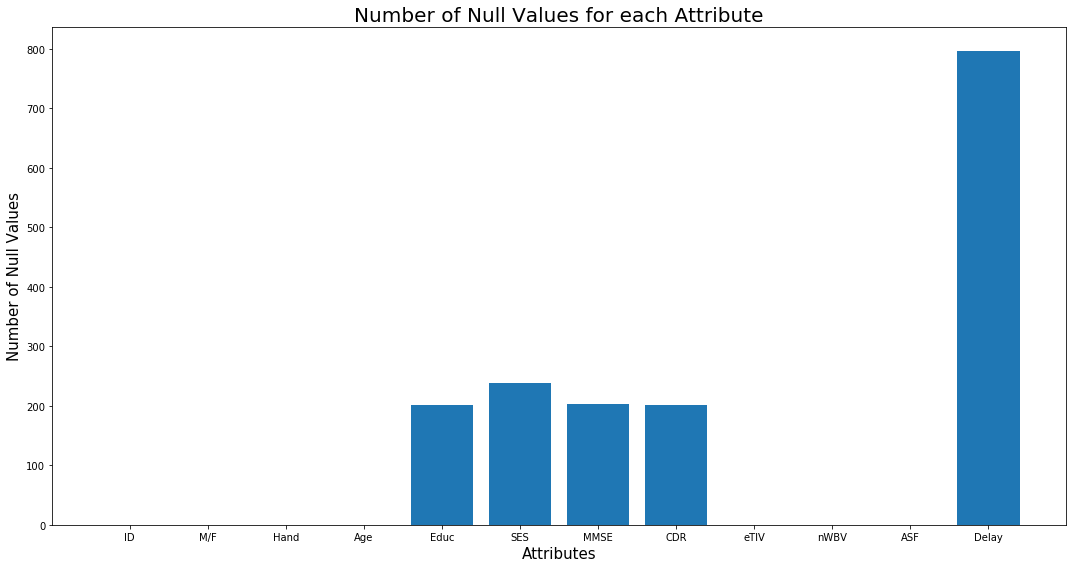

In [9]:
plt.figure(figsize = (15, 8))
plt.bar(x = df.columns , height = df.isnull().sum())
plt.xlabel("Attributes", fontsize = 15)
plt.ylabel("Number of Null Values", fontsize = 15)
plt.title("Number of Null Values for each Attribute", fontsize = 20)
plt.tight_layout()
plt.show()

There are very high number of null values in the Delay column. So, it is better to drop this column has this column might be useless for our analysis as more then ninety percent of values are null.

#### Dropping the delay column

In [10]:
del df['Delay']

In [11]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Oasis_1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,Oasis_2,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,Oasis_3,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,Oasis_4,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,Oasis_5,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


#### Summary Statistics of the data

In [12]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,809.000000,608.000000,570.00000,606.000000,608.000000,809.000000,809.000000,809.000000
mean,63.186650,2.620066,2.47193,27.234323,0.288651,1484.782447,0.763037,1.197311
std,23.117511,1.329698,1.12805,3.687980,0.377697,166.911689,0.059401,0.133031
min,18.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,49.000000,1.000000,2.00000,26.000000,0.000000,1361.000000,0.715000,1.108000
50%,72.000000,3.000000,2.00000,29.000000,0.000000,1475.000000,0.754000,1.190000
75%,80.000000,4.000000,3.00000,30.000000,0.500000,1583.000000,0.817000,1.290000
max,98.000000,5.000000,5.00000,30.000000,2.000000,2004.000000,0.893000,1.587000


Basic Inferences : 

    1. Age is ranging from minimum of 18 years to maximum of 98 years.
    2. Though Education and SES appear to be numeric in nature, they are actually categorical data.
    3. We need to explore CDR and other numerical features individually.
    4. The mean age of the subjects is 63 years.
    5. The mean Education qualification of the subjects is 2 meaning that most of our subjects have completed their high school education.
    6. The mean SES of the subjects is 2 which means that most of our subjects belong to the lower middle class strata of the society.
    7. There may be effect of potential outliers in these columns which could affect the mean values which will be taken care later.

## EDA - Exploratory Data Analysis

**Let us verify whether every body are right handed as mentioned in the data dictionary. If it is true, then the column is not useful, we can drop the column.**

In [13]:
df['Hand'].value_counts()

R    809
Name: Hand, dtype: int64

We can see that hand column contains only "R" which implies all people are right-handed. Therey by we can drop the column.

In [14]:
del df['Hand']

In [15]:
df.head()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Oasis_1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,Oasis_2,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,Oasis_3,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,Oasis_4,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,Oasis_5,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


## Univariate Analysis 

### 1. *Age*

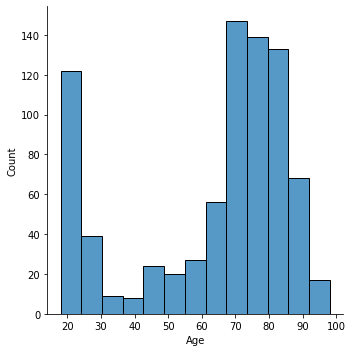

In [16]:
sns.displot(data = df, x = 'Age', kind = 'hist')
plt.show()

From, the data we can see there are quite few people in the lower age group.

**We need to check whether there is significant data present in the lower age group.**

**This is done to confirm whether the Dementia is present in lower group people and maybe very rarely absent in higher group people.**

We can do this by dropping all the rows where null is present and compare the age group with the above analysis.

In [17]:
df_new = df.dropna(thresh = 1, subset = ['Educ', "SES", 'MMSE', 'CDR'])

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 808
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      608 non-null    object 
 1   M/F     608 non-null    object 
 2   Age     608 non-null    int64  
 3   Educ    608 non-null    float64
 4   SES     570 non-null    float64
 5   MMSE    606 non-null    float64
 6   CDR     608 non-null    float64
 7   eTIV    608 non-null    int64  
 8   nWBV    608 non-null    float64
 9   ASF     608 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 52.2+ KB


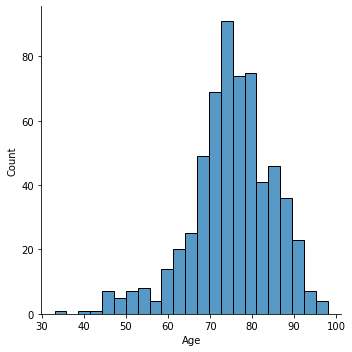

In [19]:
sns.displot(data = df_new, x = 'Age', kind = 'hist')
plt.show()

In [20]:
### Imputation is required for SES and MMSE.

**There are more number of people in the elderly group than the younger age group**. By this we can tell that dementia is serious old age problem rather than young age problem.

In [21]:
print("The mean average age is :", round(df_new["Age"].mean(), 2))

The mean average age is : 75.21


This is the mean average of mixed data of whether the person is demented or not.

**From, here on it would be df_new which would be predominently considered for our data analysis.**

### 2. *Educ*

Educ is more categorical in nature than numerical as it indicates educational status.

We can use the countplot to see how people are wrt their education.

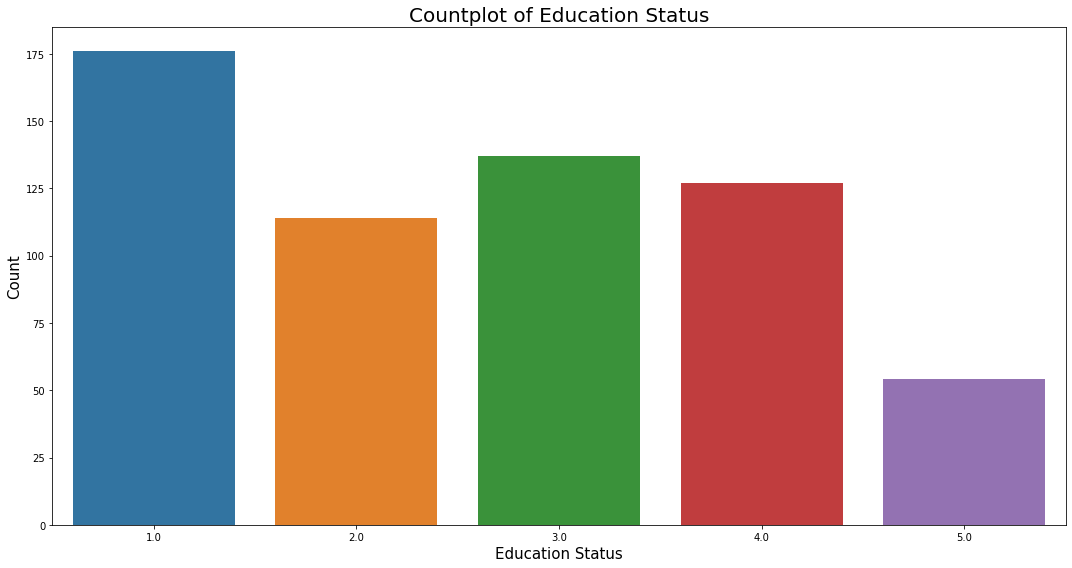

In [22]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Educ')
plt.title('Countplot of Education Status', fontsize = 20)
plt.xlabel('Education Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
plt.show()

In [23]:
print("The count for education status can be seen as follows : ", "\n")
print(df_new['Educ'].value_counts())

The count for education status can be seen as follows :  

1.0    176
3.0    137
4.0    127
2.0    114
5.0     54
Name: Educ, dtype: int64


####################################################################################################################### <br>

Note : We need to explore this area more as to understand whether it plays a significant role in people being confirmed as demented or not. <br>

####################################################################################################################### <br>

### 3. *SES*

It is nothing but socio-economic status data.

As the meaning suggest, it must also be the categorical data.

In [24]:
## Values may change after imputation

print("The data counts are as follows : ", "\n")
print(df_new.SES.value_counts())

The data counts are as follows :  

2.0    168
1.0    138
3.0    131
4.0    123
5.0     10
Name: SES, dtype: int64


There are very few people in the last category and the data is evenly spread accross various categories.

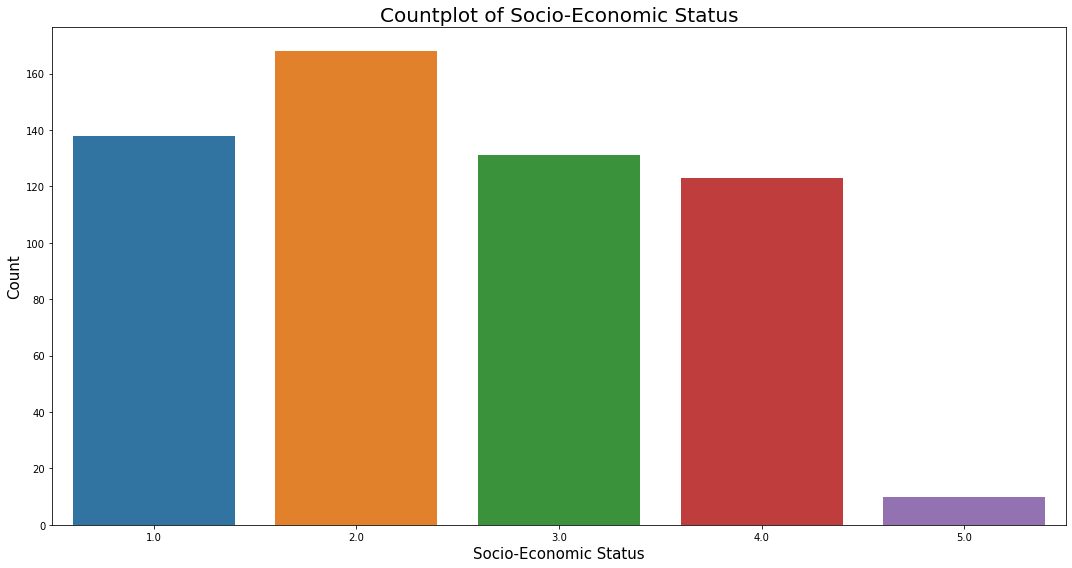

In [25]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'SES')
plt.title('Countplot of Socio-Economic Status', fontsize = 20)
plt.xlabel('Socio-Economic Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
plt.show()

In [26]:
# Mode for SES :
print('The mode for SES :') 
print(df_new.SES.mode())

The mode for SES :
0    2.0
dtype: float64


In [27]:
# We can impute the missing value by 2.0 as seen from the above table ........
df_new['SES'].fillna(value = 2.0, inplace = True)

### 4. *MMSE*

This is actually an examination score, which plays significant part in our analysis. <br>
It plays significant part because the person gets majorly identified as demented or not based on the scores obtained in this exams.

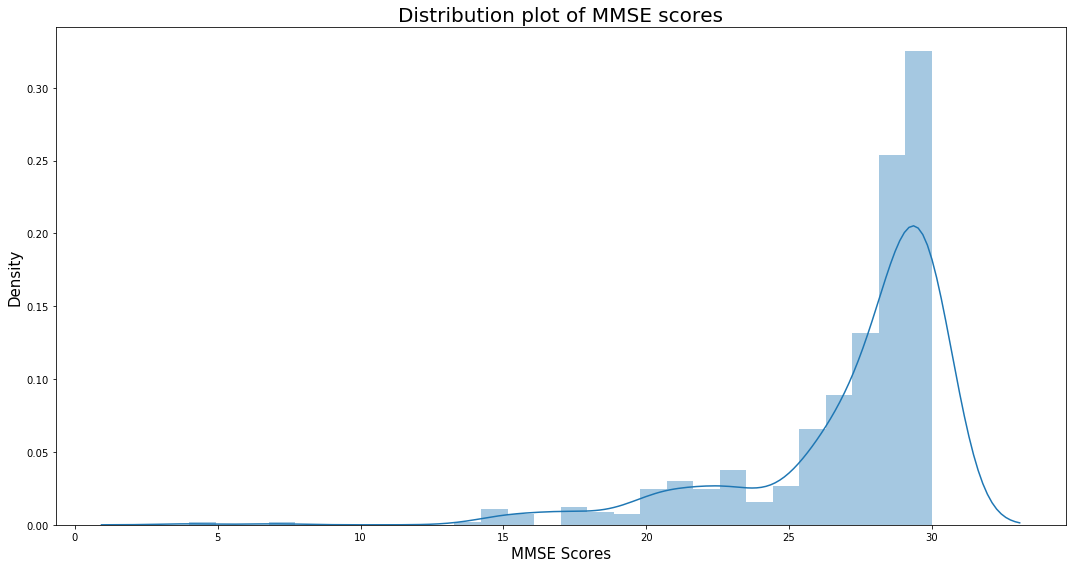

In [28]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new['MMSE'])
plt.title('Distribution plot of MMSE scores', fontsize = 20)
plt.xlabel('MMSE Scores', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.tight_layout()
plt.show()

We can see that the data is left skewed in nature. That most of the scores are concentrated around 28-30 mark.

In [29]:
print("The mean MMSE score is :", round(df_new['MMSE'].mean(), 2))

The mean MMSE score is : 27.23


############################################################################################################################### <br>

Note : From the data, it can be observed that the most of the people might be classified as non-demented as MMSE scores are very good for most of them in the modified data. <br>

############################################################################################################################### <br>

In [30]:
df_new[df_new['MMSE'].isnull()]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
793,Oasis_794,F,75,1.0,2.0,NaN,1.0,1169,0.742,1.501
794,Oasis_795,F,77,1.0,2.0,NaN,1.0,1159,0.733,1.515


In [31]:
# We can see that MMSE has two null values, we can impute with the median based on Grouping of CDR
df_new.groupby('CDR')['MMSE'].median()

CDR
0.0    29.0
0.5    27.0
1.0    21.0
2.0    15.0
Name: MMSE, dtype: float64

In [32]:
# We can impute the missing value by 21 as seen from the above table ........
df_new['MMSE'].fillna(value = 21, inplace = True)

### 5. *eTIV*

This column refers to the estimated volume of the cranial cavity in the brain. 
It is the total volume within the cranium (skull) comprising the brain, meninges and CSF (cerebrospinal fluid)

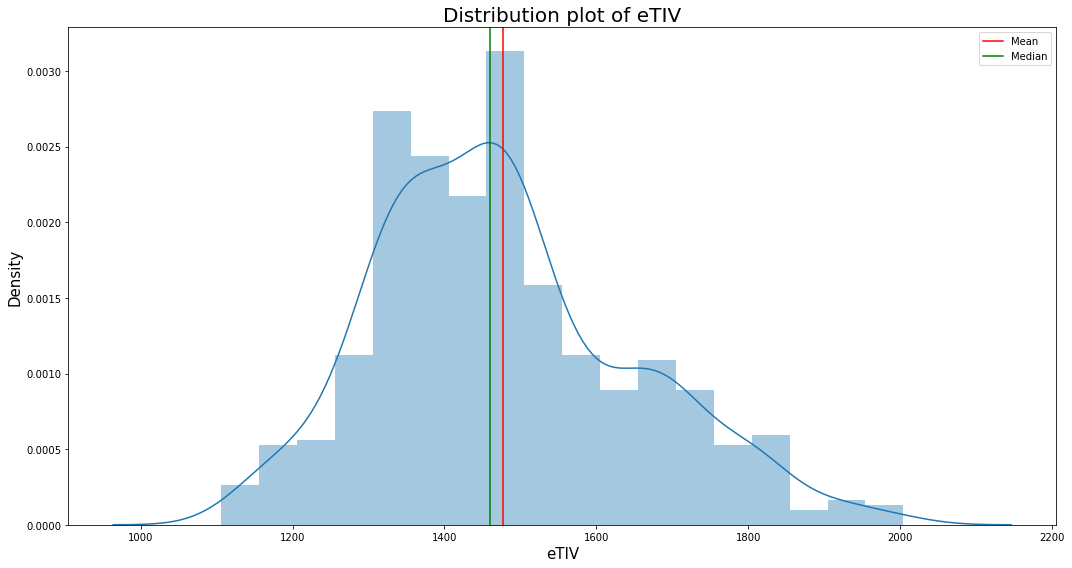

In [33]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new['eTIV'])
plt.title('Distribution plot of eTIV', fontsize = 20)
plt.xlabel('eTIV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new['eTIV'].mean(), color = 'r', label = 'Mean')
plt.axvline(x = df_new['eTIV'].median(), color = 'g', label = 'Median')
plt.tight_layout()
plt.legend()
plt.show()

In [34]:
print("The median eTIV is :", df_new['eTIV'].median())
print("The mean eTIV is :", round(df_new['eTIV'].mean(), 2))

The median eTIV is : 1460.0
The mean eTIV is : 1477.06


### 6. *nWBV*

It is the normalized whole brain volume.
It considers the collective volume of the entire brain in structural imaging without considering the regionally specific differences in volume of any individual structure inside the brain.

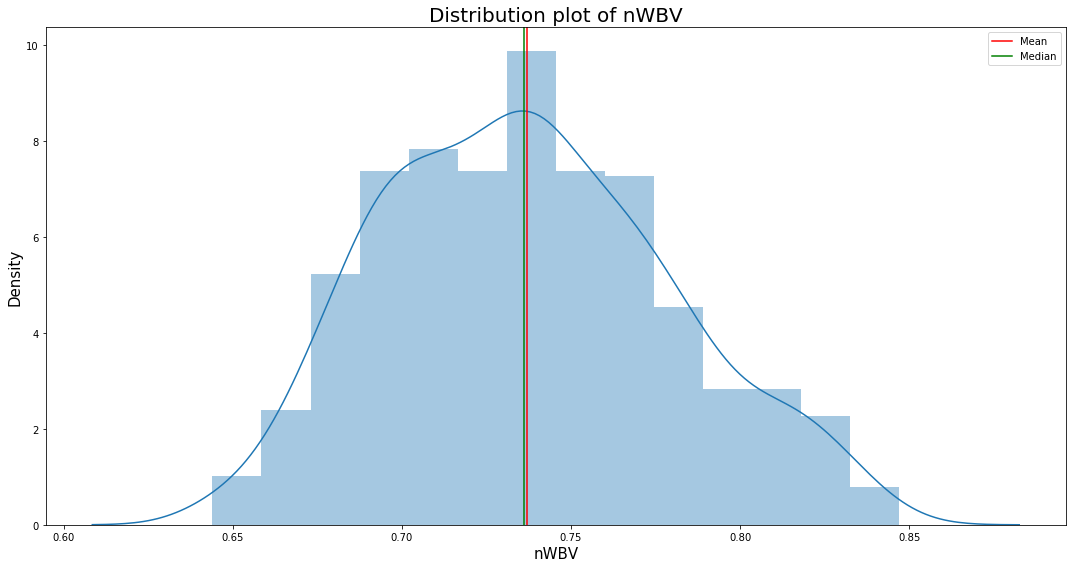

In [35]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new['nWBV'])
plt.title('Distribution plot of nWBV', fontsize = 20)
plt.xlabel('nWBV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new['nWBV'].mean(), color = 'r', label = 'Mean')
plt.axvline(x = df_new['nWBV'].median(), color = 'g', label = 'Median')
plt.tight_layout()
plt.legend()
plt.show()

In [36]:
print("The median nWBV is :", round(df_new['nWBV'].median(), 3))
print("The   mean nWBV is :", round(df_new['nWBV'].mean(), 3))

The median nWBV is : 0.736
The   mean nWBV is : 0.737


Both the median and mean are same for this variable.

### 7. *ASF*

ASF is the atlas scaling factor.

It is a one-parameter scaling factor that allows for comparison of the eTIV feature based on differences in the human anatomy. Normal and abnormal brains can be segmented by registering the target image with an atlas. Here, an atlas is defined as the combination of an intensity image (template) and its segmented image (the atlas labels).

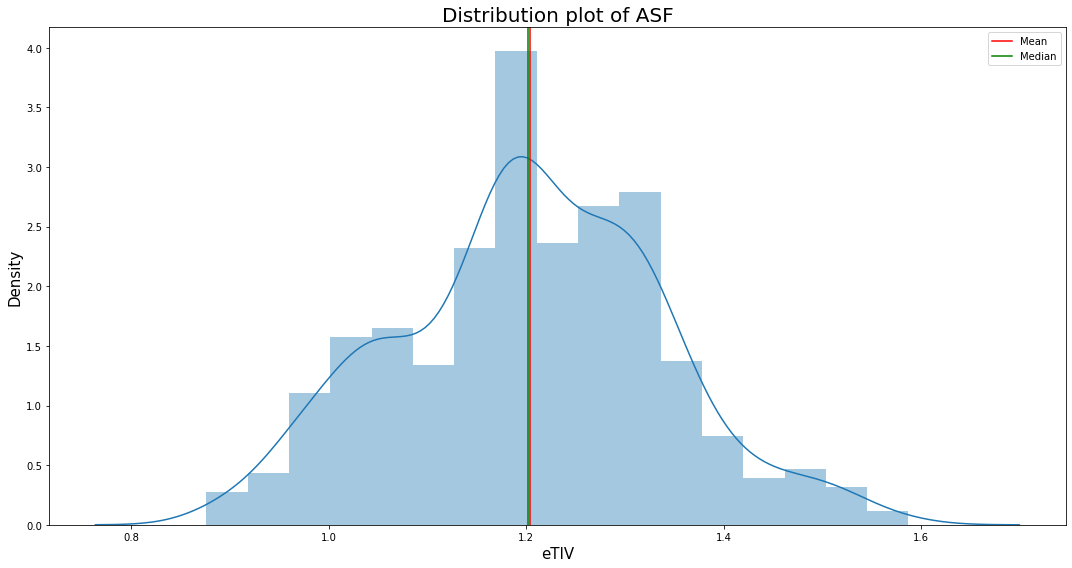

In [37]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new['ASF'])
plt.title('Distribution plot of ASF', fontsize = 20)
plt.xlabel('eTIV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new['ASF'].mean(), color = 'r', label = 'Mean')
plt.axvline(x = df_new['ASF'].median(), color = 'g', label = 'Median')
plt.tight_layout()
plt.legend()
plt.show()

In [38]:
print("The median ASF is :", round(df_new['ASF'].median(), 3))
print("The   mean ASF is :", round(df_new['ASF'].mean(), 3))

The median ASF is : 1.202
The   mean ASF is : 1.204


#####################################################################################################################

### All the above numerical categories must be studied in bi-variate and multi-variate analysis for their behaviours.

#####################################################################################################################

### 8. *CDR*

**Clinical Dementia Rating** : It tells whether a person is suffereing from dementia or not if demented how severe is it.

It will be categorical data, though the ratings are numerical in nature.

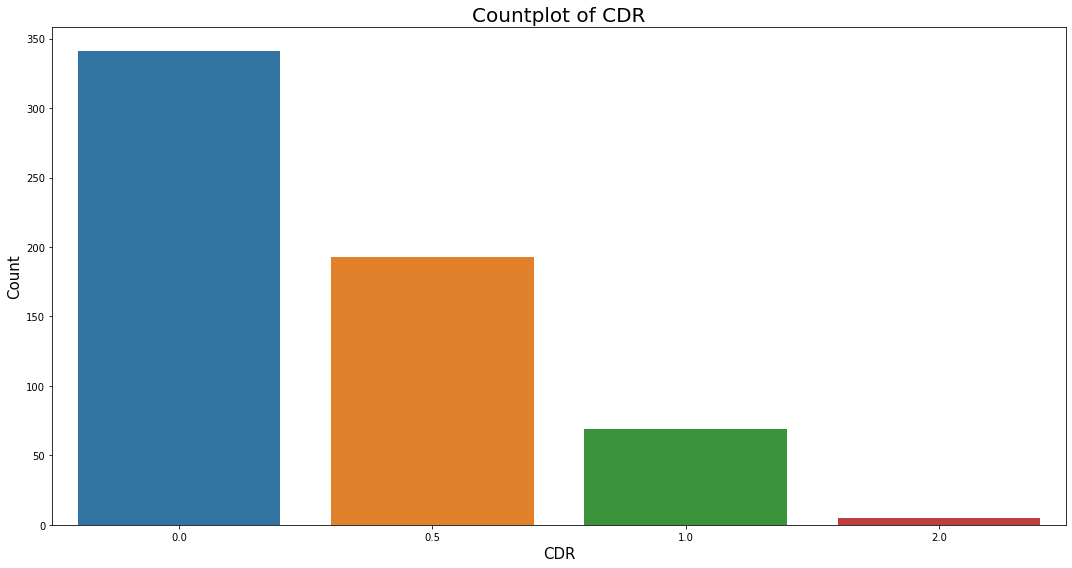

In [39]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'CDR')
plt.title('Countplot of CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
plt.show()

In [40]:
df_new.reset_index(inplace = True, drop = True)

In [41]:
print("The counts are as follows : ")
print(df_new['CDR'].value_counts())

The counts are as follows : 
0.0    341
0.5    193
1.0     69
2.0      5
Name: CDR, dtype: int64


There are only five people who are more serious then usual and the classes are highly imbalanced.

In [42]:
df_new["Group"] = df_new['CDR'].replace({0 : "Non-Demented", 0.5 : "Demented", 1.0 : "Demented", 2.0 : "Demented"})

In [43]:
df_new.head()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,Oasis_1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Non-Demented
1,Oasis_2,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Non-Demented
2,Oasis_3,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
3,Oasis_9,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Non-Demented
4,Oasis_10,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Non-Demented


In [44]:
print("The counts are as follows : ")
print(df_new['Group'].value_counts())

The counts are as follows : 
Non-Demented    341
Demented        267
Name: Group, dtype: int64


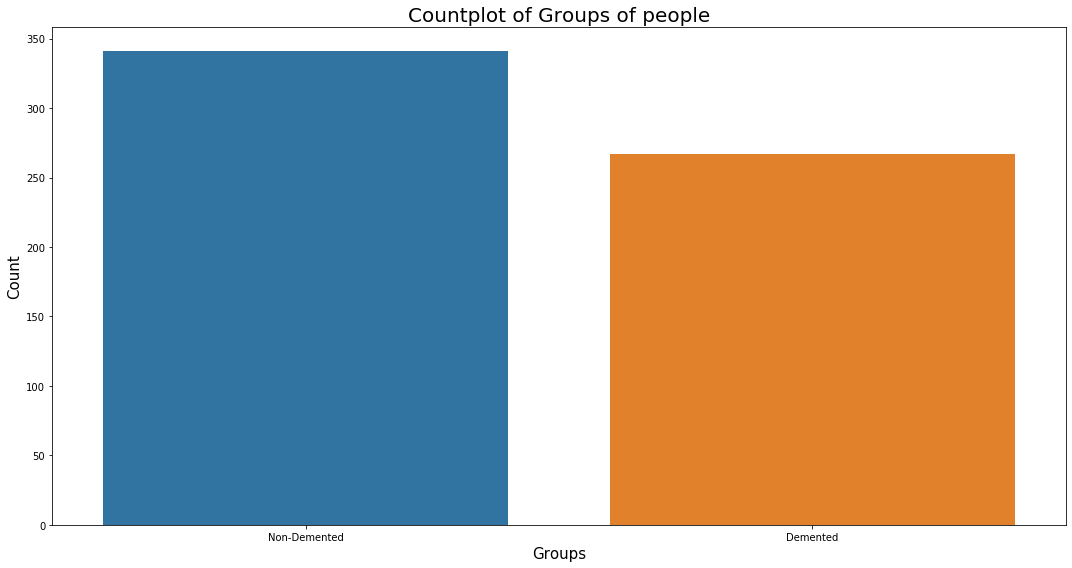

In [45]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Group')
plt.title('Countplot of Groups of people', fontsize = 20)
plt.xlabel('Groups', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
plt.show()

Out of **608** important data points, we can see that **341** of them are classified as non-demented that they are healthy.
Also, now both classes seem quite **balanced**.

## *End of Univariate Analysis*

## Bi-Variate Analysis

########################################################################################################################### <br>

**Numerical - Categorical Data**

########################################################################################################################### <br>

#### Numerical Data :  Age

1. **Numerical Data   :** Age <br>
   **Categorical Data :** M/F

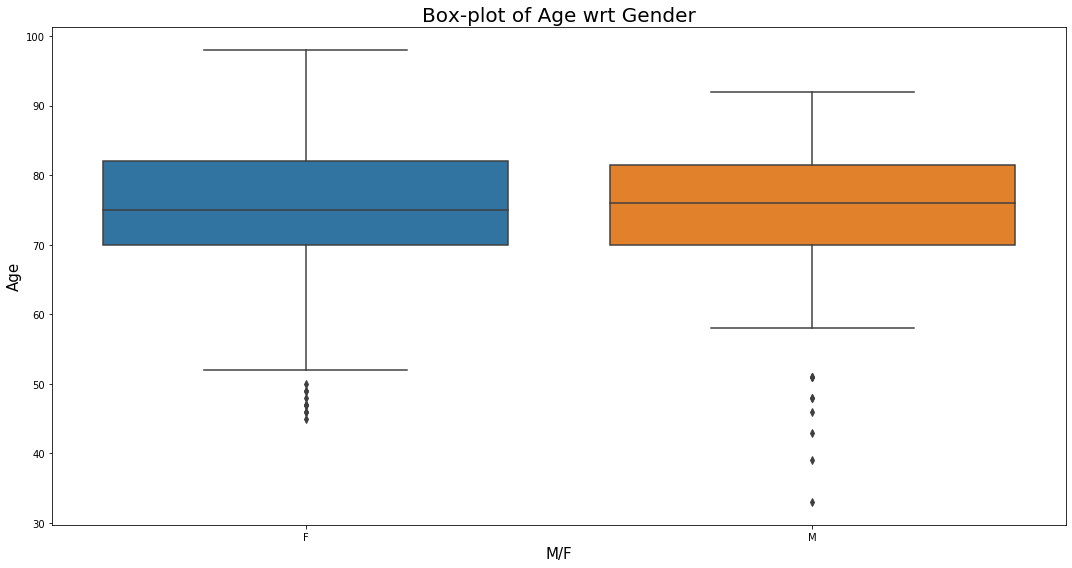

In [46]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'M/F', y = 'Age')
plt.title('Box-plot of Age wrt Gender', fontsize = 20)
plt.xlabel('M/F', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

We can see that the average age of both the men and women column is almost same and there are few outliers in both the cases.

In [47]:
print("The average age of male :", round(df_new[df_new["M/F"] == "M"]["Age"].mean(), 3))

The average age of male : 75.113


In [48]:
print("The average age of female :", round(df_new[df_new["M/F"] == "F"]["Age"].mean(), 3))

The average age of female : 75.271


In [49]:
print("The median age of male :", round(df_new[df_new["M/F"] == "M"]["Age"].median(), 3))

The median age of male : 76.0


In [50]:
print("The median age of female :", round(df_new[df_new["M/F"] == "F"]["Age"].median(), 3))

The median age of female : 75.0


2. **Numerical Data :** Age <br>
   **Categorical Data :** Educ

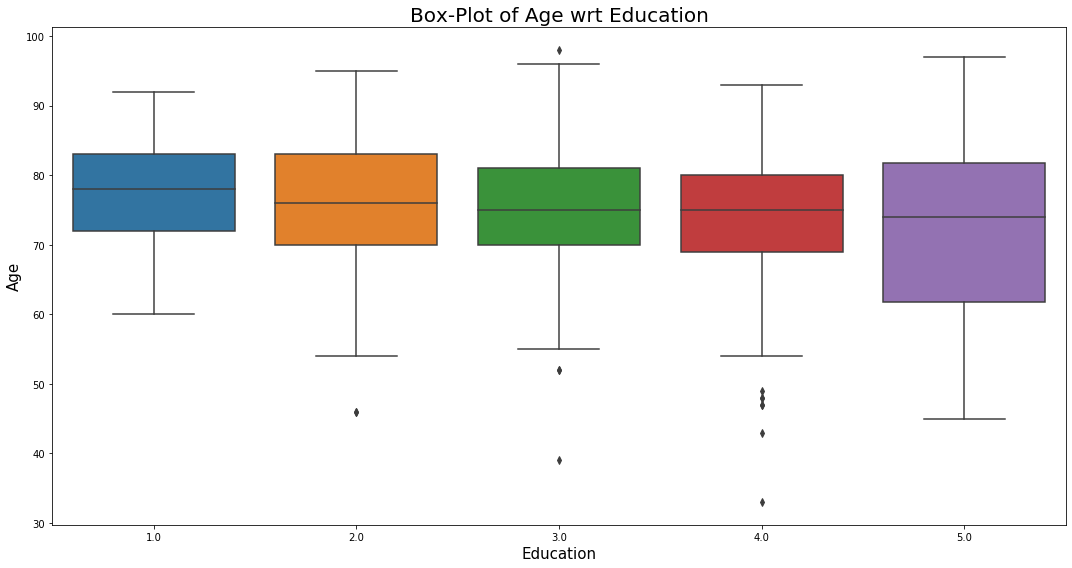

In [51]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'Educ', y = 'Age')
plt.title('Box-Plot of Age wrt Education', fontsize = 20)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

From the graph is that the medians for all the categories is roughly same.

3. **Numerical Data :** Age <br>
   **Categorical Data :** SES

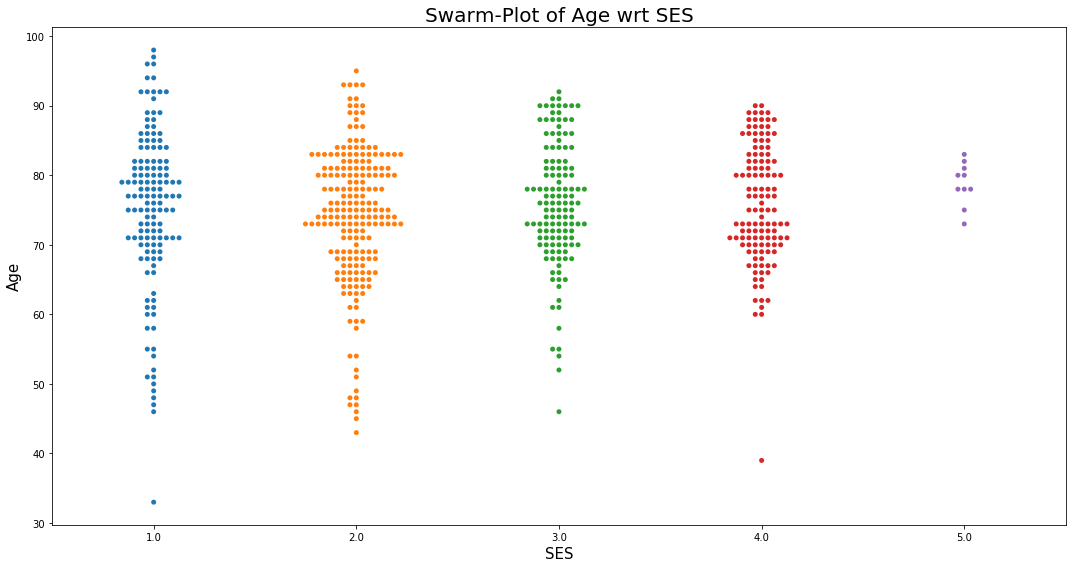

In [52]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'SES', y = 'Age')
plt.title('Swarm-Plot of Age wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

There are more number of people in the first and second category of the SES.

The data from the 5th category is very less.

4. **Numerical Data :** Age <br>
   **Categorical Data :** CDR

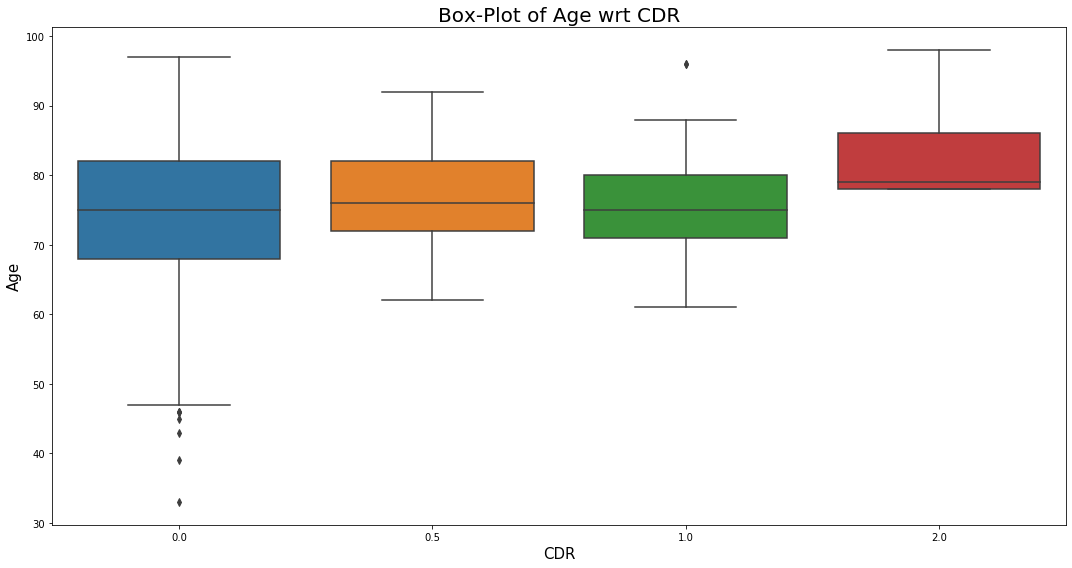

In [53]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'CDR', y = 'Age')
plt.title('Box-Plot of Age wrt CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

We can see that most of the people are healthy that is with **no dementia**. <br>
That it might be the process that age group with high CDR is high and the number of people effected is also very less.

###########################################################################################################################

#### Numerical Data : eTIV

1. **Numerical Data :** eTIV <br>
   **Categorical Data :** M/F

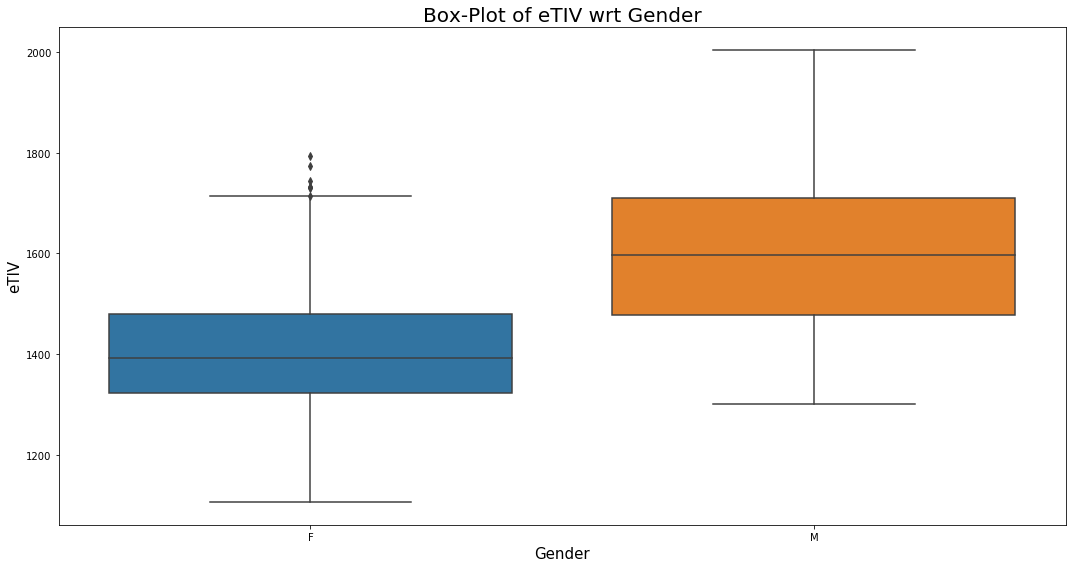

In [54]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'M/F', y = 'eTIV')
plt.title('Box-Plot of eTIV wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.tight_layout()
plt.show()

This plot shows significant amount of information that is medians of both male and females are different.

We can infer that for males the eTIV is much higher as compared to females.

In [55]:
print("The median eTIV for females : ", round(df_new[df_new["M/F"] == 'F']['eTIV'].median()))

The median eTIV for females :  1392


In [56]:
print("The median eTIV for males : ", round(df_new[df_new["M/F"] == 'M']['eTIV'].median()))

The median eTIV for males :  1597


The values also suggests the same.

We can see the hist-plot with respect to the same.

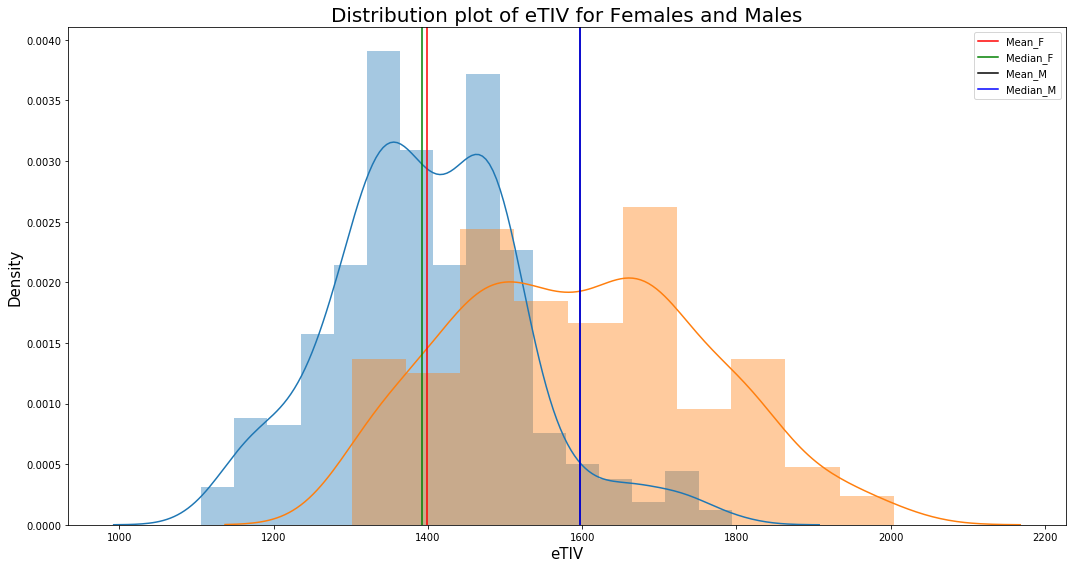

In [57]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new[df_new["M/F"] == 'F']['eTIV'])
sns.distplot(df_new[df_new["M/F"] == 'M']['eTIV'])
plt.title('Distribution plot of eTIV for Females and Males', fontsize = 20)
plt.xlabel('eTIV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new[df_new["M/F"] == 'F']['eTIV'].mean(), color = 'r', label = 'Mean_F')
plt.axvline(x = df_new[df_new["M/F"] == 'F']['eTIV'].median(), color = 'g', label = 'Median_F')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['eTIV'].mean(), color = 'k', label = 'Mean_M')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['eTIV'].median(), color = 'b', label = 'Median_M')
plt.tight_layout()
plt.legend()
plt.show()

The distribution-plot shows more information with the numerical statitistics more accurately.

Men averages are roughly around the `1600 units` compared to that of `1400 units` for females.

2. **Numerical Data :** eTIV <br>
   **Categorical Data :** CDR

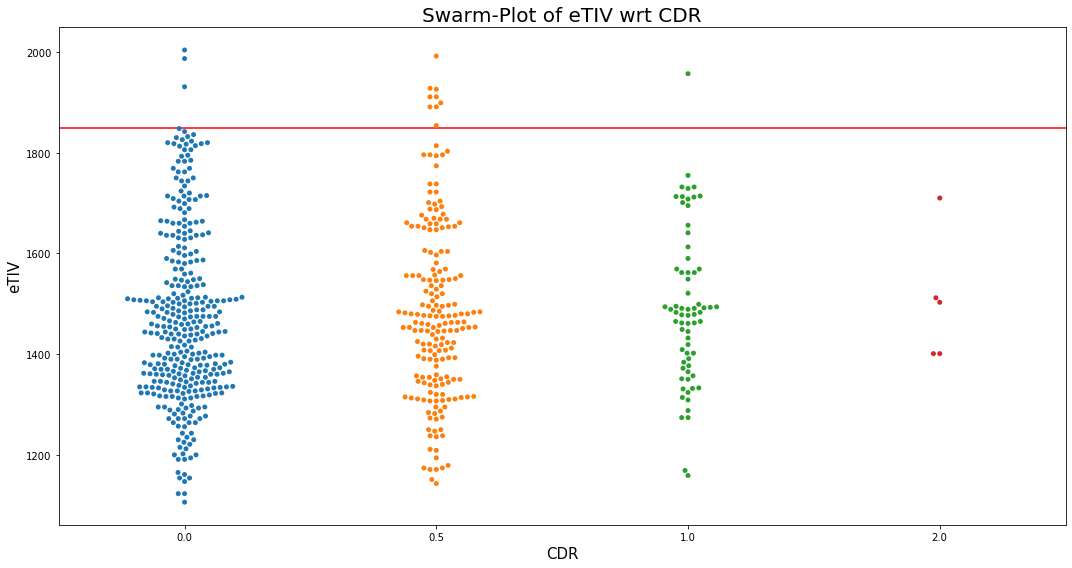

In [58]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'CDR', y = 'eTIV')
plt.title('Swarm-Plot of eTIV wrt CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.axhline(y = 1850, color = 'r')
plt.tight_layout()
plt.show()

The data is clearly indicating that eTIV greater than `1850` mark clearly indicates that the person may suffer from **Mild Dementia**.

And there are only two people who are suffering from Greater Dementia. One is male and other is female based on our previous analysis of univariate analysis.

In [59]:
print("The median eTIV for CDR category 0.0 : ", round(df_new[df_new["CDR"] == 0.0]['eTIV'].median()))
print("The median eTIV for CDR category 0.5 : ", round(df_new[df_new["CDR"] == 0.5]['eTIV'].median()))
print("The median eTIV for CDR category 1.0 : ", round(df_new[df_new["CDR"] == 1.0]['eTIV'].median()))
print("The median eTIV for CDR category 2.0 : ", round(df_new[df_new["CDR"] == 2.0]['eTIV'].median()))

The median eTIV for CDR category 0.0 :  1445
The median eTIV for CDR category 0.5 :  1463
The median eTIV for CDR category 1.0 :  1483
The median eTIV for CDR category 2.0 :  1503


In [60]:
print("The mean eTIV for CDR category 0.0 : ", round(df_new[df_new["CDR"] == 0.0]['eTIV'].mean()))
print("The mean eTIV for CDR category 0.5 : ", round(df_new[df_new["CDR"] == 0.5]['eTIV'].mean()))
print("The mean eTIV for CDR category 1.0 : ", round(df_new[df_new["CDR"] == 1.0]['eTIV'].mean()))
print("The mean eTIV for CDR category 2.0 : ", round(df_new[df_new["CDR"] == 2.0]['eTIV'].mean()))

The mean eTIV for CDR category 0.0 :  1469
The mean eTIV for CDR category 0.5 :  1486
The mean eTIV for CDR category 1.0 :  1491
The mean eTIV for CDR category 2.0 :  1505


We can see that the means and medians of all the different categories are slighly deviated.

3. **Numerical Data :** eTIV <br>
   **Categorical Data :** SES

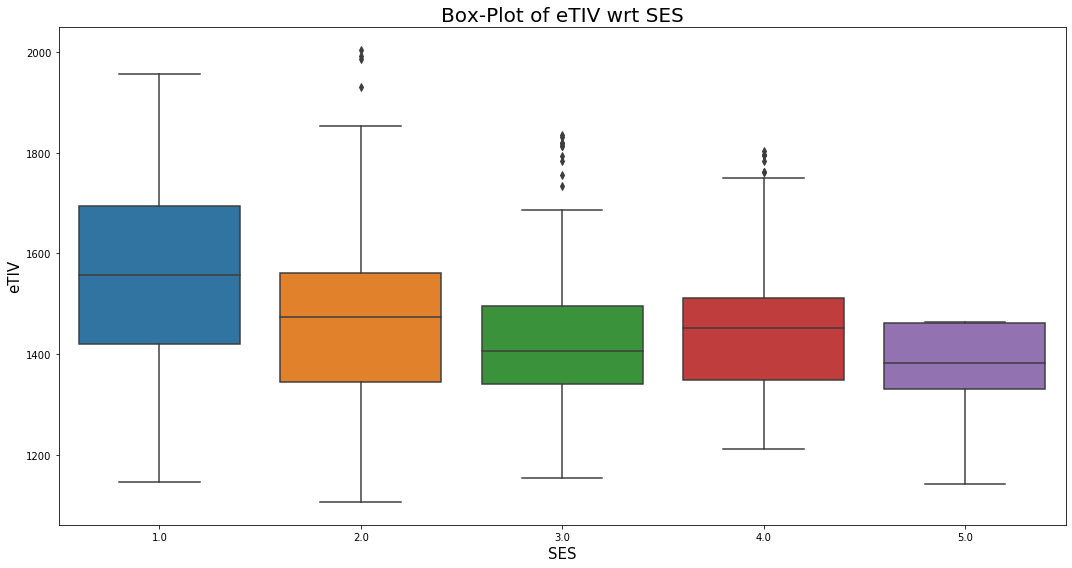

In [61]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'SES', y = 'eTIV')
plt.title('Box-Plot of eTIV wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.tight_layout()
plt.show()

In [62]:
print("The median eTIV for SES category 1 : ", round(df_new[df_new["SES"] == 1]['eTIV'].median()))
print("The median eTIV for SES category 2 : ", round(df_new[df_new["SES"] == 2]['eTIV'].median()))
print("The median eTIV for SES category 3 : ", round(df_new[df_new["SES"] == 3]['eTIV'].median()))
print("The median eTIV for SES category 4 : ", round(df_new[df_new["SES"] == 4]['eTIV'].median()))
print("The median eTIV for SES category 5 : ", round(df_new[df_new["SES"] == 5]['eTIV'].median()))

The median eTIV for SES category 1 :  1558
The median eTIV for SES category 2 :  1473
The median eTIV for SES category 3 :  1407
The median eTIV for SES category 4 :  1451
The median eTIV for SES category 5 :  1382


From, the above graphs and also the values, we can see that the medians are `high` for category **1** of SES and `low` for category **5** of SES. <br>
There are very few outliers in other categories.

In [63]:
print("The mean eTIV for SES category 1 : ", round(df_new[df_new["SES"] == 1]['eTIV'].mean()))
print("The mean eTIV for SES category 2 : ", round(df_new[df_new["SES"] == 2]['eTIV'].mean()))
print("The mean eTIV for SES category 3 : ", round(df_new[df_new["SES"] == 3]['eTIV'].mean()))
print("The mean eTIV for SES category 4 : ", round(df_new[df_new["SES"] == 4]['eTIV'].mean()))
print("The mean eTIV for SES category 5 : ", round(df_new[df_new["SES"] == 5]['eTIV'].mean()))

The mean eTIV for SES category 1 :  1554
The mean eTIV for SES category 2 :  1473
The mean eTIV for SES category 3 :  1429
The mean eTIV for SES category 4 :  1457
The mean eTIV for SES category 5 :  1360


Mean also suggests the same for the first and last categories.

4. **Numerical Data :** eTIV <br>
   **Categorical Data :** Educ

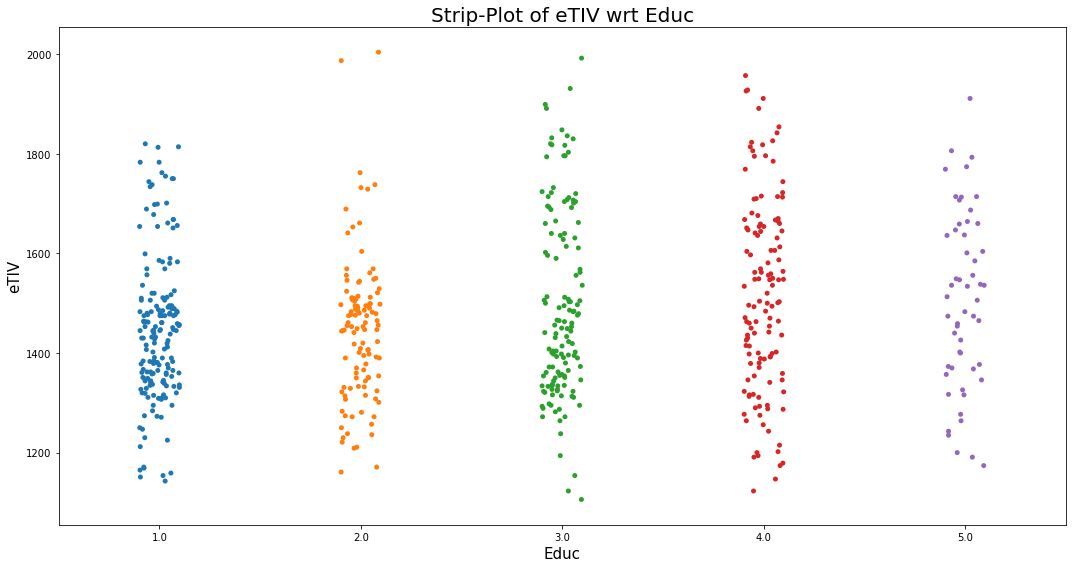

In [64]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'Educ', y = 'eTIV')
plt.title('Strip-Plot of eTIV wrt Educ', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.tight_layout()
plt.show()

We have analysed that if the eTIV greater than `1850` units than that person might suffer from mild dementia. 
Let us verify the same and compare the same with the above graphs.

In [65]:
df_new[df_new["eTIV"] > 1850]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
24,Oasis_39,M,80,4.0,2.0,29.0,0.5,1854,0.709,0.947,Demented
60,Oasis_108,M,72,5.0,1.0,26.0,0.5,1911,0.726,0.919,Demented
101,Oasis_188,M,75,4.0,1.0,30.0,0.5,1891,0.716,0.928,Demented
148,Oasis_263,M,83,3.0,2.0,26.0,0.5,1992,0.706,0.881,Demented
235,Oasis_437,M,87,2.0,2.0,27.0,0.0,1987,0.696,0.883,Non-Demented
236,Oasis_438,M,88,2.0,2.0,30.0,0.0,2004,0.681,0.876,Non-Demented
274,Oasis_476,M,72,4.0,1.0,26.0,0.5,1911,0.719,0.919,Demented
275,Oasis_477,M,76,4.0,1.0,25.0,0.5,1926,0.736,0.911,Demented
374,Oasis_576,M,61,4.0,1.0,30.0,1.0,1957,0.734,0.897,Demented
375,Oasis_577,M,62,4.0,1.0,30.0,0.5,1928,0.731,0.910,Demented


We are observing the samething almost i.e., if the education is high and the if eTIV is high then the person might suffer from Dementia i.e., chances are quite high.

We can also infer from the above graphs and this data that higher eTIV compared with lower SES can also be the cause for a person to suffer from dementia.

###########################################################################################################################

#### Numerical Data : nWBV

1. **Numerical Data :** nWBV <br>
   **Categorical Data :** Educ

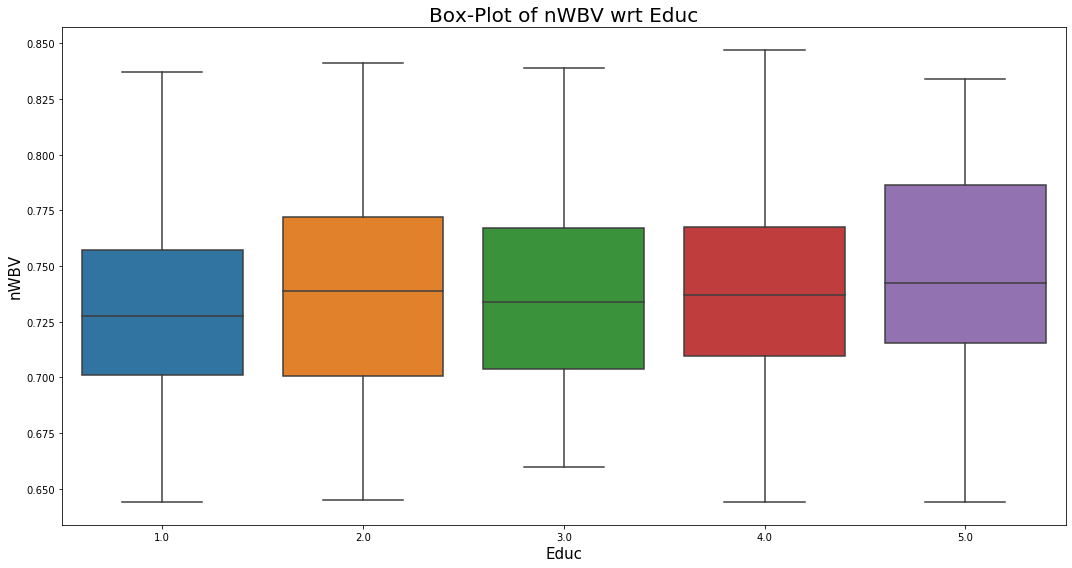

In [66]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'Educ', y = 'nWBV')
plt.title('Box-Plot of nWBV wrt Educ', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('nWBV', fontsize = 15)
plt.tight_layout()
plt.show()

We can see that for different education class, there is an upward trend in the medians.

In [67]:
print("The median nWBV for CDR category 1 : ", round(df_new[df_new["Educ"] == 1]['nWBV'].median(), 3))
print("The median nWBV for CDR category 2 : ", round(df_new[df_new["Educ"] == 2]['nWBV'].median(), 3))
print("The median nWBV for CDR category 3 : ", round(df_new[df_new["Educ"] == 3]['nWBV'].median(), 3))
print("The median nWBV for CDR category 4 : ", round(df_new[df_new["Educ"] == 4]['nWBV'].median(), 3))
print("The median nWBV for CDR category 5 : ", round(df_new[df_new["Educ"] == 5]['nWBV'].median(), 3))

The median nWBV for CDR category 1 :  0.728
The median nWBV for CDR category 2 :  0.739
The median nWBV for CDR category 3 :  0.734
The median nWBV for CDR category 4 :  0.737
The median nWBV for CDR category 5 :  0.742


The range for category 4 is the highest when compared with other.

2. **Numerical Data :** nWBV <br>
   **Categorical Data :** CDR

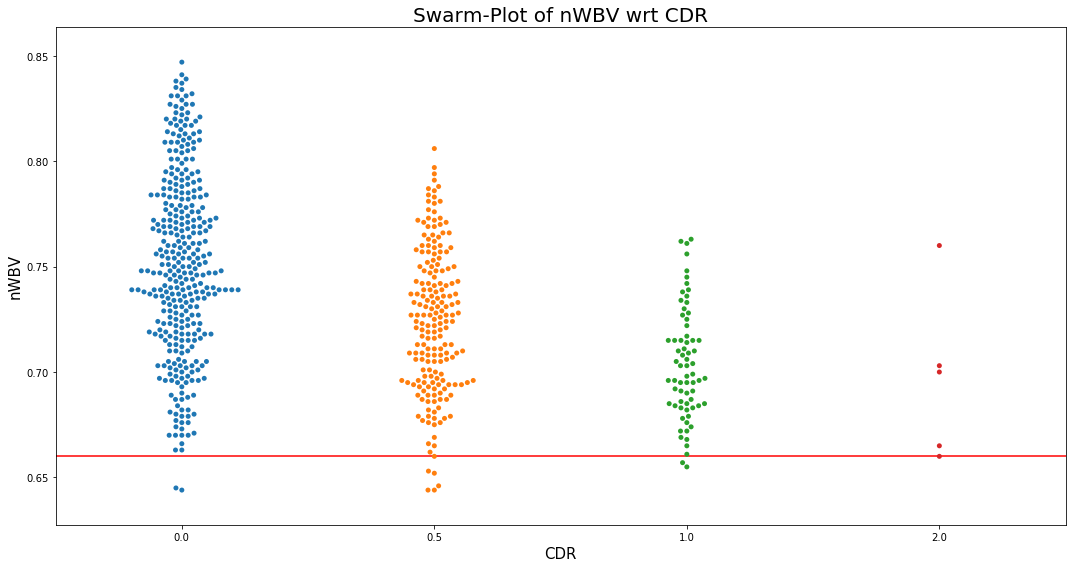

In [68]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'CDR', y = 'nWBV')
plt.title('Swarm-Plot of nWBV wrt CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('nWBV', fontsize = 15)
plt.axhline(y = 0.660, color = 'r')
plt.tight_layout()
plt.show()

We can clearly see that there is more chance of person getting demented if his/her `nWBV` is less than the `0.66 units`.

In [69]:
print("The median nWBV for CDR category 0.0 : ", round(df_new[df_new["CDR"] == 0.0]['nWBV'].median(), 3))
print("The median nWBV for CDR category 0.5 : ", round(df_new[df_new["CDR"] == 0.5]['nWBV'].median(), 3))
print("The median nWBV for CDR category 1.0 : ", round(df_new[df_new["CDR"] == 1.0]['nWBV'].median(), 3))
print("The median nWBV for CDR category 2.0 : ", round(df_new[df_new["CDR"] == 2.0]['nWBV'].median(), 3))

The median nWBV for CDR category 0.0 :  0.75
The median nWBV for CDR category 0.5 :  0.724
The median nWBV for CDR category 1.0 :  0.699
The median nWBV for CDR category 2.0 :  0.7


In [70]:
print("The mean nWBV for CDR category 0.0 : ", round(df_new[df_new["CDR"] == 0.0]['nWBV'].mean(), 3))
print("The mean nWBV for CDR category 0.5 : ", round(df_new[df_new["CDR"] == 0.5]['nWBV'].mean(), 3))
print("The mean nWBV for CDR category 1.0 : ", round(df_new[df_new["CDR"] == 1.0]['nWBV'].mean(), 3))
print("The mean nWBV for CDR category 2.0 : ", round(df_new[df_new["CDR"] == 2.0]['nWBV'].mean(), 3))

The mean nWBV for CDR category 0.0 :  0.752
The mean nWBV for CDR category 0.5 :  0.724
The mean nWBV for CDR category 1.0 :  0.704
The mean nWBV for CDR category 2.0 :  0.698


Mean and Median are comparable.

3. **Numerical Data :** nWBV <br>
   **Categorical Data :** SES

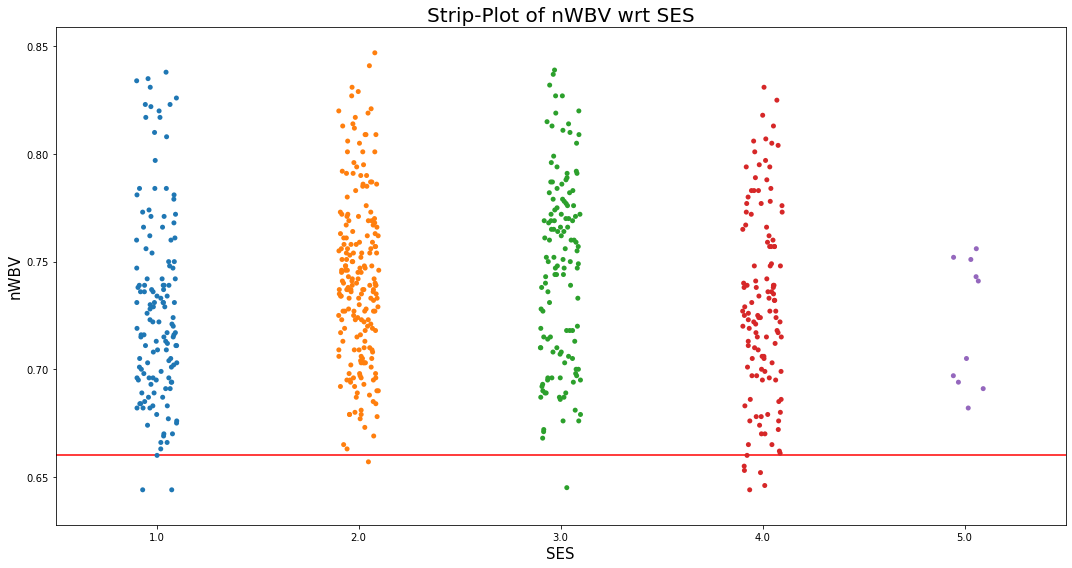

In [71]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'SES', y = 'nWBV')
plt.title('Strip-Plot of nWBV wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('nWBV', fontsize = 15)
plt.axhline(y = 0.66, color = 'r')
plt.tight_layout()
plt.show()

In [72]:
df_new[df_new["nWBV"] < 0.66]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
34,Oasis_61,M,90,2.0,3.0,25.0,0.0,1301,0.645,1.349,Non-Demented
42,Oasis_69,F,69,2.0,4.0,21.0,1.0,1495,0.655,1.174,Demented
87,Oasis_165,F,87,2.0,4.0,21.0,0.5,1250,0.653,1.405,Demented
112,Oasis_206,M,90,1.0,4.0,23.0,0.5,1668,0.644,1.052,Demented
204,Oasis_363,F,92,5.0,1.0,25.0,0.5,1774,0.644,0.989,Demented
263,Oasis_465,M,90,1.0,4.0,23.0,0.5,1668,0.646,1.052,Demented
279,Oasis_481,F,87,1.0,4.0,21.0,0.5,1250,0.652,1.405,Demented
505,Oasis_707,F,82,4.0,1.0,29.0,0.0,1442,0.644,1.217,Non-Demented
552,Oasis_754,F,75,1.0,2.0,18.0,1.0,1479,0.657,1.187,Demented


Here, also we can see that the less the nWBV than the 0.66 units then there would be more chances of getting affected with Dementia.

Less than 0.66 units of nWBV people are in SES category 4 and Education category 1 and 2 most of the times

4. **Numerical Data :** nWBV <br>
   **Categorical Data :** Gender

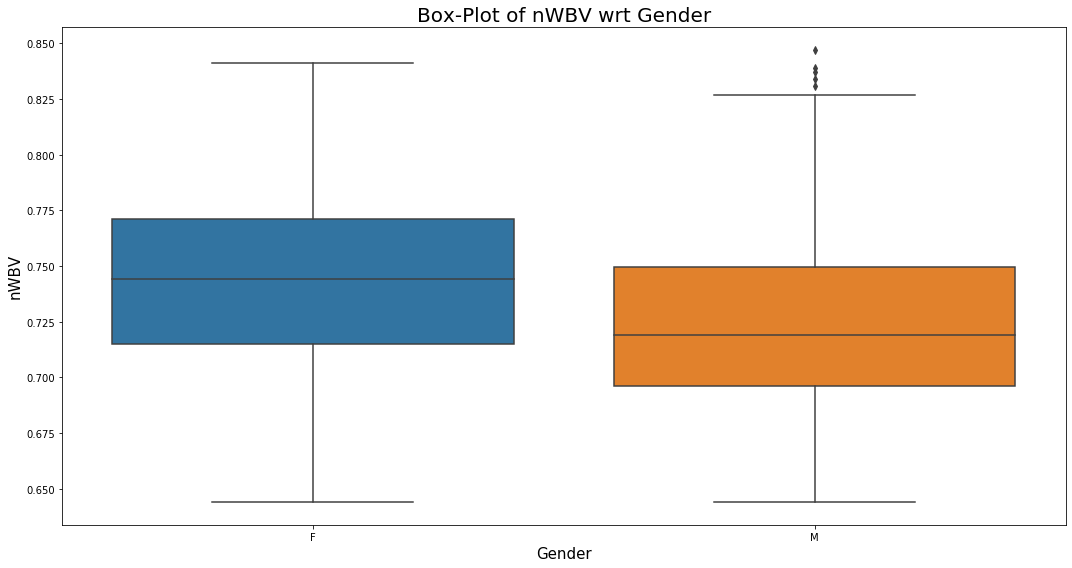

In [73]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'M/F', y = 'nWBV')
plt.title('Box-Plot of nWBV wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('nWBV', fontsize = 15)
plt.tight_layout()
plt.show()

In [74]:
print("The median nWBV for females : ", round(df_new[df_new["M/F"] == 'F']['nWBV'].median(), 3))

The median nWBV for females :  0.744


In [75]:
print("The median nWBV for males : ", round(df_new[df_new["M/F"] == 'M']['nWBV'].median(), 3))

The median nWBV for males :  0.719


There is slight difference between the two of the categories.

In [76]:
print("The mean nWBV for females : ", round(df_new[df_new["M/F"] == 'F']['nWBV'].mean(), 3))

The mean nWBV for females :  0.744


In [77]:
print("The mean nWBV for males : ", round(df_new[df_new["M/F"] == 'M']['nWBV'].mean(), 3))

The mean nWBV for males :  0.726


The values again are comparable with respective categories.

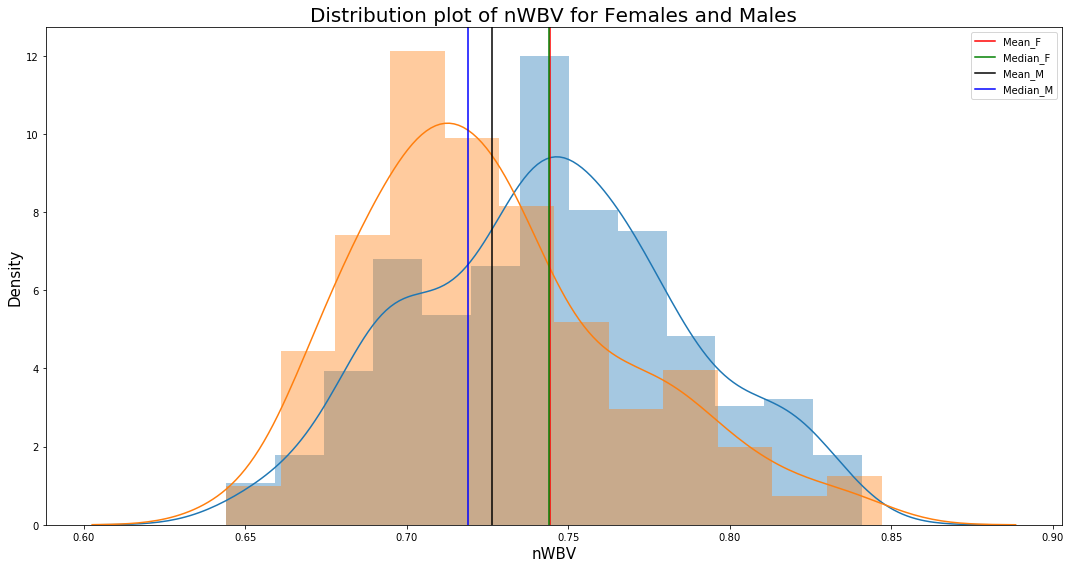

In [78]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new[df_new["M/F"] == 'F']['nWBV'])
sns.distplot(df_new[df_new["M/F"] == 'M']['nWBV'])
plt.title('Distribution plot of nWBV for Females and Males', fontsize = 20)
plt.xlabel('nWBV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new[df_new["M/F"] == 'F']['nWBV'].mean(), color = 'r', label = 'Mean_F')
plt.axvline(x = df_new[df_new["M/F"] == 'F']['nWBV'].median(), color = 'g', label = 'Median_F')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['nWBV'].mean(), color = 'k', label = 'Mean_M')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['nWBV'].median(), color = 'b', label = 'Median_M')
plt.tight_layout()
plt.legend()
plt.show()

Men have lower nWBV compare to female in general.

###########################################################################################################################

#### Numerical Data : ASF

1. **Numerical Data :** ASF <br>
   **Categorical Data :** Gender

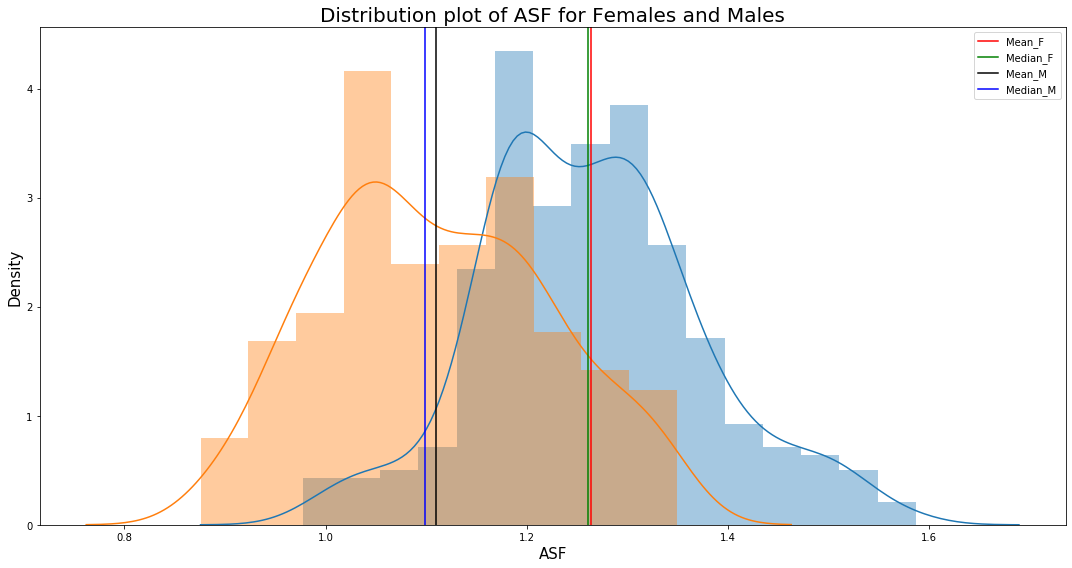

In [79]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new[df_new["M/F"] == 'F']['ASF'])
sns.distplot(df_new[df_new["M/F"] == 'M']['ASF'])
plt.title('Distribution plot of ASF for Females and Males', fontsize = 20)
plt.xlabel('ASF', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new[df_new["M/F"] == 'F']['ASF'].mean(), color = 'r', label = 'Mean_F')
plt.axvline(x = df_new[df_new["M/F"] == 'F']['ASF'].median(), color = 'g', label = 'Median_F')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['ASF'].mean(), color = 'k', label = 'Mean_M')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['ASF'].median(), color = 'b', label = 'Median_M')
plt.tight_layout()
plt.legend()
plt.show()

Here, also we can see the distinct separations between women and men ASF values. And again the values for men are compartively less than women.

In [80]:
print("The median ASF for females : ", round(df_new[df_new["M/F"] == 'F']['ASF'].median(), 3))

The median ASF for females :  1.261


In [81]:
print("The median ASF for males : ", round(df_new[df_new["M/F"] == 'M']['ASF'].median(), 3))

The median ASF for males :  1.099


In [82]:
print("The mean ASF for females : ", round(df_new[df_new["M/F"] == 'F']['ASF'].mean(), 3))

The mean ASF for females :  1.264


In [83]:
print("The mean ASF for males : ", round(df_new[df_new["M/F"] == 'M']['ASF'].mean(), 3))

The mean ASF for males :  1.11


The means and medians are comarable from the data with respective categories.

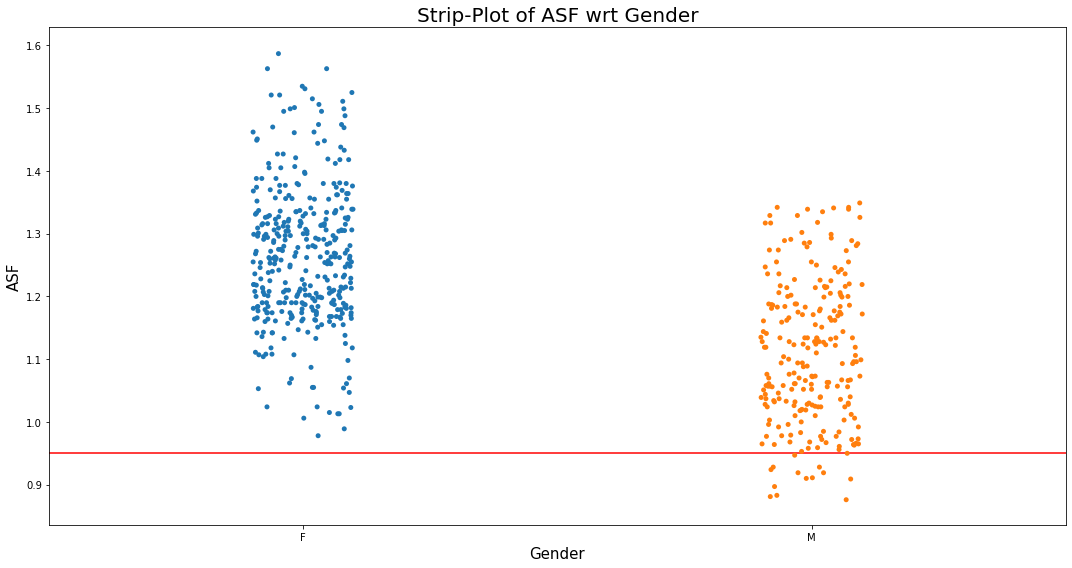

In [84]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'M/F', y = 'ASF')
plt.title('Strip-Plot of ASF wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('ASF', fontsize = 15)
plt.axhline(y = 0.95, color = 'r')
plt.tight_layout()
plt.show()

We can clearly see that for male below `0.95` units of ASF has the capacity of getting affected with dementia.

2. **Numerical Data :** ASF <br>
   **Categorical Data :** CDR

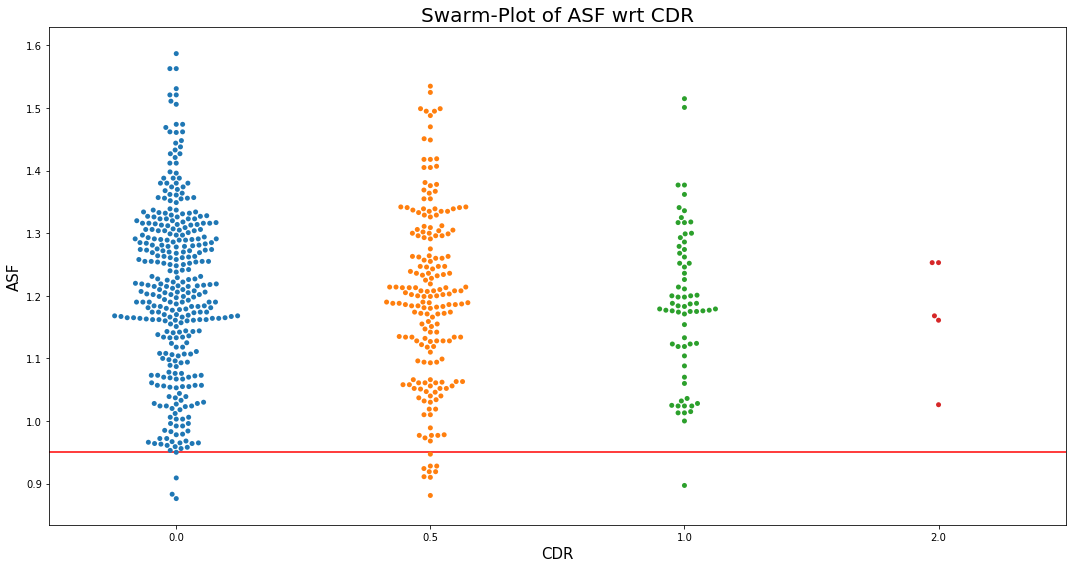

In [85]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'CDR', y = 'ASF')
plt.title('Swarm-Plot of ASF wrt CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('ASF', fontsize = 15)
plt.axhline(y = 0.95, color = 'r')
plt.tight_layout()
plt.show()

From, the graph we can see that if the ASF value is below 0.95, then he/she has more chances of getting affected to Dementia.

In [86]:
df_new[df_new["ASF"] < 0.95]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
24,Oasis_39,M,80,4.0,2.0,29.0,0.5,1854,0.709,0.947,Demented
60,Oasis_108,M,72,5.0,1.0,26.0,0.5,1911,0.726,0.919,Demented
101,Oasis_188,M,75,4.0,1.0,30.0,0.5,1891,0.716,0.928,Demented
148,Oasis_263,M,83,3.0,2.0,26.0,0.5,1992,0.706,0.881,Demented
235,Oasis_437,M,87,2.0,2.0,27.0,0.0,1987,0.696,0.883,Non-Demented
236,Oasis_438,M,88,2.0,2.0,30.0,0.0,2004,0.681,0.876,Non-Demented
274,Oasis_476,M,72,4.0,1.0,26.0,0.5,1911,0.719,0.919,Demented
275,Oasis_477,M,76,4.0,1.0,25.0,0.5,1926,0.736,0.911,Demented
374,Oasis_576,M,61,4.0,1.0,30.0,1.0,1957,0.734,0.897,Demented
375,Oasis_577,M,62,4.0,1.0,30.0,0.5,1928,0.731,0.910,Demented


3. **Numerical Data :** ASF <br>
   **Categorical Data :** SES

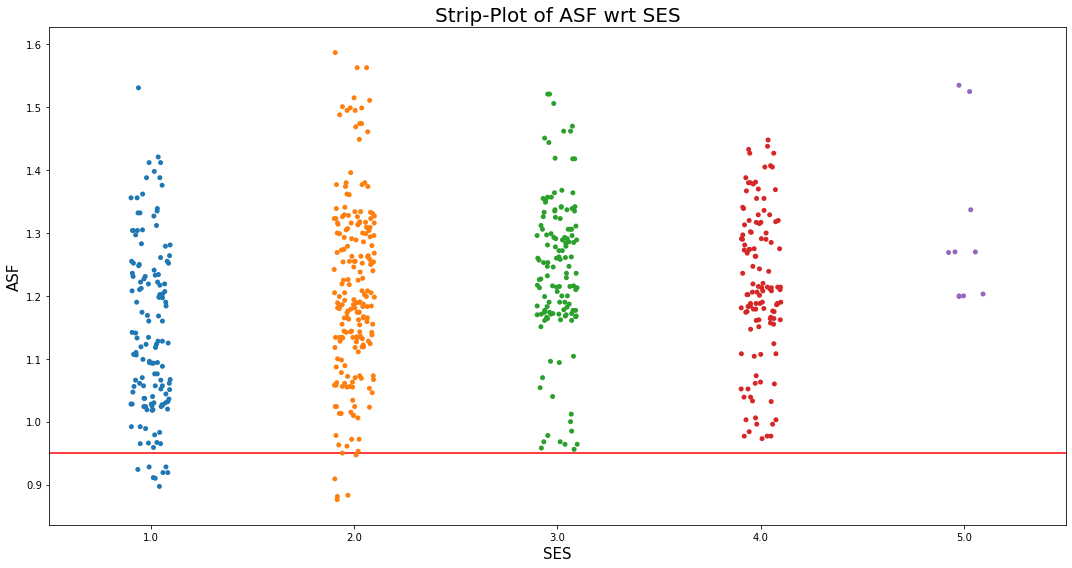

In [87]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'SES', y = 'ASF')
plt.title('Strip-Plot of ASF wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('ASF', fontsize = 15)
plt.axhline(y = 0.95, color = 'r')
plt.tight_layout()
plt.show()

From, the above data, we can see that if the person is male and if his ASF value is less than 0.95, then he would be potential candidate if he is from poor SES background.

In [88]:
print("The median ASF for SES category 1 : ", round(df_new[df_new["SES"] == 1]['ASF'].median(), 3))
print("The median ASF for SES category 2 : ", df_new[df_new["SES"] == 2]['ASF'].median())
print("The median ASF for SES category 3 : ", df_new[df_new["SES"] == 3]['ASF'].median())
print("The median ASF for SES category 4 : ", df_new[df_new["SES"] == 4]['ASF'].median())
print("The median ASF for SES category 5 : ", df_new[df_new["SES"] == 5]['ASF'].median())

The median ASF for SES category 1 :  1.127
The median ASF for SES category 2 :  1.1915
The median ASF for SES category 3 :  1.247
The median ASF for SES category 4 :  1.21
The median ASF for SES category 5 :  1.2694999999999999


In [89]:
print("The mean ASF for SES category 1 : ", round(df_new[df_new["SES"] == 1]['ASF'].mean(), 3))
print("The mean ASF for SES category 2 : ", round(df_new[df_new["SES"] == 2]['ASF'].mean(), 3))
print("The mean ASF for SES category 3 : ", round(df_new[df_new["SES"] == 3]['ASF'].mean(), 3))
print("The mean ASF for SES category 4 : ", round(df_new[df_new["SES"] == 4]['ASF'].mean(), 3))
print("The mean ASF for SES category 5 : ", round(df_new[df_new["SES"] == 5]['ASF'].mean(), 3))

The mean ASF for SES category 1 :  1.144
The mean ASF for SES category 2 :  1.208
The mean ASF for SES category 3 :  1.24
The mean ASF for SES category 4 :  1.217
The mean ASF for SES category 5 :  1.301


4. **Numerical Data :** ASF <br>
   **Categorical Data :** Educ

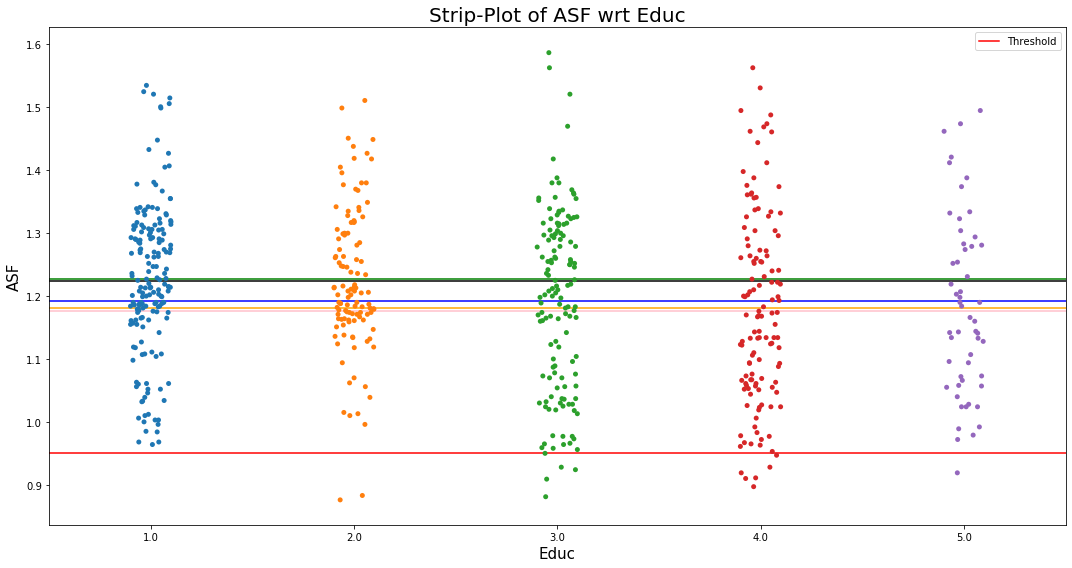

In [90]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'Educ', y = 'ASF')
plt.title('Strip-Plot of ASF wrt Educ', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('ASF', fontsize = 15)
plt.axhline(y = 0.95, color = 'r', label = 'Threshold')
plt.axhline(y = df_new[df_new["Educ"] == 1]['ASF'].mean(), color = 'green')
plt.axhline(y = df_new[df_new["Educ"] == 2]['ASF'].mean(), color = 'black')
plt.axhline(y = df_new[df_new["Educ"] == 3]['ASF'].mean(), color = 'blue')
plt.axhline(y = df_new[df_new["Educ"] == 4]['ASF'].mean(), color = 'pink')
plt.axhline(y = df_new[df_new["Educ"] == 5]['ASF'].mean(), color = 'orange')
plt.tight_layout()
plt.legend()
plt.show()

########################################################################################################################### <br>

From the above data, we can also observe that if the person is male and if education is good and if his SES is poor then he would be a potential candidate for dementia.

########################################################################################################################### <br>

In [91]:
print("The mean ASF for Educ category 1 : ", round(df_new[df_new["Educ"] == 1]['ASF'].mean(), 3))
print("The mean ASF for Educ category 2 : ", round(df_new[df_new["Educ"] == 2]['ASF'].mean(), 3))
print("The mean ASF for Educ category 3 : ", round(df_new[df_new["Educ"] == 3]['ASF'].mean(), 3))
print("The mean ASF for Educ category 4 : ", round(df_new[df_new["Educ"] == 4]['ASF'].mean(), 3))
print("The mean ASF for Educ category 5 : ", round(df_new[df_new["Educ"] == 5]['ASF'].mean(), 3))

The mean ASF for Educ category 1 :  1.227
The mean ASF for Educ category 2 :  1.223
The mean ASF for Educ category 3 :  1.192
The mean ASF for Educ category 4 :  1.176
The mean ASF for Educ category 5 :  1.182


In [92]:
print("The median ASF for Educ category 1 : ", round(df_new[df_new["Educ"] == 1]['ASF'].median(), 3))
print("The median ASF for Educ category 2 : ", round(df_new[df_new["Educ"] == 2]['ASF'].median(), 3))
print("The median ASF for Educ category 3 : ", round(df_new[df_new["Educ"] == 3]['ASF'].median(), 3))
print("The median ASF for Educ category 4 : ", round(df_new[df_new["Educ"] == 4]['ASF'].median(), 3))
print("The median ASF for Educ category 5 : ", round(df_new[df_new["Educ"] == 5]['ASF'].median(), 3))

The median ASF for Educ category 1 :  1.22
The median ASF for Educ category 2 :  1.206
The median ASF for Educ category 3 :  1.208
The median ASF for Educ category 4 :  1.168
The median ASF for Educ category 5 :  1.163


###########################################################################################################################

#### Numerical Data : MMSE

1. **Numerical Data :** MMSE <br>
   **Categorical Data :** Gender

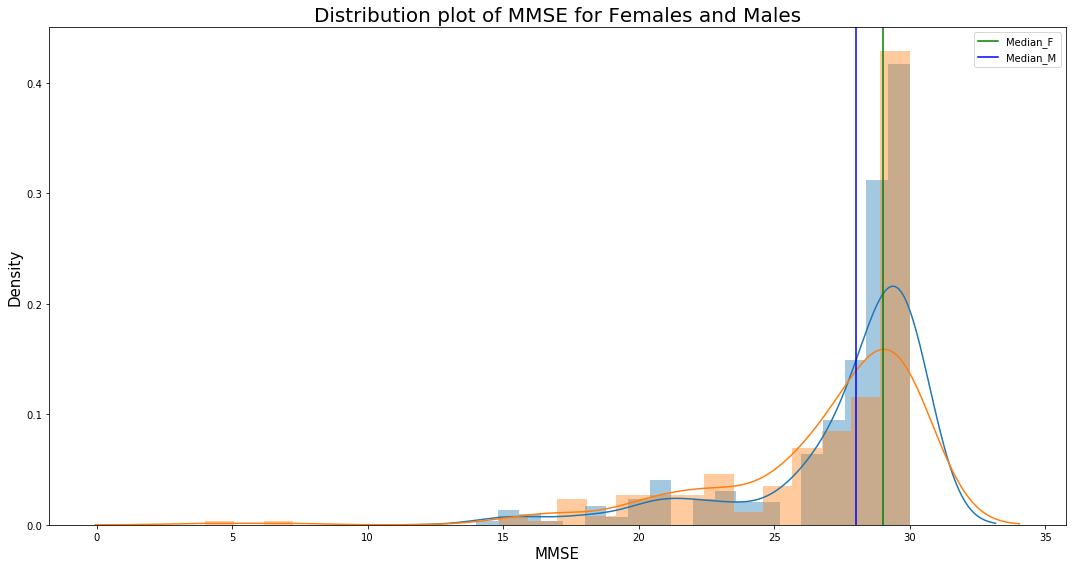

In [93]:
plt.figure(figsize = (15, 8))
sns.distplot(df_new[df_new["M/F"] == 'F']['MMSE'])
sns.distplot(df_new[df_new["M/F"] == 'M']['MMSE'])
plt.title('Distribution plot of MMSE for Females and Males', fontsize = 20)
plt.xlabel('MMSE', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.axvline(x = df_new[df_new["M/F"] == 'F']['MMSE'].median(), color = 'g', label = 'Median_F')
plt.axvline(x = df_new[df_new["M/F"] == 'M']['MMSE'].median(), color = 'b', label = 'Median_M')
plt.tight_layout()
plt.legend()
plt.show()

Here, we can see that the median score of men is significantly low when compared to that of a women category.

Here, we can see that the men are potential people for dementia.

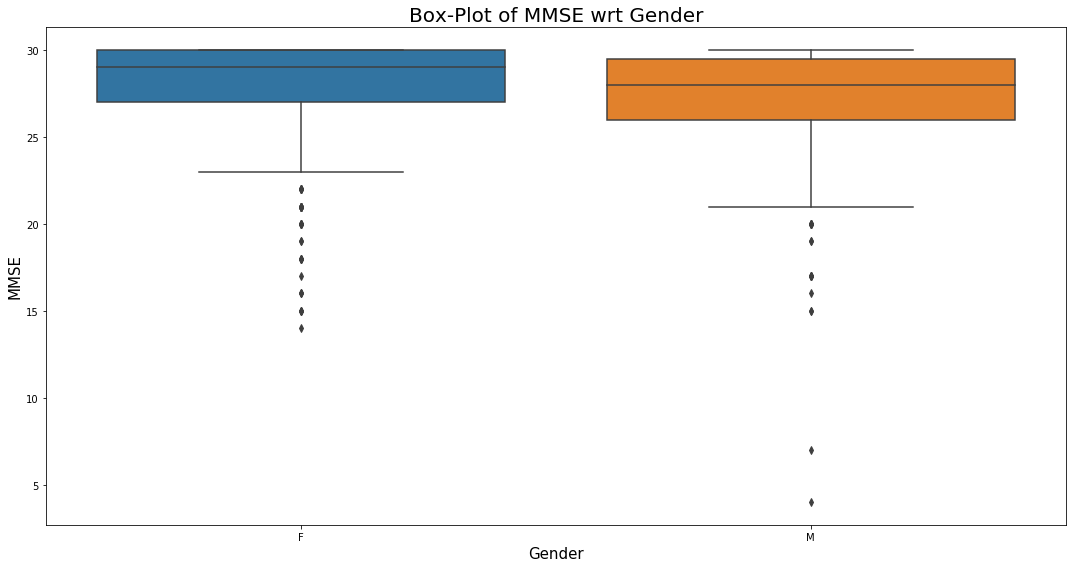

In [94]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'M/F', y = 'MMSE')
plt.title('Box-Plot of MMSE wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.tight_layout()
plt.show()

There are outliers in both the categories in the data.

See, it should be noted that the outliers cannot be ignored as the data is very significant and could determine the person status of Dementia from low scale to severe scale.

2. **Numerical Data :** MMSE <br>
   **Categorical Data :** CDR

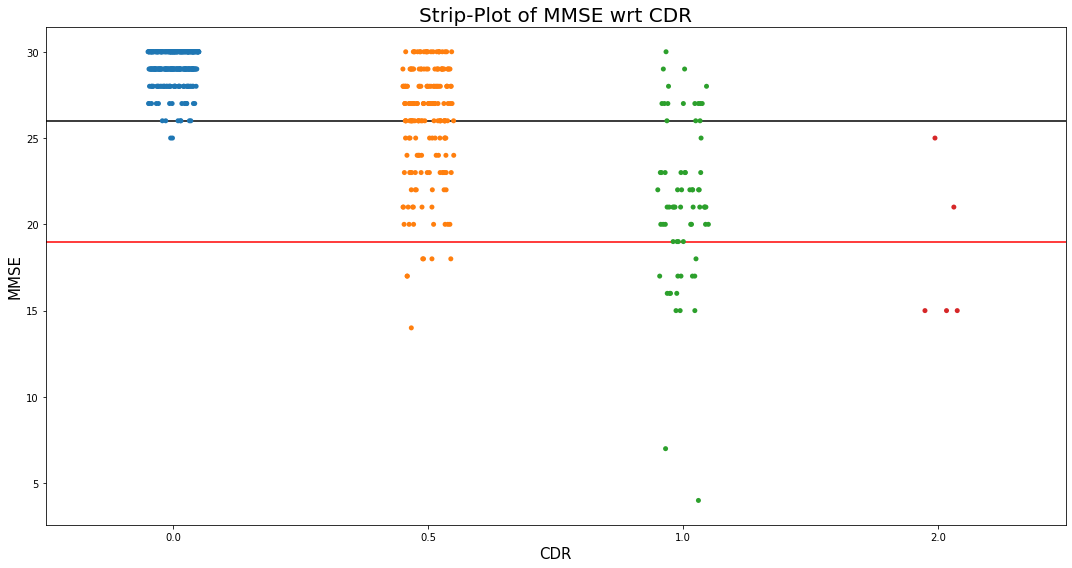

In [95]:
plt.figure(figsize = (15, 8))
sns.stripplot(data = df_new, x = 'CDR', y = 'MMSE')
plt.title('Strip-Plot of MMSE wrt CDR', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.axhline(y = 26, color = 'k')
plt.axhline(y = 19, color = 'r')
plt.tight_layout()
plt.show()

Here, we can clearly see that if the person scores less than **25/30**, then he/she is potenial candidate to be affected from the Dementia.

We can here clearly, see the segments of people for sure how they can be affected based upon the MMSE scoring.

3. **Numerical Data :** MMSE <br>
   **Categorical Data :** Educ

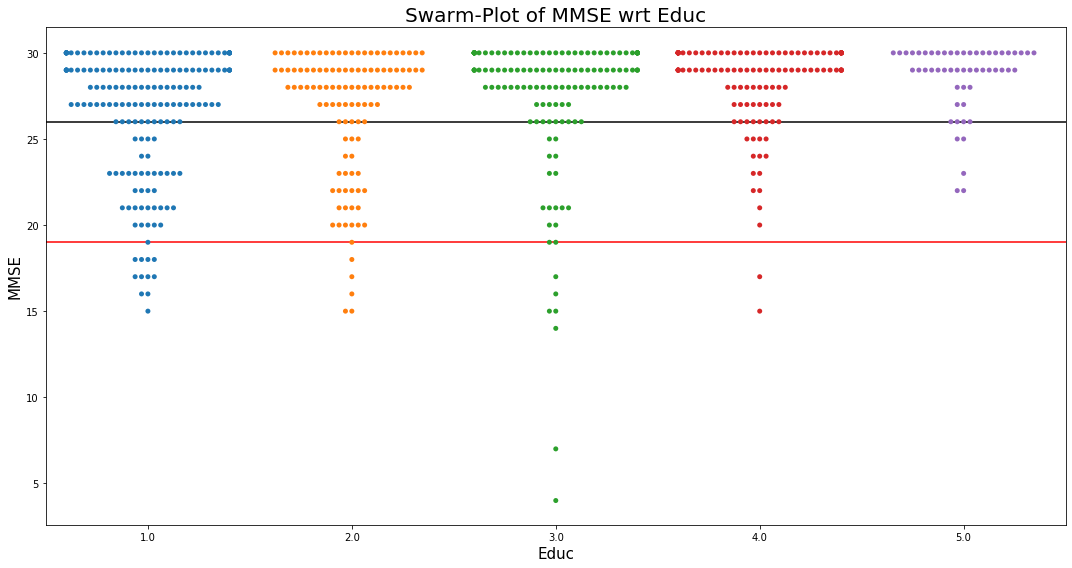

In [96]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'Educ', y = 'MMSE')
plt.title('Swarm-Plot of MMSE wrt Educ', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.axhline(y = 26, color = 'k')
plt.axhline(y = 19, color = 'r')
plt.tight_layout()
plt.show()

We can see clearly that the MMSE scores for the person who are well-educated are pretty high.

We can infer that people with higher education have higher MMSE scores and thus have less chances of getting demented.

4. **Numerical Data :** MMSE <br>
   **Categorical Data :** SES

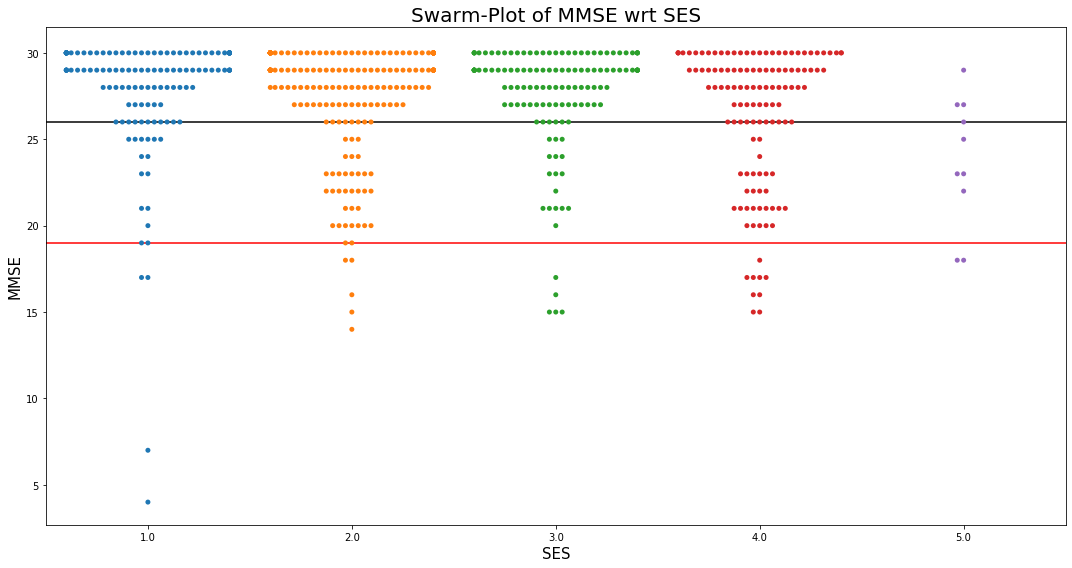

In [97]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'SES', y = 'MMSE')
plt.title('Swarm-Plot of MMSE wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.axhline(y = 26, color = 'k')
plt.axhline(y = 19, color = 'r')
plt.tight_layout()
plt.show()

We can infer from the above graph that people belonging to SES category 1,3 & 4 have higher chances of getting demented (lower MMSE scores). We will check later whether education plays an important role in this analysis.

###########################################################################################################################

### Numerical - Numerical Data

###########################################################################################################################

1. **Numerical Data** = Age <br>
   **Numerical Data** = MMSE

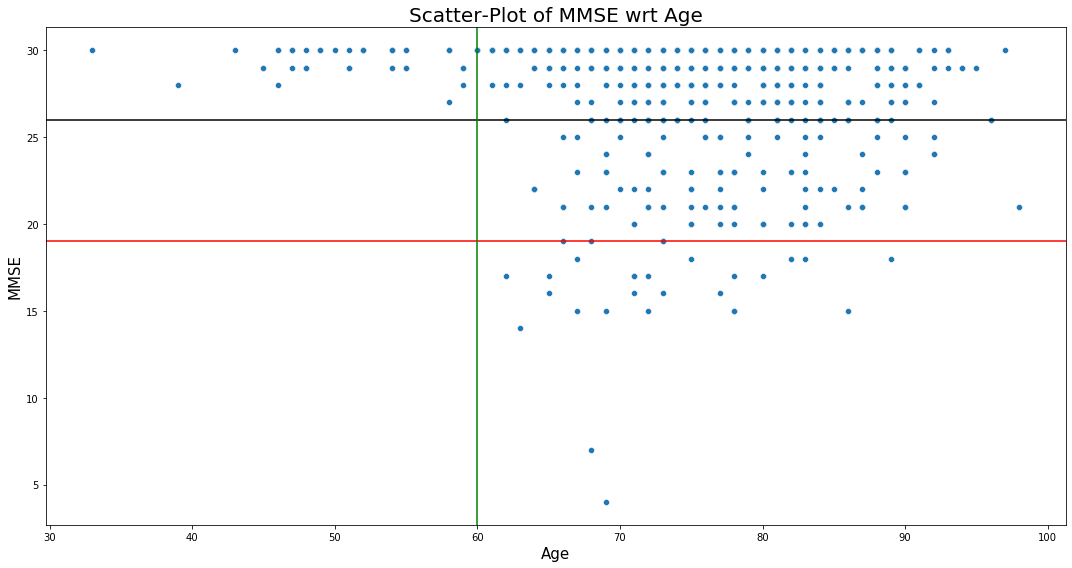

In [98]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'Age', y = 'MMSE')
plt.title('Scatter-Plot of MMSE wrt Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.axhline(y = 26, color = 'k')
plt.axhline(y = 19, color = 'r')
plt.axvline(x = 60, color = 'g')
plt.tight_layout()
plt.show()

We can see that dementia occurs above the age of 60 years. So the people who suffer around this mark is known as Young Dementia people.

With early treatment we can slow down the process of growth of dementia though we cannot cure them.

2. **Numerical Data** = Age <br>
   **Numerical Data** = eTIV

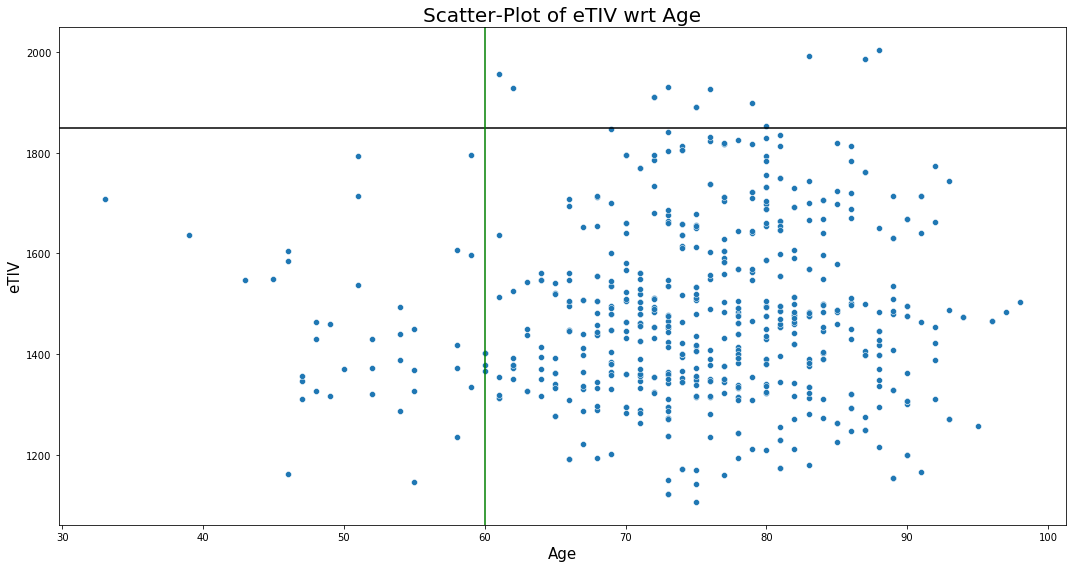

In [99]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'Age', y = 'eTIV')
plt.title('Scatter-Plot of eTIV wrt Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.axhline(y = 1850, color = 'k')
plt.axvline(x = 60, color = 'g')
plt.tight_layout()
plt.show()

Here, we can see that age and eTIV are not related strongly.

3. **Numerical Data** = Age <br>
   **Numerical Data** = nWBV

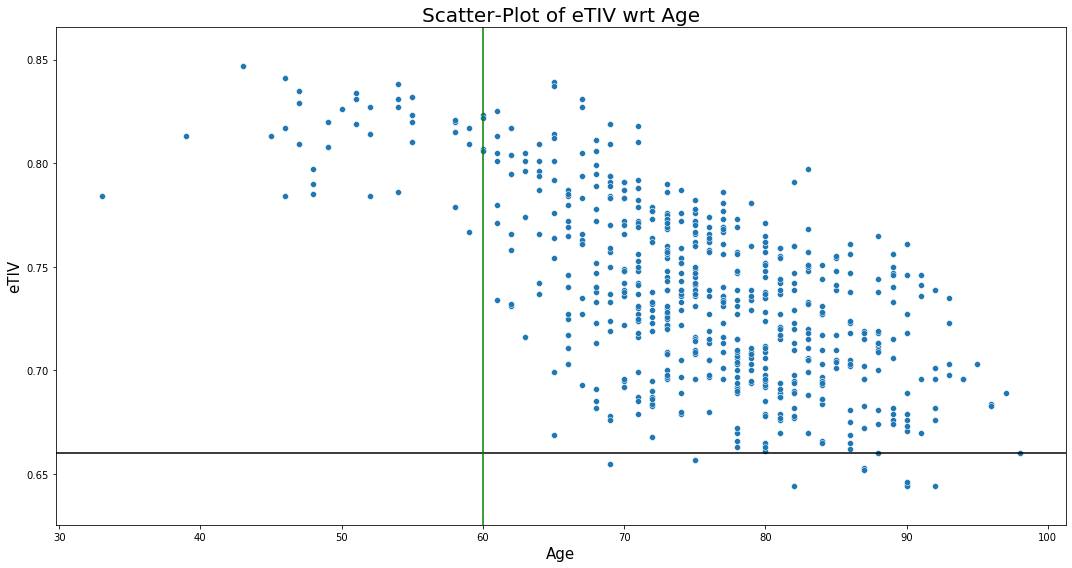

In [100]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'Age', y = 'nWBV')
plt.title('Scatter-Plot of eTIV wrt Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.axhline(y = 0.66, color = 'k')
plt.axvline(x = 60, color = 'g')
plt.tight_layout()
plt.show()

If we can analyse the data above, we can see that the after the age of 60 years, nWBV values predominently decreases as the age increases, it somehow has the negative correlationship.

4. **Numerical Data** = eTIV <br>
   **Numerical Data** = ASF

<Figure size 1080x576 with 0 Axes>

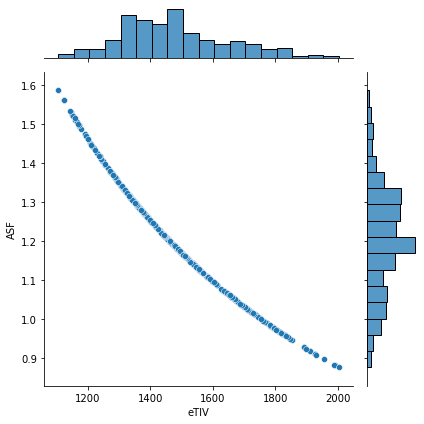

In [101]:
plt.figure(figsize = (15, 8))
sns.jointplot(data = df_new, x = 'eTIV', y = 'ASF')
plt.tight_layout()
plt.show()

We can clearly see the negative correlation between them and infer that as a person's eTIV inceases, the ASF starts to decrease.

5. **Numerical Data** = eTIV <br>
   **Numerical Data** = nWBV

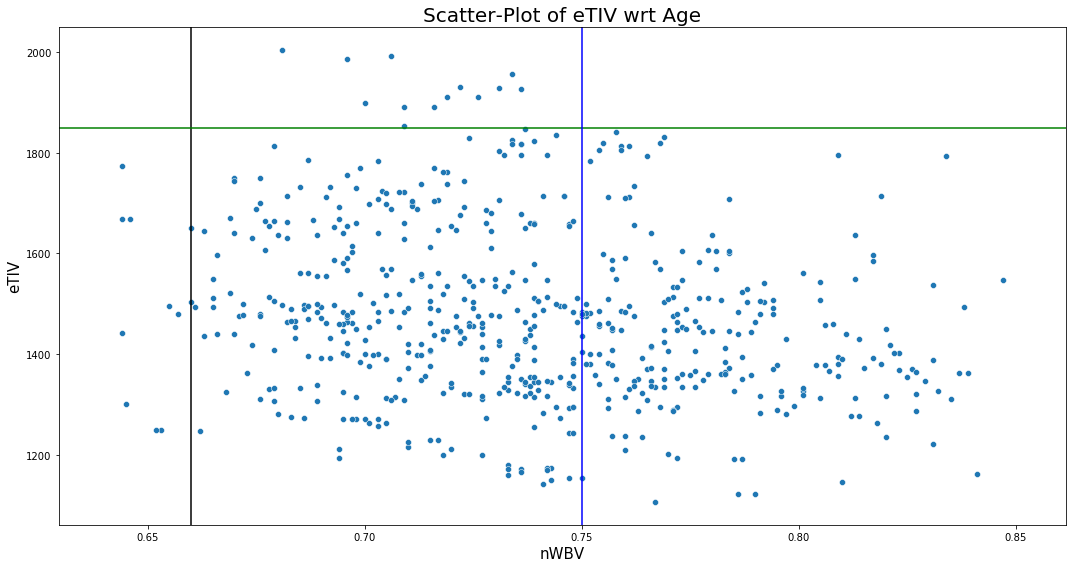

In [102]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'nWBV', y = 'eTIV')
plt.title('Scatter-Plot of eTIV wrt Age', fontsize = 20)
plt.xlabel('nWBV', fontsize = 15)
plt.ylabel('eTIV', fontsize = 15)
plt.axvline(x = 0.66, color = 'k')
plt.axhline(y = 1850, color = 'g')
plt.axvline(x = 0.75, color = 'b')
plt.tight_layout()
plt.show()

############################################################################################################################

From, this graph we can get to know few things about the data.

See, from earlier analysis we have seen that eTIV values above 1850 show dementia. But from this graph we come to know that nWBV values for them is less than 0.75 units.

So, if a person has eTIV greater than 1850 and if his nWBV is less than 0.75 then he would be the potential candidate.

############################################################################################################################

For, fast understandings of the data, we can use the heatmap and pairplot in the multivariate analysis and based on certain characteristics of certain pairplot we could separate bi-variate analysis of them for further analysis.

###########################################################################################################################

### Categorical - Categorical Data

###########################################################################################################################

1. **Categorical Data** = CDR <br>
   **Categorical Data** = M/F

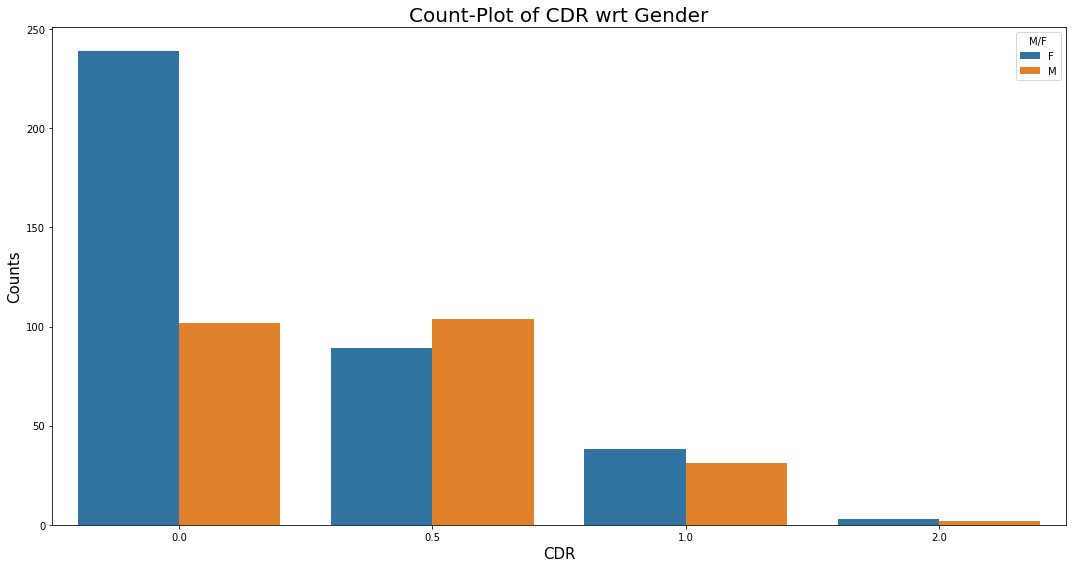

In [103]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'CDR', hue = 'M/F')
plt.title('Count-Plot of CDR wrt Gender', fontsize = 20)
plt.xlabel('CDR', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tight_layout()
plt.show()

In [104]:
print(pd.crosstab(df_new["CDR"], df_new['M/F']))

M/F    F    M
CDR          
0.0  239  102
0.5   89  104
1.0   38   31
2.0    3    2


We can see that male are more detected fastly then the females for dementia.

2. **Categorical Data** = Group <br>
   **Categorical Data** = M/F

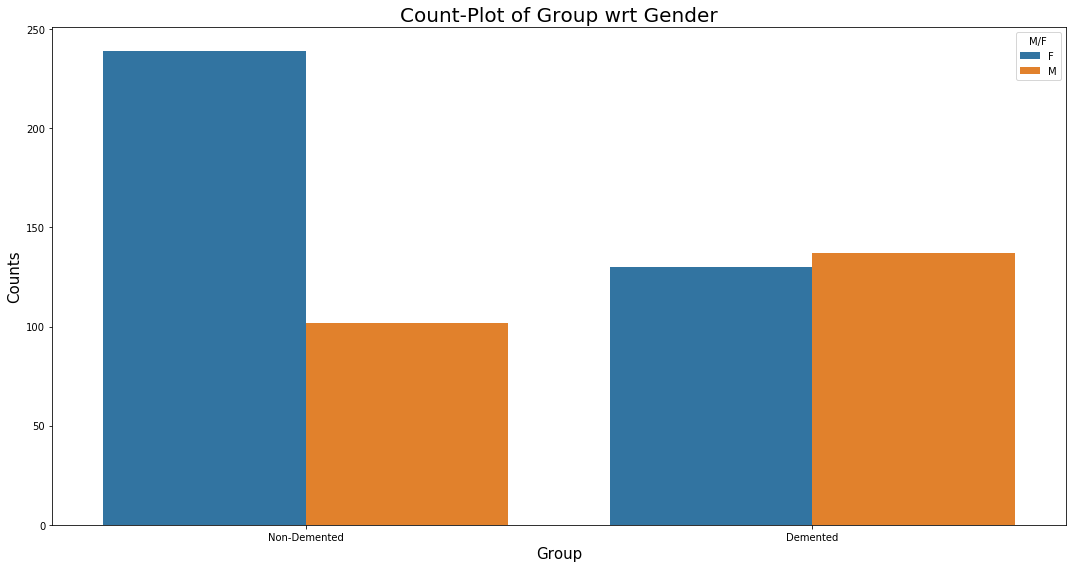

In [105]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Group', hue = 'M/F')
plt.title('Count-Plot of Group wrt Gender', fontsize = 20)
plt.xlabel('Group', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tight_layout()
plt.show()

Males are slightly more affected than females wrt to dementia.

Let us find the **ratio of the males and females affected** : 

In [106]:
df_new.groupby("Group")["M/F"].value_counts()

Group         M/F
Demented      M      137
              F      130
Non-Demented  F      239
              M      102
Name: M/F, dtype: int64

`137` **males** and `130` **females** are affected by Dementia.

In [107]:
df_new["M/F"].value_counts()

F    369
M    239
Name: M/F, dtype: int64

In [108]:
print("The ratio of total males affected with dementia:", round(137 / 239, 3))

The ratio of total males affected with dementia: 0.573


In [109]:
print("The ratio of total females affected with dementia :", round(130 / 369, 3))

The ratio of total females affected with dementia : 0.352


See, we can clearly say that **slightly more than half** of the males in our sample suffer from this disease when compared with mere **35 %** wrt females.

3. **Categorical Data** = Group <br>
   **Categorical Data** = Educ

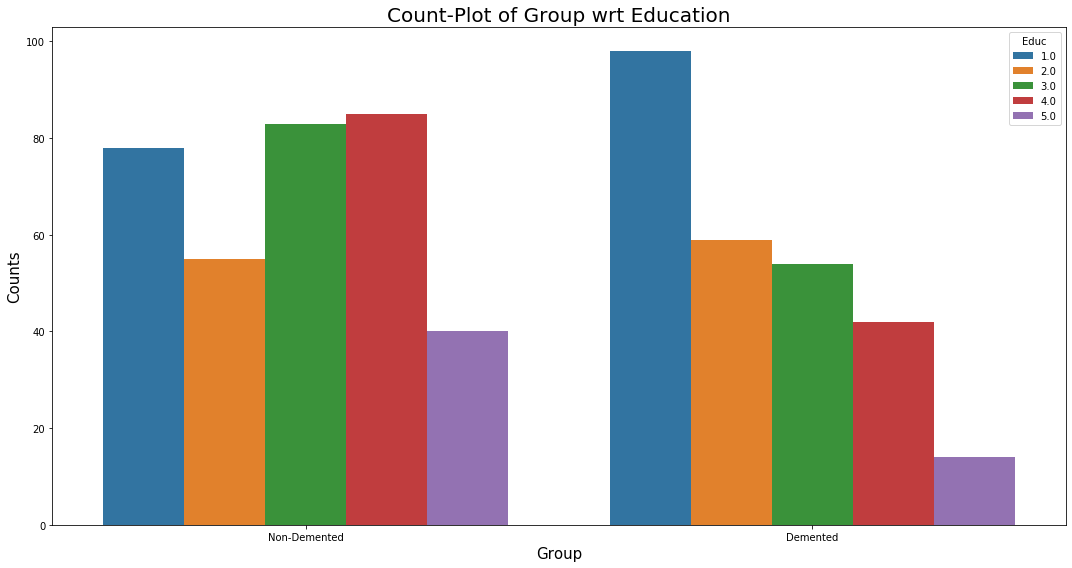

In [110]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Group', hue = 'Educ')
plt.title('Count-Plot of Group wrt Education', fontsize = 20)
plt.xlabel('Group', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tight_layout()
plt.show()

From the above graph we can clearly see that, more number of demented persons come from low-education background and very few come from high education back-ground.

In [111]:
df_new.groupby("Group")["Educ"].value_counts()["Demented"].sort_index()

Educ
1.0    98
2.0    59
3.0    54
4.0    42
5.0    14
Name: Educ, dtype: int64

In [112]:
df_new["Educ"].value_counts().sort_index()

1.0    176
2.0    114
3.0    137
4.0    127
5.0     54
Name: Educ, dtype: int64

#### The ratios are as follows :

In [113]:
print(np.round(df_new.groupby("Group")["Educ"].value_counts()["Demented"] / df_new["Educ"].value_counts().sort_index(), 2))

Educ
1.0    0.56
2.0    0.52
3.0    0.39
4.0    0.33
5.0    0.26
Name: Educ, dtype: float64


We can infer the same thing from above data.

4. **Categorical Data** = Group <br>
   **Categorical Data** = SES

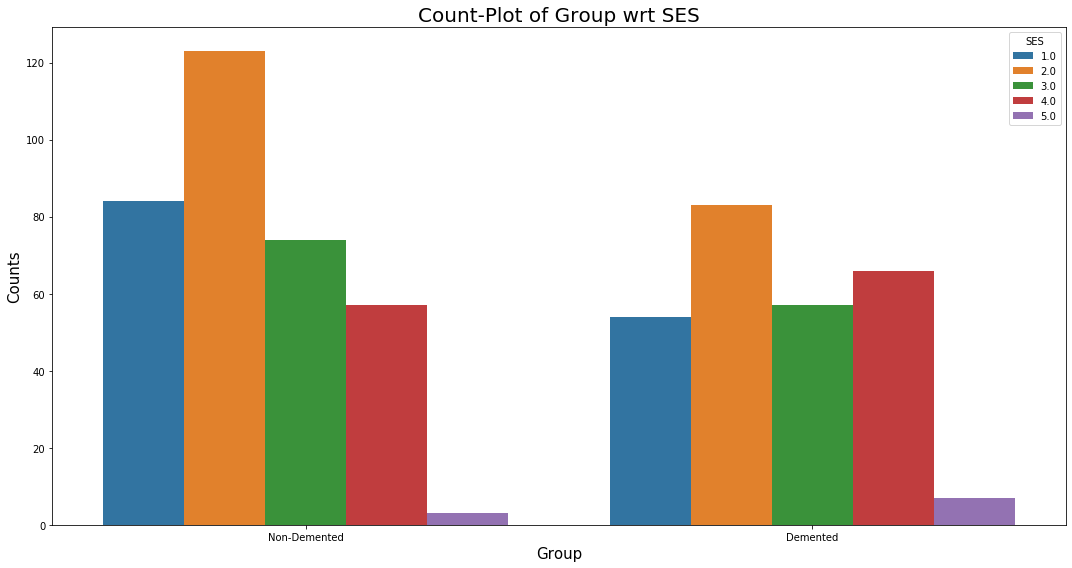

In [114]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Group', hue = 'SES')
plt.title('Count-Plot of Group wrt SES', fontsize = 20)
plt.xlabel('Group', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tight_layout()
plt.show()

We can see that there are high number of people in category `3` and `4` who are affected from the disease.

In [115]:
df_new.groupby("Group")["SES"].value_counts()["Demented"].sort_index()

SES
1.0    54
2.0    83
3.0    57
4.0    66
5.0     7
Name: SES, dtype: int64

In [116]:
df_new["SES"].value_counts().sort_index()

1.0    138
2.0    206
3.0    131
4.0    123
5.0     10
Name: SES, dtype: int64

#### The ratios are as follows :

In [117]:
print(np.round(df_new.groupby("Group")["SES"].value_counts()["Demented"].sort_index() / df_new["SES"].value_counts().sort_index(), 2))

SES
1.0    0.39
2.0    0.40
3.0    0.44
4.0    0.54
5.0    0.70
Name: SES, dtype: float64


**Note** : Interestingly the ratios drastically increased for the **fifth** category.

5. **Categorical Data** = Educ <br>
   **Categorical Data** = SES

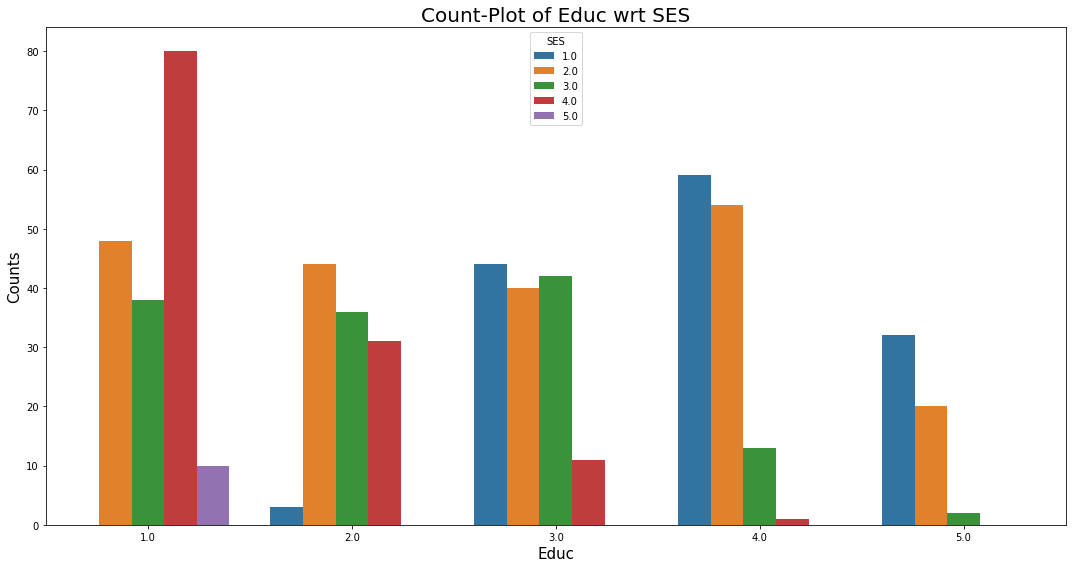

In [118]:
plt.figure(figsize = (15, 8))
sns.countplot(data = df_new, x = 'Educ', hue = 'SES')
plt.title('Count-Plot of Educ wrt SES', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.tight_layout()
plt.show()

In [119]:
print(pd.crosstab(df_new["Educ"], df_new['SES']))

SES   1.0  2.0  3.0  4.0  5.0
Educ                         
1.0     0   48   38   80   10
2.0     3   44   36   31    0
3.0    44   40   42   11    0
4.0    59   54   13    1    0
5.0    32   20    2    0    0


**Note :** We can clearly see that all the 10 members in SES category `5` have a very poor education background and this can be one of the factors for dementia as in the previous case only we have studied that 70 % of them are diagnosed with the diesease.

This table is irony in itself that those who are educated sometimes are not well established socially but whereas the other-way round people are also there like people with low education have very good societal and economical status.

## *End of Bivariate Analysis*

###########################################################################################################################

## Multi-variate Analysis

###########################################################################################################################

1. Correlation among the multiple attributes.

In [120]:
corr = df_new[['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR', 'Educ', 'SES']].corr()

In [121]:
print(corr)

           Age      MMSE      eTIV      nWBV       ASF       CDR      Educ  \
Age   1.000000 -0.084834  0.057413 -0.647799 -0.050130  0.133238 -0.181071   
MMSE -0.084834  1.000000 -0.008678  0.375924  0.014269 -0.713990  0.202428   
eTIV  0.057413 -0.008678  1.000000 -0.222960 -0.989135  0.053612  0.165388   
nWBV -0.647799  0.375924 -0.222960  1.000000  0.224229 -0.404164  0.134465   
ASF  -0.050130  0.014269 -0.989135  0.224229  1.000000 -0.061647 -0.148081   
CDR   0.133238 -0.713990  0.053612 -0.404164 -0.061647  1.000000 -0.186392   
Educ -0.181071  0.202428  0.165388  0.134465 -0.148081 -0.186392  1.000000   
SES   0.049548 -0.159186 -0.223176  0.007842  0.211437  0.094744 -0.623688   

           SES  
Age   0.049548  
MMSE -0.159186  
eTIV -0.223176  
nWBV  0.007842  
ASF   0.211437  
CDR   0.094744  
Educ -0.623688  
SES   1.000000  


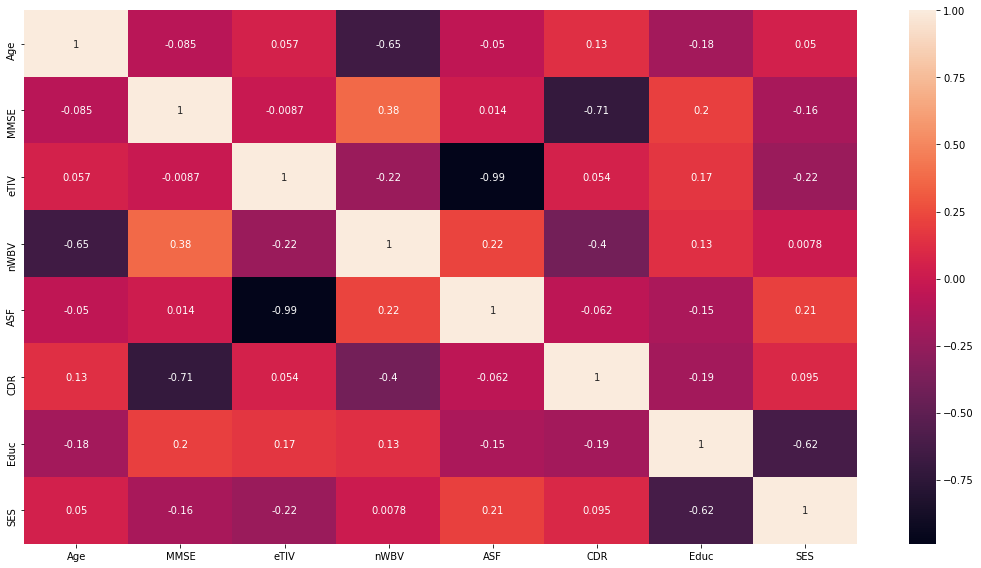

In [122]:
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True)
plt.tight_layout()
plt.show()

Infereneces : 

1. Strong negative correlation between CDR and MMSE almost **71 %**. 
2. Age and nWBV have negative correlation with each other.
3. ASF and eTIV have high negative correlation i.e., **99 %**. 

By, further analysis we can see that the non-demented people have 86% negative correlationship with the CDR column and 60% positive relationship with MMSE.

2. Pairplot

<Figure size 1080x576 with 0 Axes>

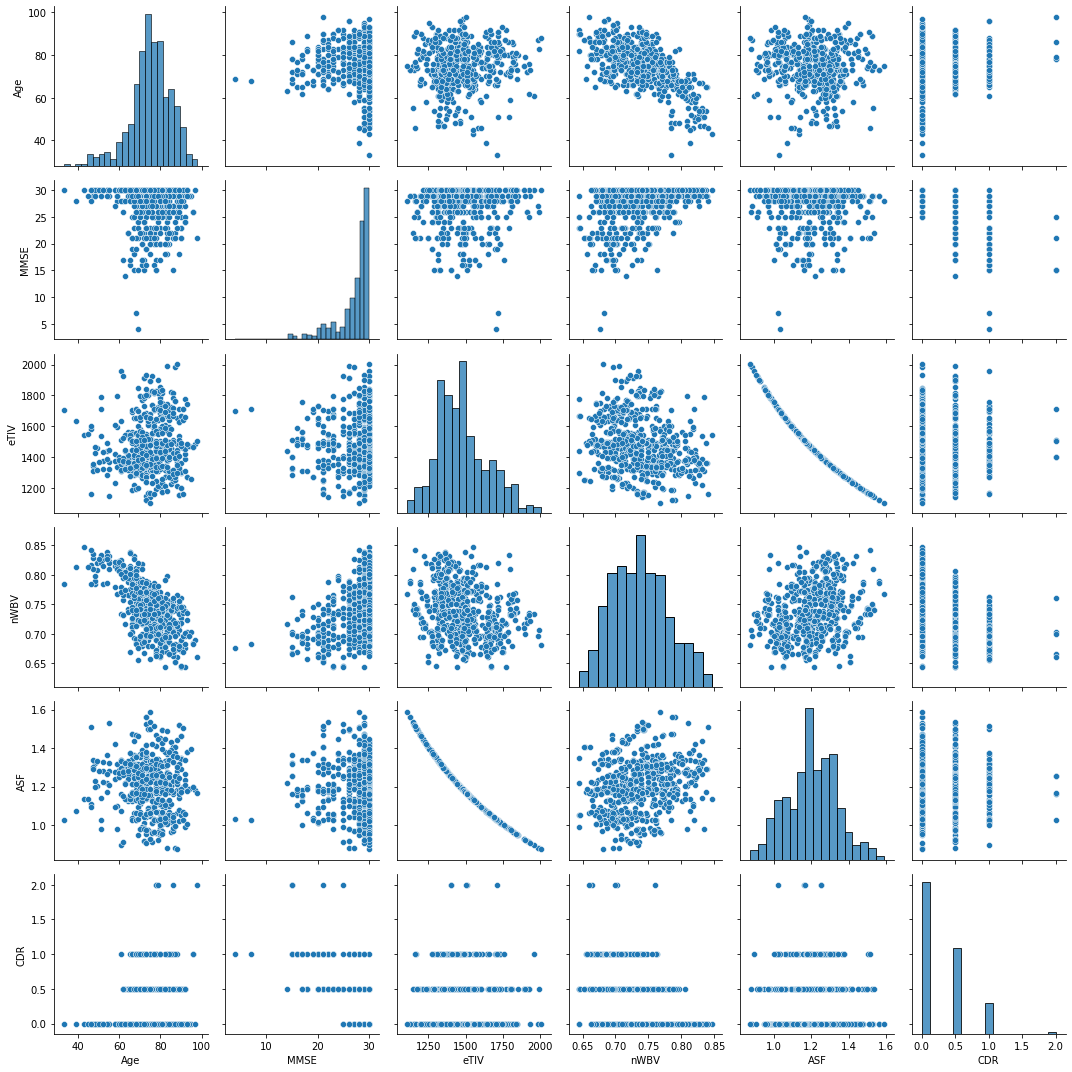

In [123]:
plt.figure(figsize = (15, 8))
sns.pairplot(df_new[['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR']])
plt.tight_layout()
plt.show()

The samething can be inferred from the pairplot graphs as like correlationship matrix.

3. Numerical : Age <br>
   Categorical : SES <br>
   Categorical : Group

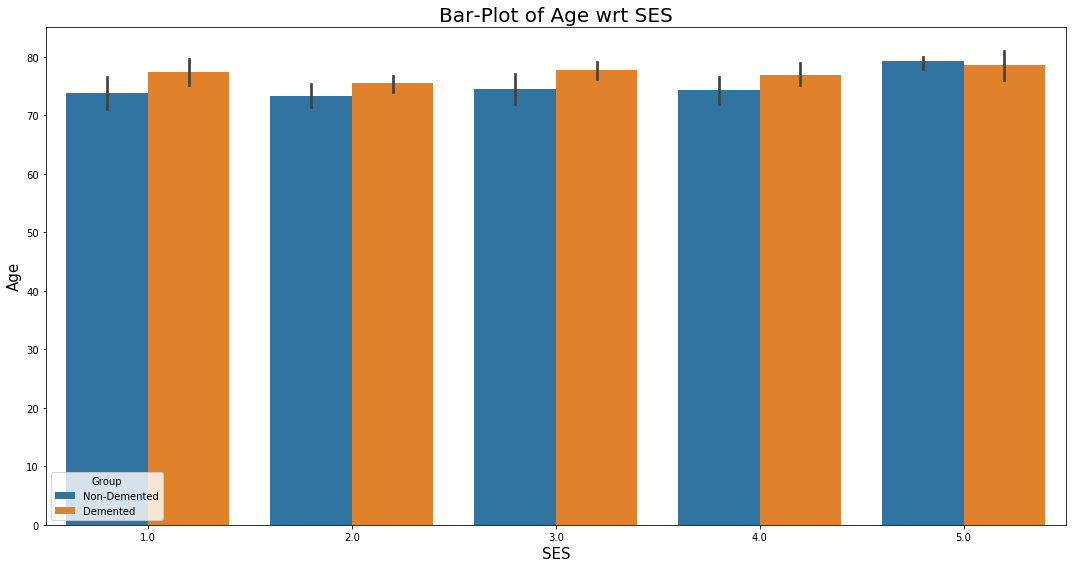

In [124]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df_new, x = 'SES', y = 'Age', hue = "Group")
plt.title('Bar-Plot of Age wrt SES', fontsize = 20)
plt.xlabel('SES', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

Except for the last column, we can see that the average for other categories is sligthly higher for the demented persons than that of non-demented persons.

In [125]:
np.round(df_new.groupby(by = ["SES", "Group"])["Age"].mean(), 2)

SES  Group       
1.0  Demented        77.50
     Non-Demented    73.86
2.0  Demented        75.46
     Non-Demented    73.37
3.0  Demented        77.70
     Non-Demented    74.50
4.0  Demented        76.98
     Non-Demented    74.37
5.0  Demented        78.57
     Non-Demented    79.33
Name: Age, dtype: float64

From above data, we can also say that on an average generally 77 years of age is the mean age to get affected by this disease for all SES categories.

4. Numerical : Age <br>
   Categorical : Educ <br>
   Categorical : Group

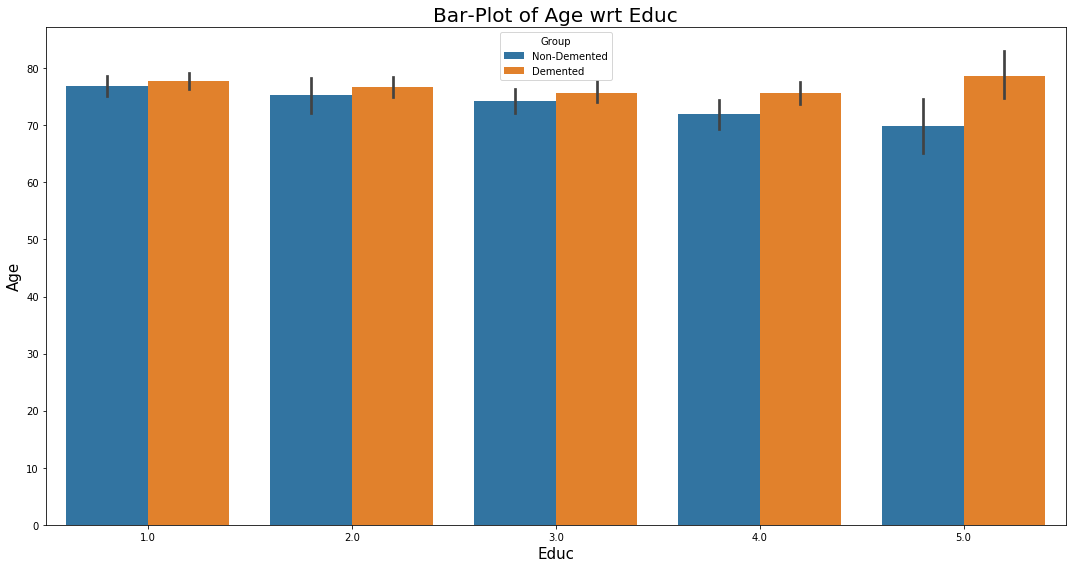

In [126]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df_new, x = 'Educ', y = 'Age', hue = "Group")
plt.title('Bar-Plot of Age wrt Educ', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

In [127]:
print("This are the mean age for all different education categories :", "\n")
print(np.round(df_new.groupby(by = ["Educ", "Group"])["Age"].mean(), 2))

This are the mean age for all different education categories : 

Educ  Group       
1.0   Demented        77.73
      Non-Demented    76.87
2.0   Demented        76.68
      Non-Demented    75.36
3.0   Demented        75.70
      Non-Demented    74.34
4.0   Demented        75.62
      Non-Demented    71.93
5.0   Demented        78.71
      Non-Demented    69.85
Name: Age, dtype: float64


We can infer that from the above analysis that the average age for all education categories is slightly higher for demented persons than their non-demented counterparts.

5. Numerical : Age <br>
   Numerical : MMSE <br>
   Categorical : Group

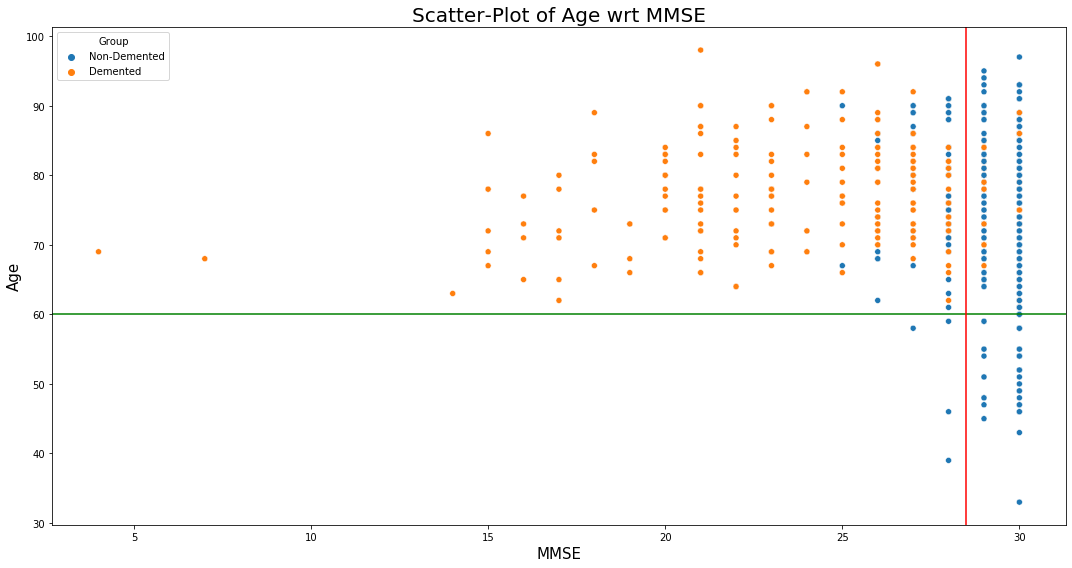

In [128]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'MMSE', y = 'Age', hue = "Group")
plt.title('Scatter-Plot of Age wrt MMSE', fontsize = 20)
plt.xlabel('MMSE', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.axhline(y = 60, color = "g")
plt.axvline(x = 28.5, color = "r")
plt.tight_layout()
plt.show()

There are two people, who have scored less than 10.

We can clearly see that below 28.5 mark, there are more number of people with disease and healthy people tend to score 29 or 30 marks out of 30.

There are quite number of people who have scored less than 28.5 but they are all greater than 25, yet they are not diseased people because their age is way to small.

6. Numerical : Age <br>
   Categorical : M/F <br>
   Categorical : Group

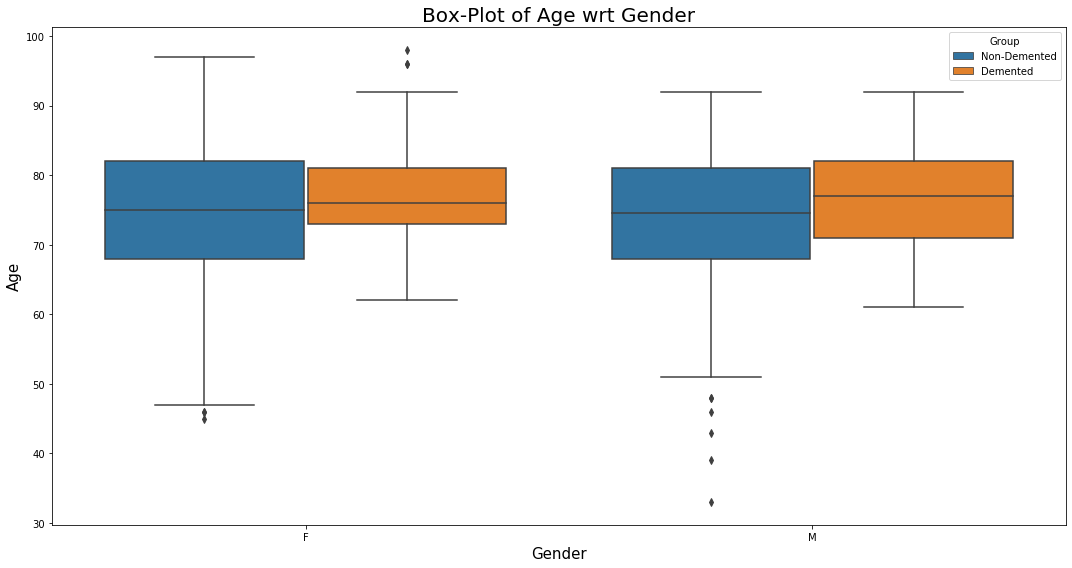

In [129]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_new, x = 'M/F', y = 'Age', hue = "Group")
plt.title('Box-Plot of Age wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.tight_layout()
plt.show()

The median age for female is less when compared with the male counterpart in the demented case.

There are few outliers in the female category in the demented section

In [130]:
print(np.round(df_new.groupby(by = ["M/F", "Group"])["Age"].median(), 2))

M/F  Group       
F    Demented        76.0
     Non-Demented    75.0
M    Demented        77.0
     Non-Demented    74.5
Name: Age, dtype: float64


The median age for male is `77 years` and for female it is `76 years` for demented category.

7. Categorical : SES <br>
   Categorical : M/F <br>
   Categorical : Group

In [131]:
df_new.groupby(by = ["M/F", "SES"])["Group"].value_counts().sort_index()

M/F  SES  Group       
F    1.0  Demented        15
          Non-Demented    52
     2.0  Demented        44
          Non-Demented    94
     3.0  Demented        34
          Non-Demented    57
     4.0  Demented        30
          Non-Demented    33
     5.0  Demented         7
          Non-Demented     3
M    1.0  Demented        39
          Non-Demented    32
     2.0  Demented        39
          Non-Demented    29
     3.0  Demented        23
          Non-Demented    17
     4.0  Demented        36
          Non-Demented    24
Name: Group, dtype: int64

Here, we can see an interesting point from the data.

**Note** : All the 7 members from the upper-class (5th category of SES) are female.

8. Numerical : ASF <br>
   Numerical : eTIV <br>
   Categorical : Group

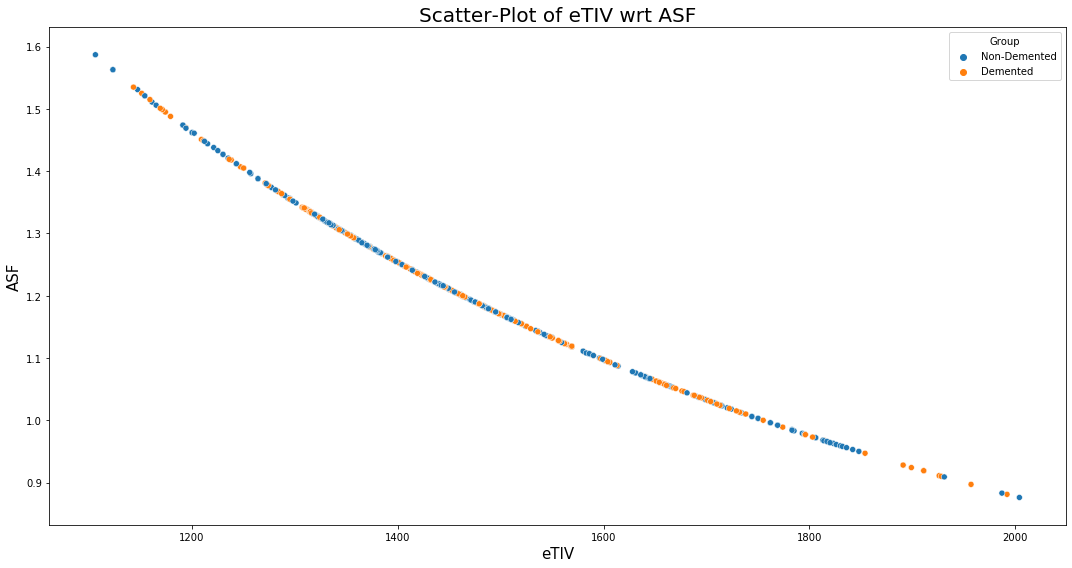

In [132]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'eTIV', y = 'ASF', hue = "Group")
plt.title('Scatter-Plot of eTIV wrt ASF', fontsize = 20)
plt.xlabel('eTIV', fontsize = 15)
plt.ylabel('ASF', fontsize = 15)
plt.tight_layout()
plt.show()

There is no clear distinguish between the categories but as inferred in the analysis done above, the eTIV and ASF have almost negative linear relationship.

9. Numerical : nWBV <br>
   Numerical : eTIV <br>
   Categorical : Group

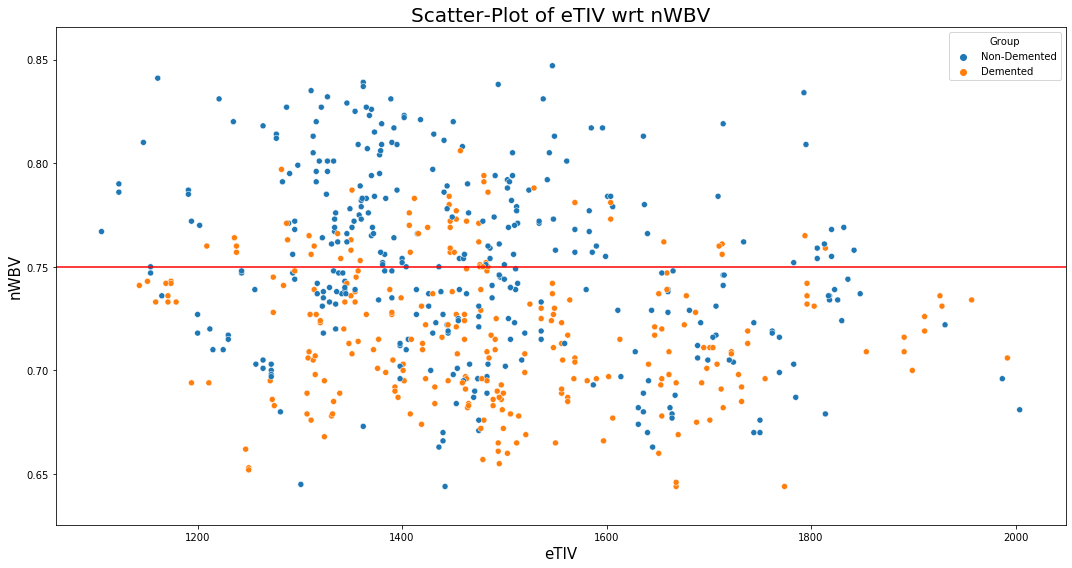

In [133]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_new, x = 'eTIV', y = 'nWBV', hue = "Group")
plt.title('Scatter-Plot of eTIV wrt nWBV', fontsize = 20)
plt.xlabel('eTIV', fontsize = 15)
plt.ylabel('nWBV', fontsize = 15)
plt.axhline(y = 0.75, color = "red")
plt.tight_layout()
plt.show()

It appears that there are more number of people below 0.75 mark who are demented. But this is purely based on the graph there must be some sort of statistical analysis required to confirm the same. 

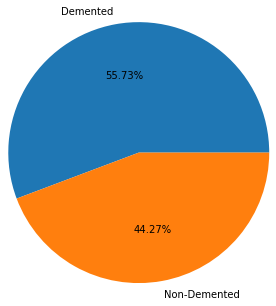

In [134]:
plt.pie(x = df_new[df_new["nWBV"] < 0.75]["Group"].value_counts(), 
        labels =  df_new[df_new["nWBV"] < 0.75]["Group"].value_counts().index, 
        autopct = "%.2f%%", radius = 1.5)
plt.show()

We can clearly see that it justifies the above statement that more than 50 % of people whose nWBV value is less than 0.75 suffer from dementia.

10. Numerical : MMSE <br>
    Categorical : M/F <br>
    Categorical : Group

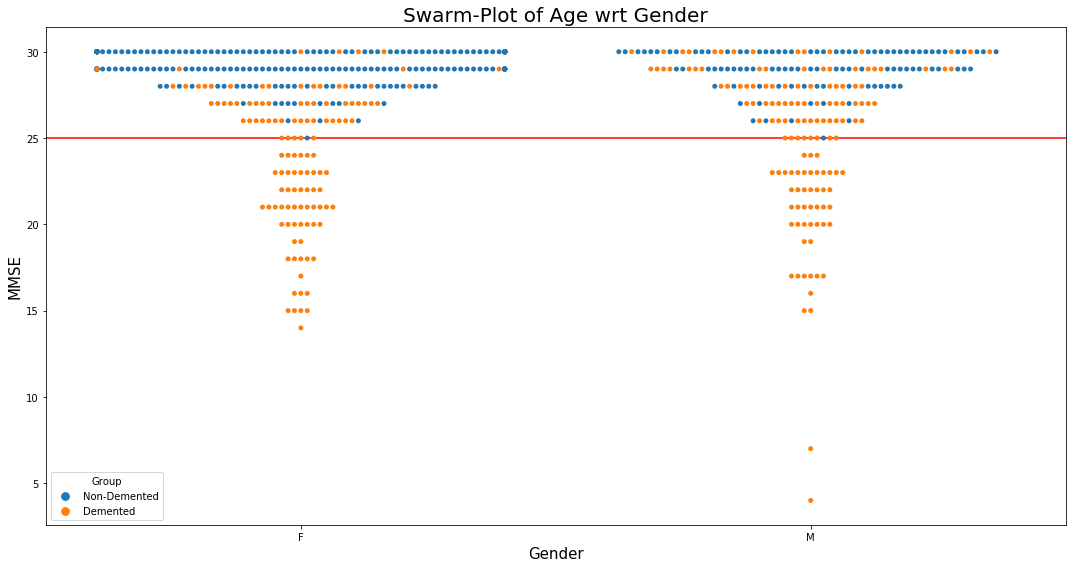

In [135]:
plt.figure(figsize = (15, 8))
sns.swarmplot(data = df_new, x = 'M/F', y = 'MMSE', hue = "Group")
plt.title('Swarm-Plot of Age wrt Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.axhline(y = 25, color = 'r')
plt.tight_layout()
plt.show()

Average MMSE marks for male and female : 

In [136]:
df_new.groupby(by = ["M/F", "Group"])["MMSE"].mean()

M/F  Group       
F    Demented        24.369231
     Non-Demented    29.230126
M    Demented        25.036496
     Non-Demented    29.039216
Name: MMSE, dtype: float64

Average score of women is slightly less when compared to men for the dementia category.

11. Numerical : MMSE <br>
   Categorical : Educ <br>
   Categorical : SES

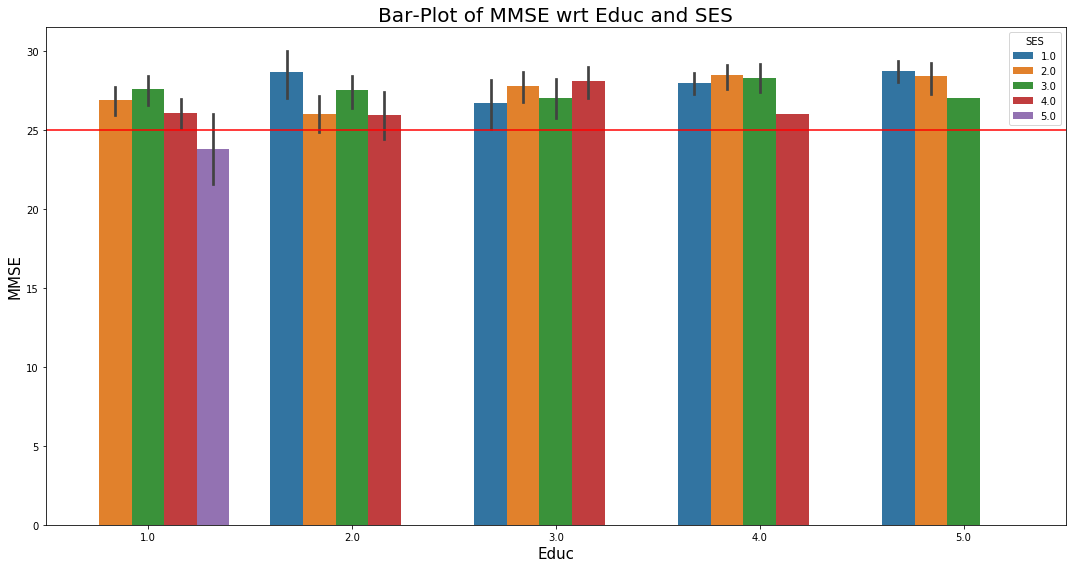

In [137]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df_new, x = 'Educ', y = 'MMSE', hue = "SES")
plt.axhline(y=25, color='r')
plt.title('Bar-Plot of MMSE wrt Educ and SES', fontsize = 20)
plt.xlabel('Educ', fontsize = 15)
plt.ylabel('MMSE', fontsize = 15)
plt.tight_layout()
plt.show()

As we have seen from our earlier analysis, the average MMSE scores for persons with poor education and high SES is less as compared to the other categories.

Group by between columns

In [138]:
df_new.groupby(by = ["M/F", "Group"])["eTIV"].mean()

M/F  Group       
F    Demented        1398.238462
     Non-Demented    1399.297071
M    Demented        1572.138686
     Non-Demented    1632.039216
Name: eTIV, dtype: float64

For men, there is some sort of clear distinction between the eTIV values

In [139]:
df_new.groupby(by = ["M/F", "Group"])["eTIV"].median()

M/F  Group       
F    Demented        1401.5
     Non-Demented    1389.0
M    Demented        1556.0
     Non-Demented    1642.0
Name: eTIV, dtype: float64

As we can see, the median values for eTIV are higher in males wrt females confirming the same behaviour as seen for the mean values.

In [140]:
df_new.groupby(by = ["M/F", "Group"])["ASF"].mean()

M/F  Group       
F    Demented        1.265700
     Non-Demented    1.263460
M    Demented        1.127752
     Non-Demented    1.086049
Name: ASF, dtype: float64

In [141]:
df_new.groupby(by = ["M/F", "Group"])["ASF"].median()

M/F  Group       
F    Demented        1.2525
     Non-Demented    1.2640
M    Demented        1.1280
     Non-Demented    1.0685
Name: ASF, dtype: float64

For ASF w.r.t age, we can infer that the ASF mean and median values are higher in case of females for the demented category than males.

In [142]:
df_new.groupby(by = ["M/F", "Group"])["nWBV"].mean()

M/F  Group       
F    Demented        0.722146
     Non-Demented    0.756155
M    Demented        0.714723
     Non-Demented    0.741745
Name: nWBV, dtype: float64

In [143]:
df_new.groupby(by = ["M/F", "Group"])["nWBV"].median()

M/F  Group       
F    Demented        0.726
     Non-Demented    0.754
M    Demented        0.711
     Non-Demented    0.736
Name: nWBV, dtype: float64

We can see that the average and median values are slightly higher in the case of females with dementia than males with dementia

### Data Cleaning/Pre-Processing

In [144]:
df_new.isnull().sum()

ID       0
M/F      0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64

We have handled all our missing values.

**Let us now have a look at outlier detection and handling**

1. Age

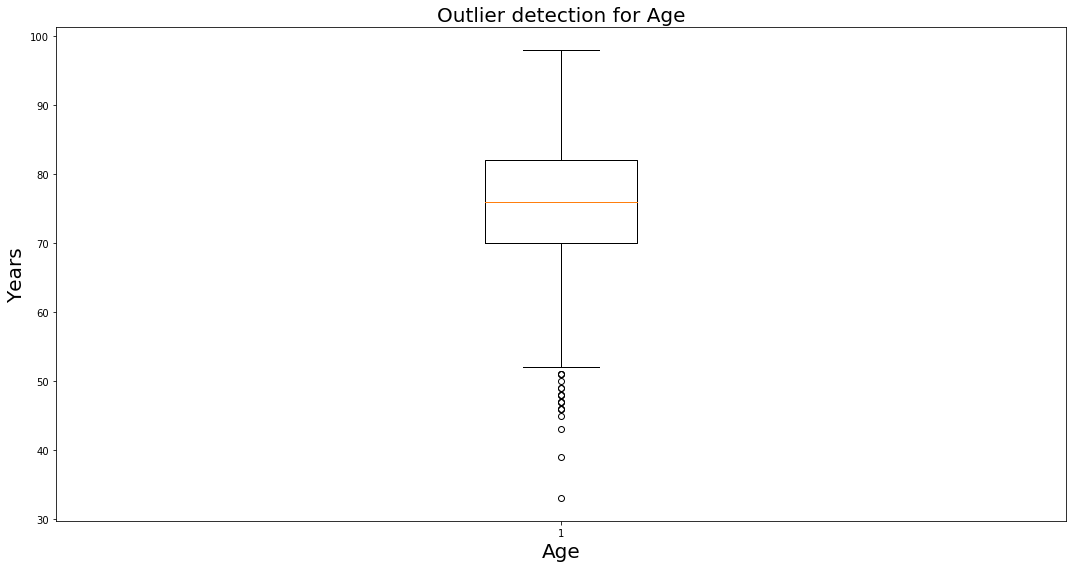

In [145]:
#let us plot the outliers for Age column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['Age'])
plt.title('Outlier detection for Age', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Years', fontsize=20)
plt.tight_layout()
plt.show()

There are outliers present below the **lower bound (Q1-1.5*IQR)**. Let us check these outlier points

In [146]:
#checking the outliers for Age using IQR method
q1=df_new['Age'].quantile(0.25)    
q3=df_new['Age'].quantile(0.75)
IQR=q3-q1

lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
print('The Q1 value is:', q1)
print('The lower bound value is:', lower)

The Q1 value is: 70.0
The lower bound value is: 52.0


In [147]:
df_new[(df_new['Age']<lower)]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
8,Oasis_17,M,39,3.0,4.0,28.0,0.0,1636,0.813,1.073,Non-Demented
10,Oasis_19,F,48,5.0,2.0,29.0,0.0,1326,0.785,1.323,Non-Demented
20,Oasis_32,M,51,5.0,1.0,29.0,0.0,1538,0.831,1.141,Non-Demented
25,Oasis_41,F,47,4.0,2.0,30.0,0.0,1346,0.829,1.304,Non-Demented
30,Oasis_54,F,46,5.0,1.0,30.0,0.0,1585,0.817,1.107,Non-Demented
38,Oasis_65,M,33,4.0,1.0,30.0,0.0,1709,0.784,1.027,Non-Demented
40,Oasis_67,F,49,5.0,1.0,30.0,0.0,1459,0.808,1.203,Non-Demented
43,Oasis_70,M,43,4.0,2.0,30.0,0.0,1547,0.847,1.134,Non-Demented
50,Oasis_82,F,47,4.0,1.0,30.0,0.0,1311,0.835,1.339,Non-Demented
52,Oasis_90,F,47,5.0,2.0,29.0,0.0,1357,0.809,1.294,Non-Demented


There are 19 records for the outlier values of Age. 

We will impute these values to the lower bound value 52.

In [148]:
df_new['Age'] = np.where(df_new['Age']<lower, 52, df_new['Age'])

In [149]:
df_new[(df_new['Age']<lower)]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group


All the outlier values have been removed.

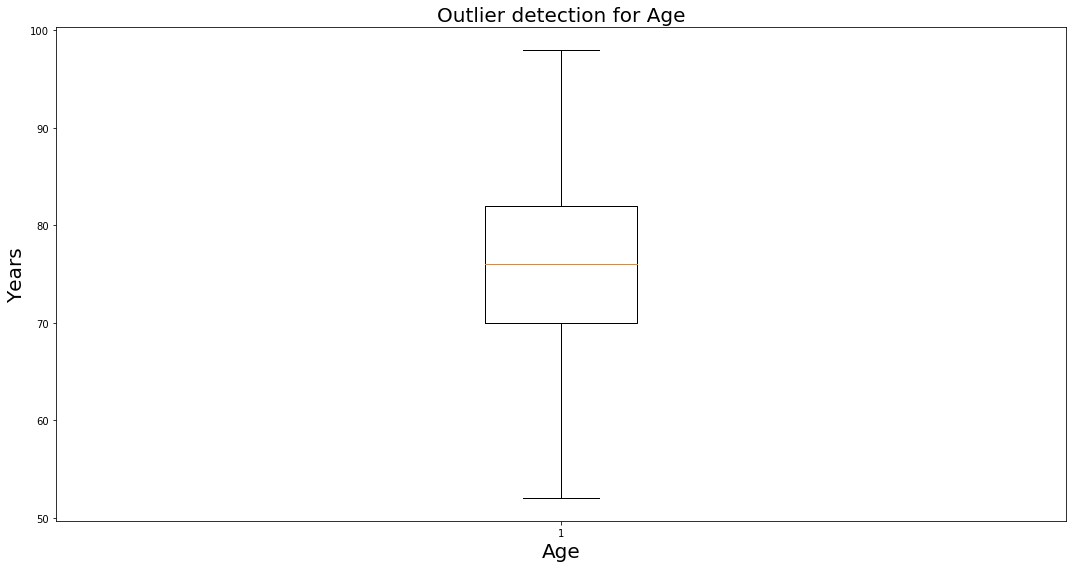

In [150]:
#let us again plot for confirmation of the outliers for Age column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['Age'])
plt.title('Outlier detection for Age', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Years', fontsize=20)
plt.tight_layout()
plt.show()

As observed earlier, the outliers have been removed.

In [151]:
#let us now check the mean and median values for the Age column
print('The mean value is:', df_new['Age'].mean())
print('The median value is:', df_new['Age'].median())

The mean value is: 75.37993421052632
The median value is: 76.0


As the mean and median values are lying close to each other, the distribution of the Age column looks to be fairly normal.

2. eTIV

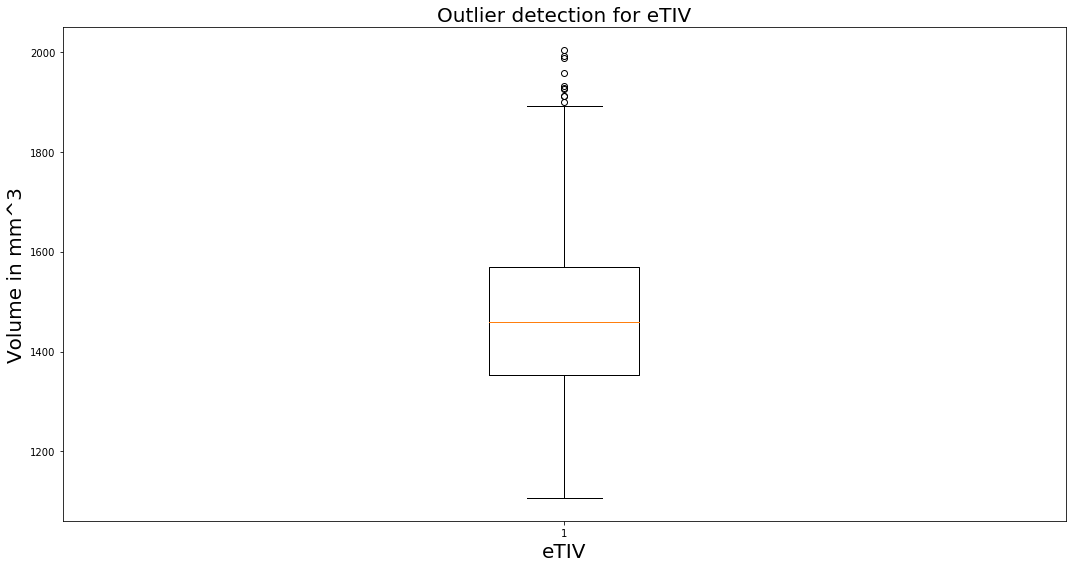

In [152]:
#let us plot the outliers for eTIV column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['eTIV'])
plt.title('Outlier detection for eTIV', fontsize=20)
plt.xlabel('eTIV', fontsize=20)
plt.ylabel('Volume in mm^3', fontsize=20)
plt.tight_layout()
plt.show()

There are some outlier points above the **upper bound (Q3 + 1.5*IQR)**

In [153]:
#checking the outliers for eTIV using IQR method
q1=df_new['eTIV'].quantile(0.25)    
q3=df_new['eTIV'].quantile(0.75)
IQR=q3-q1

lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
print('The Q3 value is:', q3)
print('The upper bound value is:', upper)

The Q3 value is: 1569.0
The upper bound value is: 1893.75


In [154]:
df_new[df_new['eTIV'] > upper]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
60,Oasis_108,M,72,5.0,1.0,26.0,0.5,1911,0.726,0.919,Demented
148,Oasis_263,M,83,3.0,2.0,26.0,0.5,1992,0.706,0.881,Demented
235,Oasis_437,M,87,2.0,2.0,27.0,0.0,1987,0.696,0.883,Non-Demented
236,Oasis_438,M,88,2.0,2.0,30.0,0.0,2004,0.681,0.876,Non-Demented
274,Oasis_476,M,72,4.0,1.0,26.0,0.5,1911,0.719,0.919,Demented
275,Oasis_477,M,76,4.0,1.0,25.0,0.5,1926,0.736,0.911,Demented
374,Oasis_576,M,61,4.0,1.0,30.0,1.0,1957,0.734,0.897,Demented
375,Oasis_577,M,62,4.0,1.0,30.0,0.5,1928,0.731,0.910,Demented
402,Oasis_604,M,73,3.0,2.0,29.0,0.0,1931,0.722,0.909,Non-Demented
574,Oasis_776,M,79,3.0,1.0,29.0,0.5,1899,0.700,0.924,Demented


Most of the persons in the above table belong to the demented group. However, there is no fixed pattern.

We will impute these outlier values for eTIV to the value closer to upper bound value which is `1893` 

In [155]:
df_new['eTIV'] = np.where(df_new['eTIV']>upper, 1893, df_new['eTIV'])

In [156]:
df_new[df_new['eTIV'] > 1893]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group


As we can see, we have removed the outliers. 

Let us check the boxplot again to confirm the imputation.

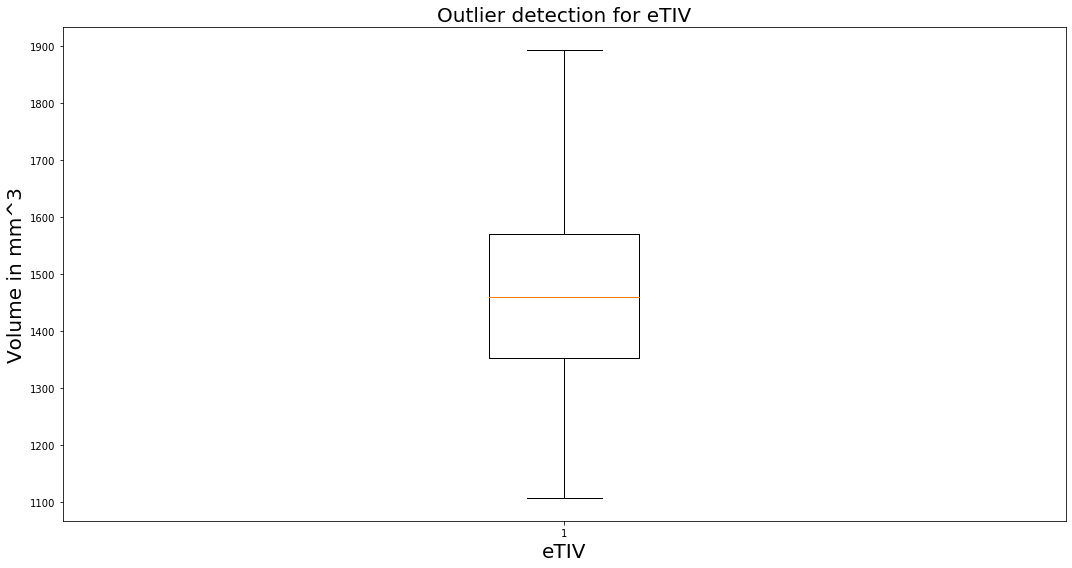

In [157]:
#let us plot the outliers for eTIV column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['eTIV'])
plt.title('Outlier detection for eTIV', fontsize=20)
plt.xlabel('eTIV', fontsize=20)
plt.ylabel('Volume in mm^3', fontsize=20)
plt.tight_layout()
plt.show()

4. nWBV

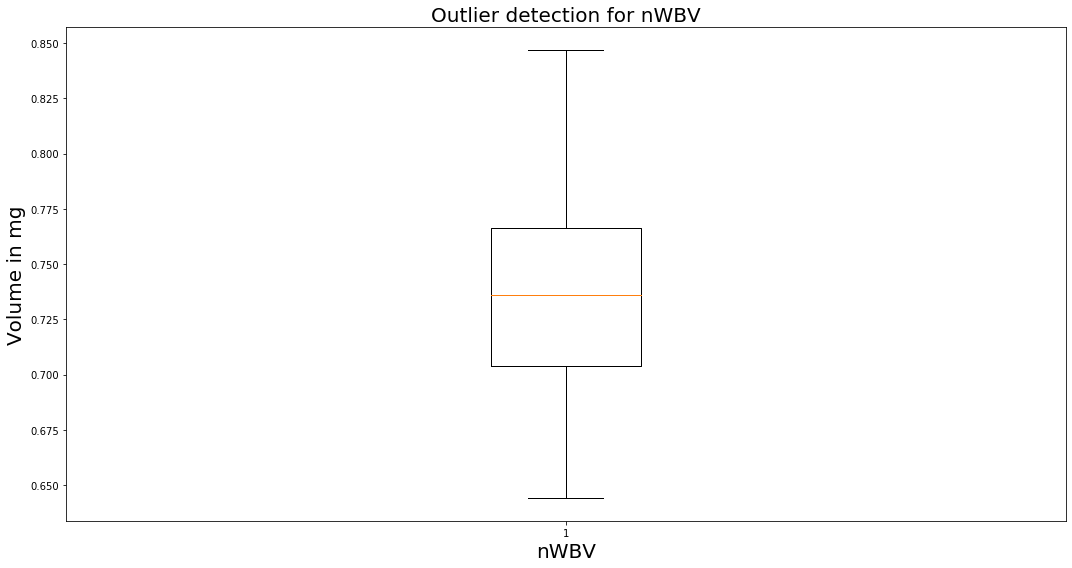

In [158]:
#let us plot the outliers for nWBV column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['nWBV'])
plt.title('Outlier detection for nWBV', fontsize=20)
plt.xlabel('nWBV', fontsize=20)
plt.ylabel('Volume in mg', fontsize=20)
plt.tight_layout()
plt.show()

As we can see, there are no visible outliers present in the nWBV column.

5. ASF

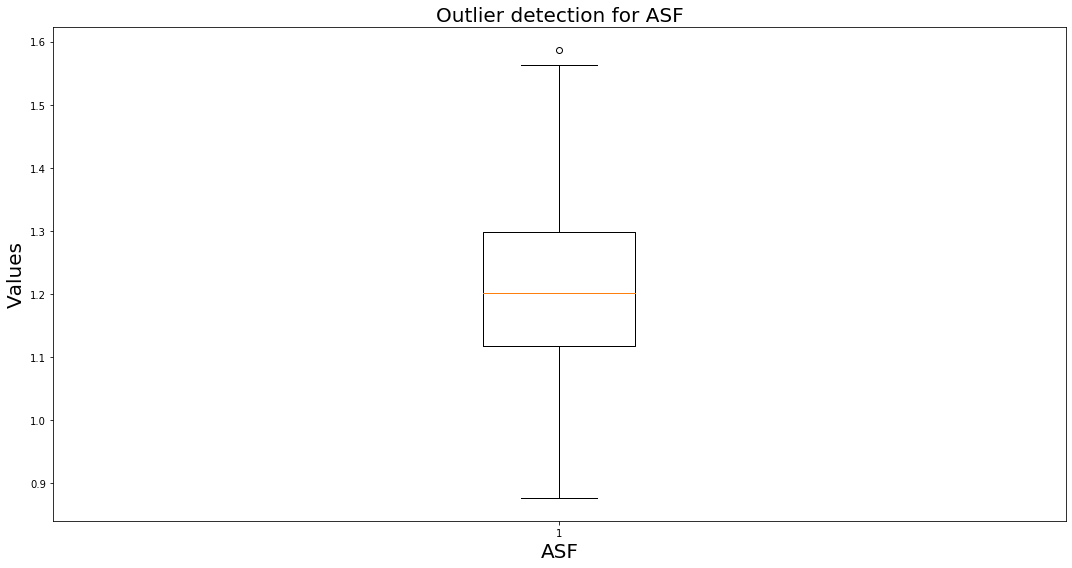

In [159]:
#let us plot the outliers for ASF column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['ASF'])
plt.title('Outlier detection for ASF', fontsize=20)
plt.xlabel('ASF', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.tight_layout()
plt.show()

There is one outlier point for the ASF column above the upper bound. 

In [160]:
#checking the outliers for ASF using IQR method
q1=df_new['ASF'].quantile(0.25)    
q3=df_new['ASF'].quantile(0.75)
IQR=q3-q1

lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
print('The Q3 value is:', np.round(q3,3))
print('The upper bound value is:', np.round(upper,3))

The Q3 value is: 1.297
The upper bound value is: 1.567


In [161]:
df_new[df_new['ASF'] > upper]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
517,Oasis_719,F,75,3.0,2.0,28.0,0.0,1106,0.767,1.587,Non-Demented


We will impute this data point for ASF column to the upper bound value `1.567`

In [162]:
df_new['ASF'] = np.where(df_new['ASF']>upper, upper, df_new['ASF'])

In [163]:
df_new[df_new['ASF'] > upper]

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group


The outlier data point has been removed. Let us confirm this again with the box plot.

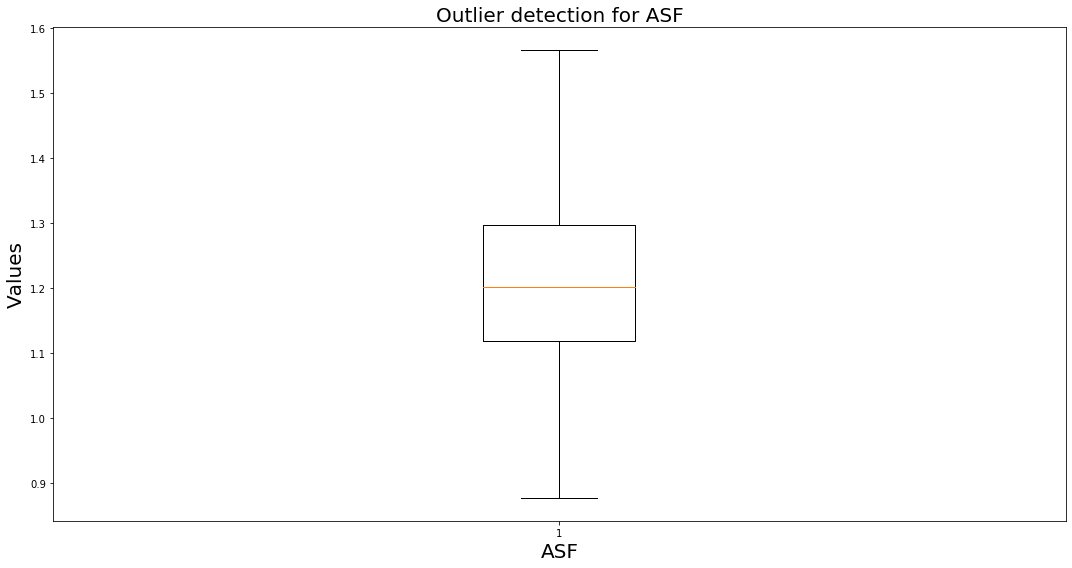

In [164]:
#let us plot the outliers for ASF column
plt.figure(figsize=(15,8))
plt.boxplot(x=df_new['ASF'])
plt.title('Outlier detection for ASF', fontsize=20)
plt.xlabel('ASF', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.tight_layout()
plt.show()

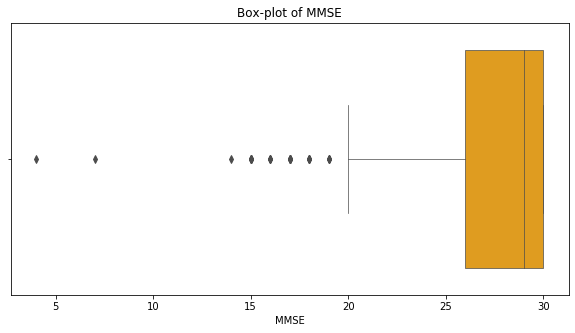

In [165]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df_new, x = 'MMSE', color = 'orange', linewidth = 0.7)
plt.xlabel('MMSE', fontsize = 10)
plt.title('Box-plot of MMSE', fontsize = 12)
plt.show()

**Inferences** : <br>
1. Highly Left Skewed
2. Cannot ignore outliers as it is very important column as lesser the MMSE score higher the chances of getting Dementia.

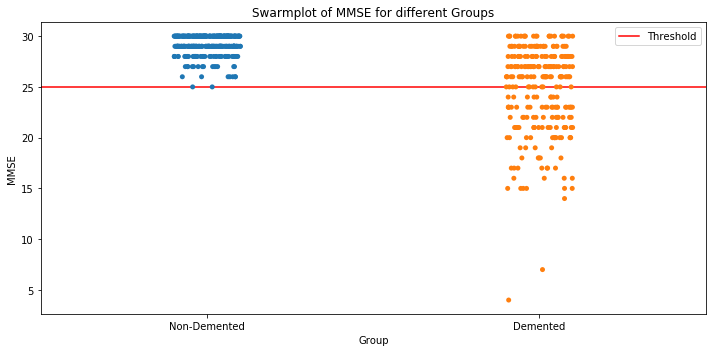

In [166]:
# Let's see whether we can have any peculiar pattern with respect to MMSE and Group .......
plt.figure(figsize = (10, 5))
sns.stripplot(data = df_new, y = 'MMSE', x = 'Group')
plt.ylabel('MMSE', fontsize = 10)
plt.xlabel('Group', fontsize = 10)
plt.title('Swarmplot of MMSE for different Groups', fontsize = 12)
plt.axhline(y = 25, color = 'red', label = 'Threshold')
plt.legend()
plt.tight_layout()
plt.show()

### Checking variable data types

Let us check the head and tail of df_new dataset

In [167]:
df_new.head()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,Oasis_1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Non-Demented
1,Oasis_2,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Non-Demented
2,Oasis_3,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
3,Oasis_9,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Non-Demented
4,Oasis_10,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Non-Demented


In [168]:
df_new.tail()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
603,Oasis_805,M,82,3.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
604,Oasis_806,M,86,3.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
605,Oasis_807,F,61,1.0,2.0,30.0,0.0,1319,0.801,1.331,Non-Demented
606,Oasis_808,F,63,1.0,2.0,30.0,0.0,1327,0.796,1.323,Non-Demented
607,Oasis_809,F,65,1.0,2.0,30.0,0.0,1333,0.801,1.317,Non-Demented


In [169]:
#drop the CDR column
df_new = df_new.drop('CDR', axis=1)
df_new.head()

,ID,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,Oasis_1,F,74,2.0,3.0,29.0,1344,0.743,1.306,Non-Demented
1,Oasis_2,F,55,4.0,1.0,29.0,1147,0.810,1.531,Non-Demented
2,Oasis_3,F,73,4.0,3.0,27.0,1454,0.708,1.207,Demented
3,Oasis_9,M,74,5.0,2.0,30.0,1636,0.689,1.073,Non-Demented
4,Oasis_10,F,52,3.0,2.0,30.0,1321,0.827,1.329,Non-Demented


In [170]:
#Check data types of the variables
df_new.dtypes

ID        object
M/F       object
Age        int64
Educ     float64
SES      float64
MMSE     float64
eTIV       int64
nWBV     float64
ASF      float64
Group     object
dtype: object

Educ, SES, MMSE have categorical data but have the data type as `float`.

We will now transform the data types.

In [171]:
#transforming the data type from float to object for Educ column
df_new['Educ'] = df_new['Educ'].astype('object')

In [172]:
#transforming the data type from float to object for SES column
df_new['SES'] = df_new['SES'].astype('object')

In [173]:
#eTIV contains integer values but is interpreted as float. 
df_new['eTIV'] = df_new['eTIV'].astype('int64')

In [174]:
#checking the data types 
df_new.dtypes

ID        object
M/F       object
Age        int64
Educ      object
SES       object
MMSE     float64
eTIV       int64
nWBV     float64
ASF      float64
Group     object
dtype: object

In [175]:
#checking the head of the dataframe
df_new.head()

,ID,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,Oasis_1,F,74,2.0,3.0,29.0,1344,0.743,1.306,Non-Demented
1,Oasis_2,F,55,4.0,1.0,29.0,1147,0.810,1.531,Non-Demented
2,Oasis_3,F,73,4.0,3.0,27.0,1454,0.708,1.207,Demented
3,Oasis_9,M,74,5.0,2.0,30.0,1636,0.689,1.073,Non-Demented
4,Oasis_10,F,52,3.0,2.0,30.0,1321,0.827,1.329,Non-Demented


In [176]:
#check the tail of the dataframe
df_new.tail()

,ID,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
603,Oasis_805,M,82,3.0,1.0,28.0,1693,0.694,1.037,Demented
604,Oasis_806,M,86,3.0,1.0,26.0,1688,0.675,1.040,Demented
605,Oasis_807,F,61,1.0,2.0,30.0,1319,0.801,1.331,Non-Demented
606,Oasis_808,F,63,1.0,2.0,30.0,1327,0.796,1.323,Non-Demented
607,Oasis_809,F,65,1.0,2.0,30.0,1333,0.801,1.317,Non-Demented


The ID column consists of the subject ID of the patients. We can drop this column.

In [177]:
#delete the ID column
del df_new['ID']

In [178]:
#check the head of dataframe
df_new.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,1344,0.743,1.306,Non-Demented
1,F,55,4.0,1.0,29.0,1147,0.810,1.531,Non-Demented
2,F,73,4.0,3.0,27.0,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,30.0,1636,0.689,1.073,Non-Demented
4,F,52,3.0,2.0,30.0,1321,0.827,1.329,Non-Demented


In [179]:
df_new.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,1344,0.743,1.306,Non-Demented
1,F,55,4.0,1.0,29.0,1147,0.810,1.531,Non-Demented
2,F,73,4.0,3.0,27.0,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,30.0,1636,0.689,1.073,Non-Demented
4,F,52,3.0,2.0,30.0,1321,0.827,1.329,Non-Demented


In [180]:
# Let's make a categorical data of MMSE as we can see clearly that people who have scored less than 25 are demented.
df_new['MMSE'] = ['> 25' if i > 25 else '<= 25' for i in df_new['MMSE']]

In [181]:
#transforming the data type from float to object for MMSE column
df_new['MMSE'] = df_new['MMSE'].astype('object')

In [182]:
df_new.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,> 25,1344,0.743,1.306,Non-Demented
1,F,55,4.0,1.0,> 25,1147,0.810,1.531,Non-Demented
2,F,73,4.0,3.0,> 25,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,> 25,1636,0.689,1.073,Non-Demented
4,F,52,3.0,2.0,> 25,1321,0.827,1.329,Non-Demented


In [183]:
df_new.dtypes

M/F       object
Age        int64
Educ      object
SES       object
MMSE      object
eTIV       int64
nWBV     float64
ASF      float64
Group     object
dtype: object

**Renaming Column names**

For the sake of simplicity and understanding, we will rename few column names

In [184]:
#rename columns
df_new = df_new.rename(columns={'M/F':'Gender', 'Educ':'Educ_level', 'SES':'SES_level','MMSE':'MMSE_Group'})

In [185]:
#checking column names
df_new.columns

Index(['Gender', 'Age', 'Educ_level', 'SES_level', 'MMSE_Group', 'eTIV',
       'nWBV', 'ASF', 'Group'],
      dtype='object')

In [186]:
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,> 25,1344,0.743,1.306,Non-Demented
1,F,55,4.0,1.0,> 25,1147,0.810,1.531,Non-Demented
2,F,73,4.0,3.0,> 25,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,> 25,1636,0.689,1.073,Non-Demented
4,F,52,3.0,2.0,> 25,1321,0.827,1.329,Non-Demented


In [187]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      608 non-null    object 
 1   Age         608 non-null    int64  
 2   Educ_level  608 non-null    object 
 3   SES_level   608 non-null    object 
 4   MMSE_Group  608 non-null    object 
 5   eTIV        608 non-null    int64  
 6   nWBV        608 non-null    float64
 7   ASF         608 non-null    float64
 8   Group       608 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 42.9+ KB


# Statistical tests

# Hypothesis Testing 


H0: There is no relationship between (Gender) over (Risk of demented problem) <br> Ha:There is significant relationship between (Gender) over (Risk of demented problem)

In [188]:
pd.crosstab(df_new['Gender'],df_new['Group'])

Group,Demented,Non-Demented
Gender,,
F,130,239
M,137,102


In [189]:
chi2_contingency(pd.crosstab(df_new['Gender'],df_new['Group']))

(27.852590248616124,
 1.30918682321115e-07,
 1,
 array([[162.04440789, 206.95559211],
        [104.95559211, 134.04440789]]))

In [190]:
#### we fail to accept H0 because our p-Value is less that 0.05 so we accept Ha.
####Throught this we conclude that Gender play a significat role in case of diseases part.

# For post-Hoc Analysis

In [191]:
139/369,239/369

(0.37669376693766937, 0.6476964769647696)

In [192]:
137/239,102/239

(0.5732217573221757, 0.42677824267782427)

# Conclusion


Female are less sesitive toward Demented Problem.<br>
Males are more sesitive towards Demented problem.


# Hypothesis Testing 


H0: There is no relationship between (Education level) over (Risk of demented problem). <br> Ha:There is significant relationship between (Education level) over (Risk of demented problem).

In [193]:
pd.crosstab(df_new['Educ_level'],df_new['Group'])

Group,Demented,Non-Demented
Educ_level,,
1.0,98,78
2.0,59,55
3.0,54,83
4.0,42,85
5.0,14,40


In [194]:
chi2_contingency(pd.crosstab(df_new['Educ_level'],df_new['Group']))

(27.023063835425244,
 1.9666610086204837e-05,
 4,
 array([[77.28947368, 98.71052632],
        [50.0625    , 63.9375    ],
        [60.16282895, 76.83717105],
        [55.77138158, 71.22861842],
        [23.71381579, 30.28618421]]))

In [195]:
#### We fail to accept H0 because our p-Value is less that 0.05 so we accept Ha.
####Throught this we conclude that education level plays a significat role in case chances of having a disease

# For post-Hoc Analysis

In [196]:
#For people having less than high school level of education.

98/176,78/176

(0.5568181818181818, 0.4431818181818182)

In [197]:
#For people having graduate or high school level of education.

59/114,55/114

(0.5175438596491229, 0.4824561403508772)

In [198]:
#For people having college  level of education.

54/137,83/137

(0.39416058394160586, 0.6058394160583942)

In [199]:
#For people those who completed their graduation .

42/127,85/127

(0.33070866141732286, 0.6692913385826772)

In [200]:
#For people those who received education beyond college level.
14/54,40/54

(0.25925925925925924, 0.7407407407407407)

# Conclusion


It is clearly visible that those people who receive a good level of education have very little chance of affecting with the demented disease.

# Hypothesis Testing 


H0: There is no relationship between (Socio-economic status) over (Risk of demented problem)  
Ha:There is significant relationship between (Socio-economic status) over (Risk of demented problem)

In [201]:
pd.crosstab(df_new['SES_level'],df_new['Group'])

Group,Demented,Non-Demented
SES_level,,
1.0,54,84
2.0,83,123
3.0,57,74
4.0,66,57
5.0,7,3


In [202]:
chi2_contingency(pd.crosstab(df_new['SES_level'],df_new['Group']))

(9.8933485763155,
 0.04226304700345096,
 4,
 array([[ 60.60197368,  77.39802632],
        [ 90.46381579, 115.53618421],
        [ 57.52796053,  73.47203947],
        [ 54.01480263,  68.98519737],
        [  4.39144737,   5.60855263]]))

In [203]:
#### We fail to accept H0 because our p-Value is less that 0.05 so we accept Ha.
####Throught this we conclude that Socio-economic status plays a significat role in case of risk of having the disease.

# For post-Hoc Analysis

In [204]:
#For people those who are from lower class of income group

64/149,85/149


(0.42953020134228187, 0.5704697986577181)

In [205]:
#For people those who are from lower-middle class of income group.
60/181,121/181

(0.3314917127071823, 0.6685082872928176)

In [206]:
#For people those who are from middle class of income group.

64/138,74/138

(0.463768115942029, 0.5362318840579711)

In [207]:
#For people those who are from middle upper class of income group.

72/130,58/130

(0.5538461538461539, 0.4461538461538462)

In [208]:
#For people those who are from  upper class of income group.
7/10,3/10

(0.7, 0.3)

# Conclusion


It is clearly visible that the income group plays an important role in the risk of having a disease. AS we move towards the upper class of income, people will have more chance of having a disease because he got influenced by lots and lots of factors such as non-healthy lifestyle and less work-life balance. These are the few factors that will affect the risk of having dementia.

# Hypothesis Testing

H0: There is no relationship between (MMSE_Group) over (Risk of demented problem)

Ha:There is significant relationship between (MMSE_Group) over (Risk of demented problem)

In [209]:
pd.crosstab(df_new['MMSE_Group'],df_new['Group'])

Group,Demented,Non-Demented
MMSE_Group,,
<= 25,119,2
> 25,148,339


In [210]:
chi2_contingency(pd.crosstab(df_new['MMSE_Group'],df_new['Group']))

(178.9786341288456,
 8.098961898170353e-41,
 1,
 array([[ 53.13651316,  67.86348684],
        [213.86348684, 273.13651316]]))

In [211]:
#### We fail to accept H0 because our p-Value is less that 0.05 so we accept Ha.
####Throught this we conclude that MMSE_Group plays a significat role in case of risk of having the disease.

## Statistical Analysis for Numerical Data

In [212]:
from scipy.stats import ttest_ind

In [213]:
ttest_ind(a=df_new[df_new['Group']=='Demented']['eTIV'],
          b=df_new[df_new['Group']=='Non-Demented']['eTIV'])

Ttest_indResult(statistic=1.3267301250200814, pvalue=0.1850976863775613)

In [214]:
#etiv is not significant

In [215]:
ttest_ind(a=df_new[df_new['Group']=='Demented']['ASF'],
          b=df_new[df_new['Group']=='Non-Demented']['ASF'])

Ttest_indResult(statistic=-1.3985030874588251, pvalue=0.1624735814337173)

In [216]:
#ASF is not significant

In [217]:
ttest_ind(a=df_new[df_new['Group']=='Demented']['nWBV'],
          b=df_new[df_new['Group']=='Non-Demented']['nWBV'])

Ttest_indResult(statistic=-10.427376547730393, pvalue=1.5836846777404776e-23)

In [218]:
#nWBV is significant

In [219]:
ttest_ind(a=df_new[df_new['Group']=='Demented']['Age'],
          b=df_new[df_new['Group']=='Non-Demented']['Age'])

Ttest_indResult(statistic=3.355077198572413, pvalue=0.0008429984381776444)

In [220]:
#Age is significant

## Conclusion

It is clearly visible that the income group plays an important role in the risk of having a disease. AS we move towards the upper class of income, people will have more chance of having a disease because he got influenced by lots and lots of factors such as non-healthy lifestyle and less work-life balance. These are the few factors that will affect the risk of having dementia.

# Statistically significant features

The features that are significant for parametric tests are:

    Numeric features: nWBV, Age
    Categorical features: Gender, Education level, Social Economic Status, MMSE_Group.

# Check for Assumptions

## Outliers

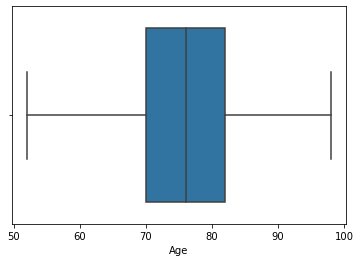

In [221]:
sns.boxplot(df_new['Age'])

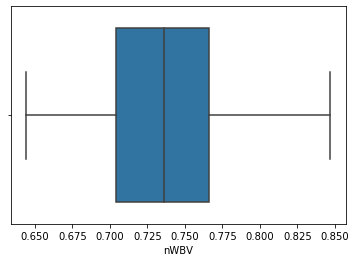

In [222]:
sns.boxplot(df_new['nWBV'])

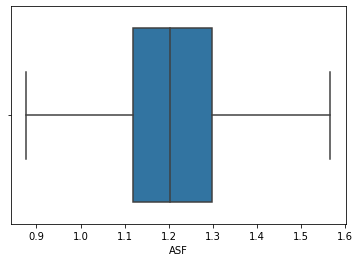

In [223]:
sns.boxplot(df_new['ASF'])

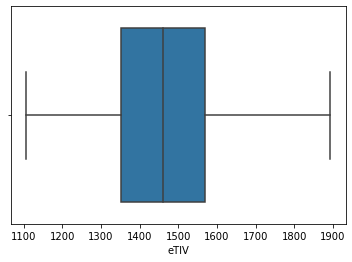

In [224]:
sns.boxplot(df_new['eTIV'])

In [225]:
#As we have seen, the outier treatment has already been done.

## Multi-Collinearity

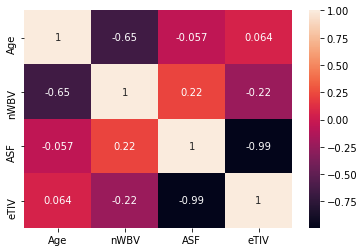

In [226]:
sns.heatmap(df_new[['Age', 'nWBV', 'ASF', 'eTIV']].corr(),annot = True)

* We can see that there is high multi-collinearity between numerical features.
* anyhow we are removing eTIV as it is not statistically significant for parametric models.

In [227]:
#from seaborn_qqplot import pplot

In [228]:
#pplot(df_new, x="Age", y="nWBV", hue = 'Group', kind='qq', height=4, aspect=2, display_kws={"identity":True})

In [229]:
## We can see that the data is linearly seperable

In [230]:
## We are satisfying all the assumptions of paramteric tests

# Handling categorical variables

In [231]:
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,> 25,1344,0.743,1.306,Non-Demented
1,F,55,4.0,1.0,> 25,1147,0.810,1.531,Non-Demented
2,F,73,4.0,3.0,> 25,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,> 25,1636,0.689,1.073,Non-Demented
4,F,52,3.0,2.0,> 25,1321,0.827,1.329,Non-Demented


In [232]:
#gender, educ_level, ses_level, mmse_group and group are the categorical variables

#We will apply ordinal encoding for educ and SES columns
#Apply label encoding for the group column
#Apply dummy encoding for the mmse column and gender column

In [233]:
#We will apply ordinal encoding for educ and SES columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

cat_cols = ['Educ_level','SES_level']
df_new[cat_cols] = enc.fit_transform(df_new[cat_cols])
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,F,74,1.0,2.0,> 25,1344,0.743,1.306,Non-Demented
1,F,55,3.0,0.0,> 25,1147,0.810,1.531,Non-Demented
2,F,73,3.0,2.0,> 25,1454,0.708,1.207,Demented
3,M,74,4.0,1.0,> 25,1636,0.689,1.073,Non-Demented
4,F,52,2.0,1.0,> 25,1321,0.827,1.329,Non-Demented


In [234]:
#Apply label encoding for the group column

df_new['Group'] = df_new['Group'].replace({"Non-Demented":0, "Demented":1})
df_new['Group'].value_counts()

0    341
1    267
Name: Group, dtype: int64

In [235]:
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,F,74,1.0,2.0,> 25,1344,0.743,1.306,0
1,F,55,3.0,0.0,> 25,1147,0.810,1.531,0
2,F,73,3.0,2.0,> 25,1454,0.708,1.207,1
3,M,74,4.0,1.0,> 25,1636,0.689,1.073,0
4,F,52,2.0,1.0,> 25,1321,0.827,1.329,0


In [236]:
#Apply dummy encoding for the gender column
df_new['Gender'] = df_new['Gender'].replace({"M":0, "F":1})
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,1,74,1.0,2.0,> 25,1344,0.743,1.306,0
1,1,55,3.0,0.0,> 25,1147,0.810,1.531,0
2,1,73,3.0,2.0,> 25,1454,0.708,1.207,1
3,0,74,4.0,1.0,> 25,1636,0.689,1.073,0
4,1,52,2.0,1.0,> 25,1321,0.827,1.329,0


In [237]:
#Apply dummy encoding for the mmse column column
df_new['MMSE_Group'] = df_new['MMSE_Group'].replace({"> 25":1, "<= 25":0})
df_new.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,1,74,1.0,2.0,1,1344,0.743,1.306,0
1,1,55,3.0,0.0,1,1147,0.810,1.531,0
2,1,73,3.0,2.0,1,1454,0.708,1.207,1
3,0,74,4.0,1.0,1,1636,0.689,1.073,0
4,1,52,2.0,1.0,1,1321,0.827,1.329,0


In [238]:
df_new['MMSE_Group'].value_counts()

1    487
0    121
Name: MMSE_Group, dtype: int64

In [239]:
df_new.dtypes

Gender          int64
Age             int64
Educ_level    float64
SES_level     float64
MMSE_Group      int64
eTIV            int64
nWBV          float64
ASF           float64
Group           int64
dtype: object

In [240]:
#train test split for parametric models (exclude etiv and asf)
X = df_new.drop(['eTIV','ASF','Group'], axis=1)
X.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,nWBV
0,1,74,1.0,2.0,1,0.743
1,1,55,3.0,0.0,1,0.810
2,1,73,3.0,2.0,1,0.708
3,0,74,4.0,1.0,1,0.689
4,1,52,2.0,1.0,1,0.827


In [241]:
y = df_new['Group']
y

0      0
1      0
2      1
3      0
4      0
      ..
603    1
604    1
605    0
606    0
607    0
Name: Group, Length: 608, dtype: int64

In [242]:
#do the train test split
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
X_p_train.shape, X_p_test.shape

((486, 6), (122, 6))

In [244]:
y_p_train.shape, y_p_test.shape

((486,), (122,))

In [245]:
#feature scaling for parametric models

scaler = StandardScaler()

X_p_train = pd.DataFrame(data=scaler.fit_transform(X_p_train), columns=X_p_train.columns)
X_p_train.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,nWBV
0,0.801182,1.443654,-1.176667,0.478162,0.505781,0.316706
1,-1.248157,-2.482509,1.865143,-1.323285,0.505781,2.292140
2,0.801182,1.337542,0.344238,0.478162,0.505781,0.175604
3,-1.248157,0.806979,0.344238,-0.422561,0.505781,-0.718045
4,0.801182,1.443654,1.865143,-1.323285,0.505781,-0.506391


In [246]:
X_p_test = pd.DataFrame(data=scaler.transform(X_p_test), columns=X_p_test.columns)
X_p_test.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,nWBV
0,0.801182,-0.041921,1.865143,-1.323285,0.505781,0.128570
1,0.801182,-2.482509,1.865143,-0.422561,0.505781,1.139804
2,0.801182,-2.164171,1.104690,0.478162,0.505781,1.962901
3,0.801182,1.125317,1.104690,0.478162,0.505781,0.457809
4,0.801182,0.488642,-1.176667,-0.422561,0.505781,0.598911


In [247]:
#train test split for non-parametric models (include all variables)

In [248]:
X_np = df_new.drop('Group', axis=1)
X_np.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF
0,1,74,1.0,2.0,1,1344,0.743,1.306
1,1,55,3.0,0.0,1,1147,0.810,1.531
2,1,73,3.0,2.0,1,1454,0.708,1.207
3,0,74,4.0,1.0,1,1636,0.689,1.073
4,1,52,2.0,1.0,1,1321,0.827,1.329


In [249]:
y = df_new['Group']
y

0      0
1      0
2      1
3      0
4      0
      ..
603    1
604    1
605    0
606    0
607    0
Name: Group, Length: 608, dtype: int64

In [250]:
#make separate csv files for non parametric model

In [251]:
df_non_parametric = pd.concat([X_np, y], axis=1)
df_non_parametric.head()

,Gender,Age,Educ_level,SES_level,MMSE_Group,eTIV,nWBV,ASF,Group
0,1,74,1.0,2.0,1,1344,0.743,1.306,0
1,1,55,3.0,0.0,1,1147,0.810,1.531,0
2,1,73,3.0,2.0,1,1454,0.708,1.207,1
3,0,74,4.0,1.0,1,1636,0.689,1.073,0
4,1,52,2.0,1.0,1,1321,0.827,1.329,0


In [252]:
df_non_parametric.shape

(608, 9)

In [253]:
df_non_parametric.dtypes

Gender          int64
Age             int64
Educ_level    float64
SES_level     float64
MMSE_Group      int64
eTIV            int64
nWBV          float64
ASF           float64
Group           int64
dtype: object

In [254]:
#save the non parametric dataset locally
df_non_parametric.to_csv('non_parametric.csv')

**Model Building with parametric models**

**Logistic Regression**

In [255]:
#instantiate the LR model
LR = LogisticRegression(random_state=42)

#fit the model on train data
LR.fit(X_p_train, y_p_train)

#predict on the train data
y_pred_train_lr = LR.predict(X_p_train)

In [257]:
#calculate the metrics on train data
print(confusion_matrix(y_p_train, y_pred_train_lr))
print(classification_report(y_p_train, y_pred_train_lr))
print(roc_auc_score(y_p_train, LR.predict_proba(X_p_train)[:,1]))

[[255  25]
 [ 84 122]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       280
           1       0.83      0.59      0.69       206

    accuracy                           0.78       486
   macro avg       0.79      0.75      0.76       486
weighted avg       0.79      0.78      0.77       486

0.8629160887656033


In [258]:
#predict on the test data
y_pred_test_lr = LR.predict(X_p_test)

In [259]:
#calculate the metrics on test data
print(confusion_matrix(y_p_test, y_pred_test_lr))
print(classification_report(y_p_test, y_pred_test_lr))
print(roc_auc_score(y_p_test, LR.predict_proba(X_p_test)[:,1]))

[[58  3]
 [35 26]]
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        61
           1       0.90      0.43      0.58        61

    accuracy                           0.69       122
   macro avg       0.76      0.69      0.67       122
weighted avg       0.76      0.69      0.67       122

0.8512496640687987


The model is generalizing well on unseen data. Let us plot the roc curve for the model w.r.t test data

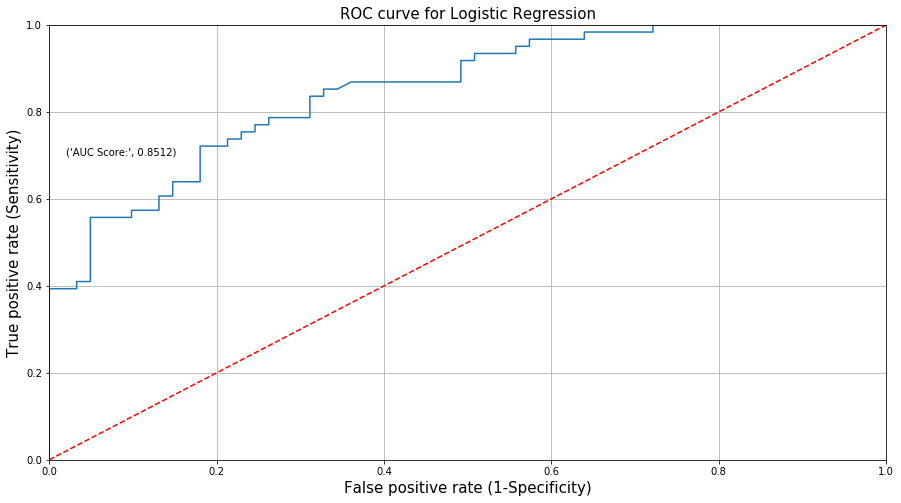

In [260]:
#plot the roc curve
fpr, tpr, thresholds = roc_curve(y_p_test, LR.predict_proba(X_p_test)[:,1])

plt.figure(figsize=(15,8))
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Logistic Regression', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.02, y = 0.7, s = ('AUC Score:', round(roc_auc_score(y_p_test, LR.predict_proba(X_p_test)[:,1]),4)))
                               
# plot the grid
plt.grid(True)

**Gaussian Naive bayes**

In [261]:
#instantiate the Gaussian NB model
gnb = GaussianNB()

#fit the model on train data
gnb.fit(X_p_train, y_p_train)

#predict on the train data
y_pred_train_gnb = gnb.predict(X_p_train)

In [263]:
#calculate the metrics on train data

print(confusion_matrix(y_p_train, y_pred_train_gnb))
print(classification_report(y_p_train, y_pred_train_gnb))
print(roc_auc_score(y_p_train, gnb.predict_proba(X_p_train)[:,1]))

[[271   9]
 [106 100]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       280
           1       0.92      0.49      0.63       206

    accuracy                           0.76       486
   macro avg       0.82      0.73      0.73       486
weighted avg       0.80      0.76      0.74       486

0.8554438280166436


In [264]:
#predict on the test data
y_pred_test_gnb = gnb.predict(X_p_test)

In [265]:
#calculate the metrics on test data

print(confusion_matrix(y_p_test, y_pred_test_gnb))
print(classification_report(y_p_test, y_pred_test_gnb))
print(roc_auc_score(y_p_test, gnb.predict_proba(X_p_test)[:,1]))

[[60  1]
 [39 22]]
              precision    recall  f1-score   support

           0       0.61      0.98      0.75        61
           1       0.96      0.36      0.52        61

    accuracy                           0.67       122
   macro avg       0.78      0.67      0.64       122
weighted avg       0.78      0.67      0.64       122

0.8353937113679117


**K Nearest Neighbors**

Although KNN is a non-parametric model, but since it is a distance based algorithm, scaling actually helps.

Therefore, we will use the parametric model features in KNN.

In [267]:
#instantiate the KNN model
knn = KNeighborsClassifier() #defalult neighbor size is used which is 5

#fit the model on train data
knn.fit(X_p_train, y_p_train)

#predict on the train data
y_pred_train_knn = knn.predict(X_p_train)

In [268]:
#calculate the metrics on train data

print(confusion_matrix(y_p_train, y_pred_train_knn))
print(classification_report(y_p_train, y_pred_train_knn))
print(roc_auc_score(y_p_train, knn.predict_proba(X_p_train)[:,1]))

[[263  17]
 [ 41 165]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       280
           1       0.91      0.80      0.85       206

    accuracy                           0.88       486
   macro avg       0.89      0.87      0.88       486
weighted avg       0.88      0.88      0.88       486

0.9535194174757282


In [269]:
#predict on test data
y_pred_test_knn = knn.predict(X_p_test)

In [270]:
#calculate the metrics on train data

print(confusion_matrix(y_p_test, y_pred_test_knn))
print(classification_report(y_p_test, y_pred_test_knn))
print(roc_auc_score(y_p_test, knn.predict_proba(X_p_test)[:,1]))

[[54  7]
 [26 35]]
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        61
           1       0.83      0.57      0.68        61

    accuracy                           0.73       122
   macro avg       0.75      0.73      0.72       122
weighted avg       0.75      0.73      0.72       122

0.8122816447191615


Perform hyperparameter tuning on the KNN model to find the best parameters

In [271]:
#specify the no. of folds for cross validation in grid search
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [272]:
#specify the paramters for the knn model
params = {
    'n_neighbors': range(1, 51),
    'weights': ['distance', 'uniform'],
    'metric': ['hamming', 'euclidean', 'manhattan', 'Chebyshev', 'minkowski']
         }

In [273]:
#instantiate the gridsearch for knn with specified parameters
gs_knn = GridSearchCV(knn, param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = -1)

#fit the gridsearch on the train data
gs_knn.fit(X_p_train, y_p_train)

#get the best estimators for the knn model
gs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [274]:
#save the best estimators to a variable
knn_tuned = gs_knn.best_estimator_

In [275]:
#perform cross validation to get the best scores with scoring as roc_auc
knn_scores = cross_val_score(knn_tuned, X_p_train, y_p_train, cv = kf, scoring = 'roc_auc', n_jobs = -1)

#calculate the scores, bias error and variance error
print("KNN tuned scores: ", knn_scores)
print("KNN tuned mean score: ", np.mean(knn_scores))
print("KNN Tuned Bias Error: ", 1 - np.mean(knn_scores))
print("KNN Tuned Variance Error: ", np.std(knn_scores, ddof = 1))

KNN tuned scores:  [0.89534161 0.85582871 0.87950782]
KNN tuned mean score:  0.8768927128031553
KNN Tuned Bias Error:  0.12310728719684472
KNN Tuned Variance Error:  0.01988583766027242


In [308]:
#We are getting a mean roc auc score of 87.69% on the training data. 
#Predict the results on unseen data

In [276]:
y_pred_test_knn = knn_tuned.predict(X_p_test)

In [277]:
#calculate the metrics on test data

print(confusion_matrix(y_p_test, y_pred_test_knn))
print(classification_report(y_p_test, y_pred_test_knn))
print(roc_auc_score(y_p_test, knn_tuned.predict_proba(X_p_test)[:,1]))

[[53  8]
 [23 38]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77        61
           1       0.83      0.62      0.71        61

    accuracy                           0.75       122
   macro avg       0.76      0.75      0.74       122
weighted avg       0.76      0.75      0.74       122

0.7889008331093792


The KNN model is overfitting on the train data.